# Linear regression using SKLearn on your own Data!
This should look familiar... we now are going to use linear regression on some of our own features. I recommend walking through the code below first, then importing your dataset and working through the same problem with your data!

In [43]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

# Data Loading, Cleaning, and Setup

Read in your data into a pandas dataframe by replacing the `filename` variable with your file's path. You can also use the current code below to work on a mpg dataset, where the target variable we are predicting is **miles per gallon** based on other car features. 

> We should choose two columns that we want to run regresssion on. Use the `.head()` function to decide which columns would be best!



pandas docs - https://pandas.pydata.org/docs/reference/index.html#api <br>
seaborn docs - https://seaborn.pydata.org/api.html

In [2]:
filename = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
my_data = pd.read_csv(filename) #TODO: read in your file by replacing the filename variable with your file's path. You can also use this current code to work on an automobile dataset! 

In [3]:
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
#cleaning the data -- dropping missing and duplicate values for sanity
my_data.dropna(inplace = True)
my_data.drop_duplicates(inplace = True)
my_data = my_data.reset_index(drop=True)

length = len(my_data.index) #save length of array of later

Linear regression naturally works best on highly correlated data, so I'm going to create a heatmap to see which variables are correlated! 

<AxesSubplot:>

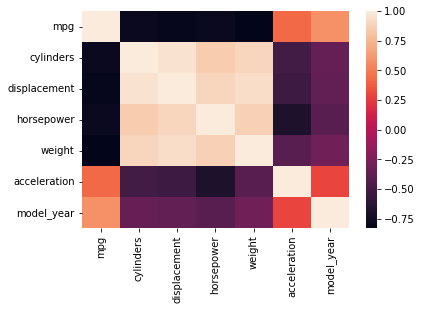

In [5]:
sns.heatmap(my_data.corr())

### Getting to know the problem

For my data, my columns inlude `'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', and 'name'`. 

To start, I would like to create a linear regression model that uses horsepower (X) to predict miles per gallon (y) and see how strong our linear regression model is. For your data, you should choose two columns as well to represent X and y.


In [6]:
X = my_data["horsepower"].to_numpy()
y = my_data["mpg"].to_numpy()

# Linear Regression with Scikit-learn's linear regression

We can use Scikit-Learn’s Linear Regression to fit the model. Most other models we will use in the course 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Split the data
Our model should ignore 20% of data points to use for testing so it doesn't just memorize the data. We need to make sure there are no missing data points before continuing.

np docs - https://numpy.org/doc/stable/reference/index.html#reference

In [7]:
# Checking for Missing Data
if X.shape[0] != y.shape[0]:
  print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")
  
idx = np.arange(length) #shuffle our dataset indices so we don't always split the same way!
np.random.shuffle(idx)

#split our data with 80% for training (learning) and 20% for testing.
split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]
# Uses the remaining indices for testing
test_idx = idx[split_threshold:]

# Generates train and test sets and formats them for training.
x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

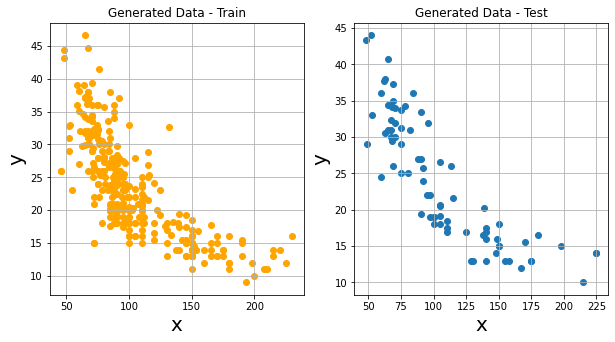

In [8]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

# plot the test set 
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

### Creating and Fitting

In [9]:
from sklearn.linear_model import LinearRegression
#Create the model object
linr = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[39.37992066] [-0.15476881]


### Creating Predictions
Predict outputs on our x_test data that we held out. Think of this as a way to see how the model does on new data!

In [10]:
# Predicting using SKLearn
y_hat = linr.predict(x_test)

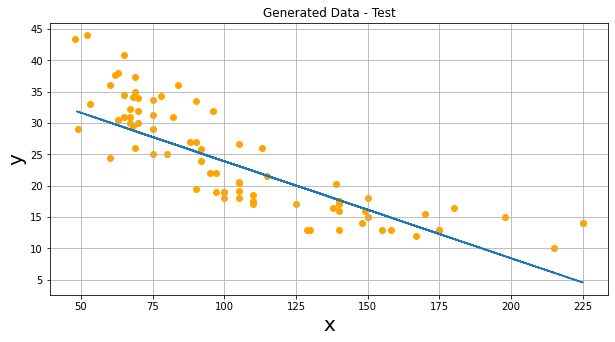

In [11]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat, '--')

plt.scatter(x_test,y_test, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

### Results and Evaluation
One way to see if the model is pretty good is the coefficient of determination (R^2) using the `score()` function. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score.

Another way is to compare our mean absolute error (MAE). MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.

Read some more about regression model metrics [here](http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/).

In [12]:
print(linr.score(x_test, y_test))

0.6720392107857677


In [13]:
MAE = np.mean(abs(y_test - y_hat))
MAE

8.988585235103281

# Our own data

Try running linear regression on multiple combinations of features (columns) on your dataset. What combination yields the best score? How does this connect to your correlation chart? 



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [7]:
housePrice = pd.read_csv("Data/kc_house_data.csv")
zipcodedf = pd.read_csv("Data/usa_zipcode_of_wa.csv")
housePrice.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
zipcodedf = zipcodedf.dropna(subset=['City'])
zipcodedf = zipcodedf.rename(columns = {"zip":"zipcode"})
zipcodedf

,zipcode,Zipcode name,City,State,County Name
0,98520,"ABERDEEN, WA",ABERDEEN,WA,GRAYS HARBOR
1,98220,"ACME, WA",ACME,WA,WHATCOM
2,99101,"ADDY, WA",ADDY,WA,STEVENS
3,98522,"ADNA, WA",ADNA,WA,LEWIS
4,99001,"AIRWAY HEIGHTS, WA",AIRWAY HEIGHTS,WA,SPOKANE
...,...,...,...,...,...
688,98907,"YAKIMA, WA",YAKIMA,WA,YAKIMA
689,98908,"YAKIMA, WA",YAKIMA,WA,YAKIMA
690,98909,"YAKIMA, WA",YAKIMA,WA,YAKIMA
691,98597,"YELM, WA",YELM,WA,THURSTON


In [9]:
zipcodedf['zipcode'] = zipcodedf['zipcode'].astype(int)

In [10]:
merged_zip = pd.merge(zipcodedf, housePrice, on ="zipcode")

#### Data Cleaning



In [11]:
merged_zip.head()

,zipcode,Zipcode name,City,State,County Name,id,date,price,bedrooms,bathrooms,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98001,"AUBURN, WA",AUBURN,WA,KING,7895500070,20150213T000000,240000.0,4,1.0,...,2,7,890,330,1969,0,47.3341,-122.282,1290,7800
1,98001,"AUBURN, WA",AUBURN,WA,KING,3717000160,20141009T000000,287000.0,4,2.5,...,3,7,2240,0,2005,0,47.3378,-122.257,2221,4557
2,98001,"AUBURN, WA",AUBURN,WA,KING,8961960160,20141028T000000,480000.0,4,2.5,...,3,9,2520,710,2001,0,47.3183,-122.253,2640,8517
3,98001,"AUBURN, WA",AUBURN,WA,KING,4014400292,20150114T000000,465000.0,3,2.5,...,3,9,2714,0,2005,0,47.3185,-122.275,2590,18386
4,98001,"AUBURN, WA",AUBURN,WA,KING,1115450240,20141022T000000,360000.0,4,2.5,...,3,9,2160,0,1992,0,47.3341,-122.255,2280,9937


In [12]:
# drop zipcode, zipcode name, id, State, lat, long, County Name
merged_zip = merged_zip.drop(['zipcode', 'Zipcode name', 'id', 'State', 'lat', 'long', 'County Name'], axis = 1)
merged_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           21613 non-null  object 
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [13]:
# convert date into datetime and split year, month, and day from it
merged_zip['date'] = pd.to_datetime(merged_zip['date'])
merged_zip['year'] = merged_zip['date'].dt.year
merged_zip['month'] = merged_zip['date'].dt.month

# calculate house age starting from the year that the house was sold
merged_zip = merged_zip.drop(["date"],axis = 1)
merged_zip['yr_age'] = abs(merged_zip['year'] - merged_zip["yr_built"])
merged_zip['yr_age']

0        46
1         9
2        13
3        10
4        22
         ..
21608    26
21609    23
21610    20
21611    35
21612     1
Name: yr_age, Length: 21613, dtype: int64

In [14]:
# use 0 and 1 to represent whether the house is renewed or not
merged_zip['renovation'] = np.where(merged_zip['yr_renovated']==0,0,1)
merged_zip.drop(['yr_renovated'], inplace=True, axis=1)
print(merged_zip['renovation'].value_counts())

0    20699
1      914
Name: renovation, dtype: int64


In [15]:
merged_zip.head()

,City,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,year,month,yr_age,renovation
0,AUBURN,240000.0,4,1.0,1220,8075,1.0,0,0,2,7,890,330,1969,1290,7800,2015,2,46,0
1,AUBURN,287000.0,4,2.5,2240,4648,2.0,0,0,3,7,2240,0,2005,2221,4557,2014,10,9,0
2,AUBURN,480000.0,4,2.5,3230,16171,2.0,0,3,3,9,2520,710,2001,2640,8517,2014,10,13,0
3,AUBURN,465000.0,3,2.5,2714,17936,2.0,0,0,3,9,2714,0,2005,2590,18386,2015,1,10,0
4,AUBURN,360000.0,4,2.5,2160,9528,2.0,0,0,3,9,2160,0,1992,2280,9937,2014,10,22,0


In [16]:
merged_zip = pd.concat([merged_zip,pd.get_dummies(merged_zip["City"],prefix = "city")],axis = 1)  
merged_zip = merged_zip.drop(["City"], axis = 1)
merged_zip.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,city_MEDINA,city_MERCER ISLAND,city_NORTH BEND,city_REDMOND,city_RENTON,city_SAMMAMISH,city_SEATTLE,city_SNOQUALMIE,city_VASHON,city_WOODINVILLE
0,240000.0,4,1.0,1220,8075,1.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0
1,287000.0,4,2.5,2240,4648,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,480000.0,4,2.5,3230,16171,2.0,0,3,3,9,...,0,0,0,0,0,0,0,0,0,0
3,465000.0,3,2.5,2714,17936,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
4,360000.0,4,2.5,2160,9528,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0


In [17]:
merged_zip = merged_zip[merged_zip['price'] < 2e6]

### Polynomial Features regression:



In [24]:
length = len(merged_zip.index)

X = merged_zip[["bedrooms", "bathrooms", "sqft_living", "yr_age"]].to_numpy()
y = merged_zip["price"].to_numpy()

KeyError: "['yr_age'] not in index"

In [35]:
temp_df = merged_zip.drop(["price"], axis = 1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

#degree=9
#polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
highest_score = 0

In [77]:
lst = []
for feature in temp_df.columns:
    lst.append(feature)
    print(lst)
    X = temp_df[lst].to_numpy()
    y = merged_zip["price"].to_numpy()
    b_train, b_test, c_train, c_test = train_test_split(X, y, test_size=0.2, random_state=42)
    if len(lst) == 1:
        b_train.reshape(-1,1)
        c_train.reshape(-1,1)
    linreg = LinearRegression()
    linreg.fit(b_train, c_train)
    yhat = linreg.predict(b_test)
    #print(linreg.score(b_test, c_test))
    meanavg = np.mean(abs(c_test-yhat))
    #print(" " , meanavg)
    if linreg.score(b_test, c_test) > highest_score:
        highest_score = linreg.score(b_test, c_test)
    print(highest_score)
        

['bedrooms']
0.10110407509553343
['bedrooms', 'bathrooms']
0.27410146616687814
['bedrooms', 'bathrooms', 'sqft_living']
0.5029996890804095
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
0.5053647482215009
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
0.5053647482215009
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']
0.5263340967759287
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view']
0.5450566796372054
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']
0.5546252629362318
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade']
0.5966856631818063
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above']
0.5979115394004765
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sq

In [29]:
G = merged_zip[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'yr_age']]
E = merged_zip["price"]

In [30]:

G_train, G_test, E_train, E_test = train_test_split(G, E, test_size=0.2, random_state=42)

ValueError: x and y must be the same size

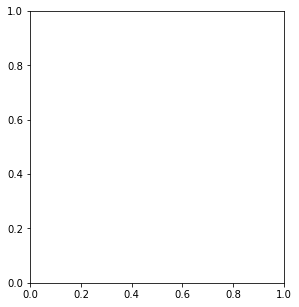

In [31]:
plt.figure(figsize=(10,5))
 
plt.subplot(1,2,1)
plt.scatter(G_train,E_train, c='orange')
plt.xlabel('G', fontsize = 20) 
plt.ylabel('E', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

plt.subplot(1,2,2)
plt.scatter(G_test, E_test)  
plt.xlabel('G', fontsize = 20) 
plt.ylabel('E', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

In [103]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=2)

G_poly=poly_reg.fit_transform(G_train) # x^2

G_test_poly = poly_reg.transform(G_test) # x_test^2

lin_reg2=LinearRegression()
lin_reg2.fit(G_poly,E_train)

LinearRegression()

In [104]:
y_hat2 = lin_reg2.predict(G_test_poly)

In [105]:
print(lin_reg2.score(G_test_poly, E_test))

0.7339775389306663


In [106]:
MAE2 = np.mean(abs(E_test - y_hat2))
MAE2

123223.983696801

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PolynomialFeatures(),LinearRegression())

params = {'polynomialfeatures__degree':[1,2,3]}


#pipe.fit(G_train, E_train)

search = GridSearchCV(estimator = pipe, param_grid = params, scoring = "neg_mean_squared_error") # mean of y_test vs. y_predict

search.fit(G_train, E_train)

print(search.best_params_)
print(search.best_score_)


{'polynomialfeatures__degree': 2}
-38973525210.767715


In [0]:
#r2_score(y_test, search.predict(x_test))

In [33]:
y_hat = linr.predict(G_test)

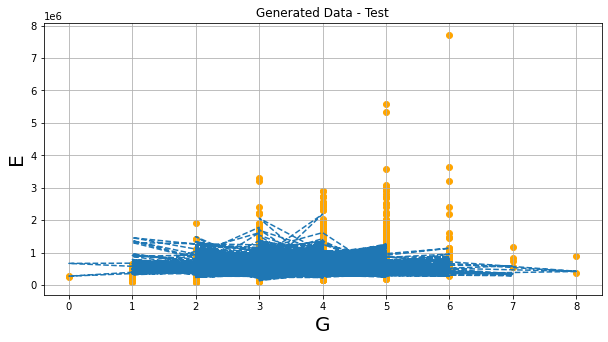

In [103]:
plt.figure(figsize=(10,5))
plt.plot(G_test, y_hat, '--')

plt.scatter(G_test,E_test, c='orange')  
plt.xlabel('G', fontsize = 20) 
plt.ylabel('E', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

In [104]:
print(linr.score(G_test, E_test))


0.10926882105108959


In [105]:
MAE = np.mean(abs(E_test - y_hat))
MAE

293158.1998741487

<AxesSubplot:>

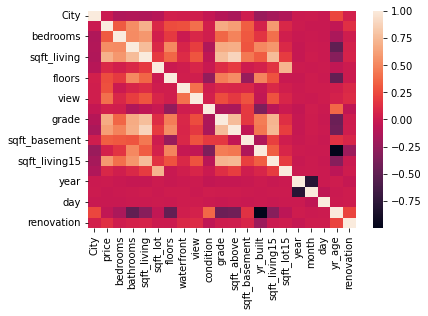

In [37]:
sns.heatmap(merged_zip.corr())

### Decision Tree:



In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

X_tree = merged_zip.drop(["price"], axis = 1) # features
y_tree = merged_zip["price"] # response


regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X, y, cv=10)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)
#x_train= x_train.reshape(-1, 2)
#x_test = x_test.reshape(-1, 2)

regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [67]:
Price = regressor.predict(x_test)

In [68]:
MEA= np.mean(abs(y_test - Price))
MEA

121249.02729585936

In [69]:
r2_score(y_test,Price)

0.6249917759039725

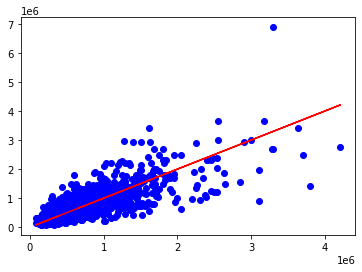

In [70]:
plt.scatter(y_test,Price, color="b")
plt.plot(y_test,y_test, color="r")

In [0]:
df = pd.DataFrame(np.random.randn(100, 3))

[https://stackoverflow.com/questions/61555486/what\-is\-x\-train\-reshape\-and\-what\-it\-does](https://stackoverflow.com/questions/61555486/what-is-x-train-reshape-and-what-it-does)  



/projects/a97d6307-9b0d-408a-ae28-2611511d3a18/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



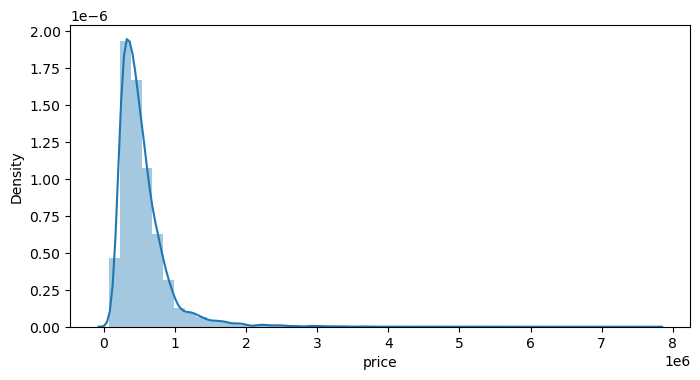

In [72]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.distplot(merged_zip['price'])
plt.show()

/projects/a97d6307-9b0d-408a-ae28-2611511d3a18/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



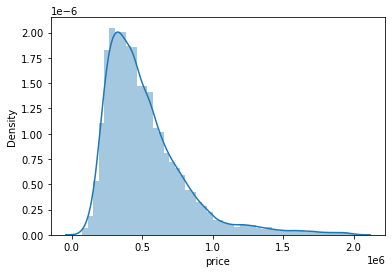

In [109]:
update_data = merged_zip[merged_zip['price'] < 2e6] 
sns.distplot(update_data['price'])
plt.show()

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

X_tree = update_data.drop(["price"], axis = 1)
y_tree = update_data["price"]


regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X, y, cv=10)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)
#x_train= x_train.reshape(-1, 2)
#x_test = x_test.reshape(-1, 2)

regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [111]:
Price = regressor.predict(x_test)

In [112]:
MEA= np.mean(abs(y_test - Price))
MEA

109860.09761793555

In [113]:
r2_score(y_test,Price)

0.6654756535880301

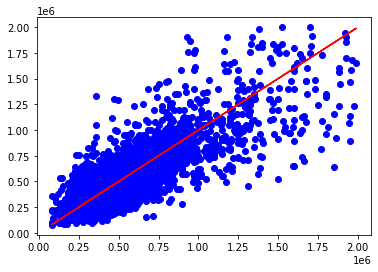

In [114]:
plt.scatter(y_test,Price, color="b")
plt.plot(y_test,y_test, color="r")

In [0]:
fig1 = px.scatter(merged_zip, x="sqft_above", y="price")
fig1.show()

In [118]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3],
           "min_weight_fraction_leaf":[0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,40] }

tuning_model=GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=1)

tuning_model.fit(x_train, y_train)
print(tuning_model.best_params_)
Price = tuning_model.predict(x_test)
print(r2_score(y_test,Price))

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


{'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.2, 'splitter': 'best'}
0.40459383953078853


In [0]:
if sqft.shape[0] != y.shape[0]:
  print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")
  
idx = np.arange(length) 
np.random.shuffle(idx)

split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]

test_idx = idx[split_threshold:]

x_train, y_train = sqft[train_idx], y[train_idx]
x_test, y_test = sqft[test_idx], y[test_idx]
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [0]:
plt.figure(figsize=(10,5))
 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

In [42]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[58238.79689671] [269.86758074]


In [43]:
y_hat = linr.predict(x_test)

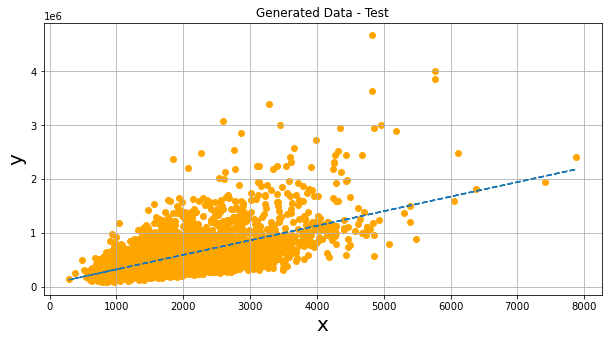

In [44]:
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat, '--')

plt.scatter(x_test,y_test, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

In [45]:
print(linr.score(x_test, y_test))

0.37469639393488985


### Neural Network:



In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score

In [87]:
merged_zip = merged_zip[merged_zip['price'] < 2e6]
X = merged_zip.drop(["price"], axis = 1)
y = merged_zip['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

year/age compared to price 



In [23]:
from pandas import read_csv
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# split into input (X) and output (Y) variables
X = merged_zip.values[:,0:13]
Y = merged_zip.values[:,13]
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model
#estimator = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)
#kfold = KFold(n_splits=3)
#results = cross_val_score(estimator, X, Y, cv=kfold)
#print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [0]:
def my_model():
    model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [0]:
network = my_model()
param_grid = {
    'loss': ['mse', 'mae'],
    'batch_size': [32, 64],
    'epochs': [200, 400],
}

grid_search = GridSearchCV(
    estimator=network,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error'
)

grid_search.fit()
grid_search.best_params_

### Group 1:



In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [151]:
model = Sequential()
model.add(Input(shape=(42,)))
model.add(Dense(290, activation='relu'))
model.add(Dense(290, activation='relu'))
model.add(Dense(290, activation='relu'))
model.add(Dense(1))
model.compile(loss ="mean_squared_error", optimizer = 'adam')
history = model.fit(x_train_scaled,y_train, epochs=200, batch_size=150, validation_split=0.2, verbose=1)

Epoch 1/200


 1/92 [..............................] - ETA: 1:01 - loss: 318169612288.0000

 7/92 [=>............................] - ETA: 0s - loss: 350888352621.7143  

15/92 [===>..........................] - ETA: 0s - loss: 358804162696.5333

19/92 [=====>........................] - ETA: 0s - loss: 360968321347.3684

27/92 [=======>......................] - ETA: 0s - loss: 360385045390.2222

33/92 [=========>....................] - ETA: 0s - loss: 359097027987.3939

42/92 [============>.................] - ETA: 0s - loss: 357433912758.8571

48/92 [==============>...............] - ETA: 0s - loss: 356601264810.6667

51/92 [===============>..............] - ETA: 0s - loss: 356211104667.6078

55/92 [================>.............] - ETA: 0s - loss: 355822655599.7091

58/92 [=================>............] - ETA: 0s - loss: 355618503574.0690

61/92 [==================>...........] - ETA: 0s - loss: 355459379267.1475

65/92 [====================>.........] - ETA: 0s - loss: 355261908960.4923

69/92 [=====================>........] - ETA: 0s - loss: 355078808383.0724

73/92 [======================>.......] - ETA: 0s - loss: 354849106901.9178

77/92 [========================>.....] - ETA: 0s - loss: 354525118038.4415

82/92 [=========================>....] - ETA: 0s - loss: 354072400171.7073

88/92 [===========================>..] - ETA: 0s - loss: 353585187374.5455

92/92 [==============================] - 2s 16ms/step - loss: 353202480425.2903 - val_loss: 320849805312.0000


Epoch 2/200
 1/92 [..............................] - ETA: 2s - loss: 293288411136.0000

 3/92 [..............................] - ETA: 3s - loss: 315322291541.3333

 5/92 [>.............................] - ETA: 2s - loss: 312825623347.2000

11/92 [==>...........................] - ETA: 1s - loss: 313828272314.1818

17/92 [====>.........................] - ETA: 1s - loss: 312677390938.3530

23/92 [======>.......................] - ETA: 0s - loss: 310499823081.7391

29/92 [========>.....................] - ETA: 0s - loss: 307250805089.1035

34/92 [==========>...................] - ETA: 0s - loss: 303943768666.3530

40/92 [============>.................] - ETA: 0s - loss: 299572480000.0000

50/92 [===============>..............] - ETA: 0s - loss: 291780036526.0800

56/92 [=================>............] - ETA: 0s - loss: 286806785462.8571

63/92 [===================>..........] - ETA: 0s - loss: 280686852583.6190

68/92 [=====================>........] - ETA: 0s - loss: 276220724163.7647

76/92 [=======================>......] - ETA: 0s - loss: 268992771772.6316

88/92 [===========================>..] - ETA: 0s - loss: 258277671842.9091

92/92 [==============================] - 1s 10ms/step - loss: 253996894802.5807 - val_loss: 56828608512.0000


Epoch 3/200
 1/92 [..............................] - ETA: 0s - loss: 68149743616.0000

 9/92 [=>............................] - ETA: 0s - loss: 60263251512.8889

18/92 [====>.........................] - ETA: 0s - loss: 56983138304.0000

25/92 [=======>......................] - ETA: 0s - loss: 56237687603.2000

29/92 [========>.....................] - ETA: 0s - loss: 55944601176.2759

33/92 [=========>....................] - ETA: 0s - loss: 55734940765.0909

38/92 [===========>..................] - ETA: 0s - loss: 55493058883.3684

46/92 [==============>...............] - ETA: 0s - loss: 55100738159.3043

54/92 [================>.............] - ETA: 0s - loss: 54861666152.2963

59/92 [==================>...........] - ETA: 0s - loss: 54734359326.3729

66/92 [====================>.........] - ETA: 0s - loss: 54617758068.3636

69/92 [=====================>........] - ETA: 0s - loss: 54578695479.6522

75/92 [=======================>......] - ETA: 0s - loss: 54504459687.2533

80/92 [=========================>....] - ETA: 0s - loss: 54459816601.6000

85/92 [==========================>...] - ETA: 0s - loss: 54424726780.9882

88/92 [===========================>..] - ETA: 0s - loss: 54397885253.8182

92/92 [==============================] - 1s 12ms/step - loss: 54343307440.1720 - val_loss: 48853831680.0000


Epoch 4/200
 1/92 [..............................] - ETA: 0s - loss: 33769211904.0000

 7/92 [=>............................] - ETA: 0s - loss: 45169118354.2857

15/92 [===>..........................] - ETA: 0s - loss: 47425568631.4667

21/92 [=====>........................] - ETA: 0s - loss: 47799839500.1905

27/92 [=======>......................] - ETA: 0s - loss: 48262697339.2593

34/92 [==========>...................] - ETA: 0s - loss: 48514372367.0588

42/92 [============>.................] - ETA: 0s - loss: 48660510378.6667

48/92 [==============>...............] - ETA: 0s - loss: 48642111104.0000

56/92 [=================>............] - ETA: 0s - loss: 48449214500.5714

64/92 [===================>..........] - ETA: 0s - loss: 48265277920.0000

72/92 [======================>.......] - ETA: 0s - loss: 48122626019.5556

78/92 [========================>.....] - ETA: 0s - loss: 48000548312.6154

85/92 [==========================>...] - ETA: 0s - loss: 47887096289.8824

89/92 [============================>.] - ETA: 0s - loss: 47821800965.7528

92/92 [==============================] - 1s 11ms/step - loss: 47755109695.3118 - val_loss: 42859118592.0000


Epoch 5/200
 1/92 [..............................] - ETA: 0s - loss: 57768955904.0000

 7/92 [=>............................] - ETA: 0s - loss: 50703731565.7143

10/92 [==>...........................] - ETA: 1s - loss: 48466784256.0000

12/92 [==>...........................] - ETA: 1s - loss: 47354165248.0000

19/92 [=====>........................] - ETA: 0s - loss: 45471513977.2632

24/92 [======>.......................] - ETA: 0s - loss: 44996688213.3333

26/92 [=======>......................] - ETA: 0s - loss: 44870325011.6923

28/92 [========>.....................] - ETA: 1s - loss: 44727838573.7143

31/92 [=========>....................] - ETA: 1s - loss: 44532765596.9032

35/92 [==========>...................] - ETA: 0s - loss: 44275174253.7143

40/92 [============>.................] - ETA: 0s - loss: 43974473113.6000

44/92 [=============>................] - ETA: 0s - loss: 43720454237.0909

49/92 [==============>...............] - ETA: 0s - loss: 43407000805.8775

54/92 [================>.............] - ETA: 0s - loss: 43164275977.4815

60/92 [==================>...........] - ETA: 0s - loss: 42980535227.7333

65/92 [====================>.........] - ETA: 0s - loss: 42854335535.2615

72/92 [======================>.......] - ETA: 0s - loss: 42734484764.4444

78/92 [========================>.....] - ETA: 0s - loss: 42620465099.4872

81/92 [=========================>....] - ETA: 0s - loss: 42557892127.6049

87/92 [===========================>..] - ETA: 0s - loss: 42439982774.4368

92/92 [==============================] - 2s 16ms/step - loss: 42317560138.3226 - val_loss: 37743312896.0000


Epoch 6/200
 1/92 [..............................] - ETA: 1s - loss: 51056783360.0000

10/92 [==>...........................] - ETA: 0s - loss: 39211320524.8000

17/92 [====>.........................] - ETA: 0s - loss: 39065543619.7647

22/92 [======>.......................] - ETA: 0s - loss: 38736339130.1818

28/92 [========>.....................] - ETA: 0s - loss: 38275952493.7143

35/92 [==========>...................] - ETA: 0s - loss: 37930496234.0571

42/92 [============>.................] - ETA: 0s - loss: 37649079052.1905

49/92 [==============>...............] - ETA: 0s - loss: 37457269571.9184

56/92 [=================>............] - ETA: 0s - loss: 37410945462.8571

60/92 [==================>...........] - ETA: 0s - loss: 37407531690.6667

66/92 [====================>.........] - ETA: 0s - loss: 37384715543.2727

71/92 [======================>.......] - ETA: 0s - loss: 37347553164.6197

76/92 [=======================>......] - ETA: 0s - loss: 37299626253.4737

81/92 [=========================>....] - ETA: 0s - loss: 37232315354.0741

88/92 [===========================>..] - ETA: 0s - loss: 37132879220.3636

92/92 [==============================] - 1s 11ms/step - loss: 37064784862.9677 - val_loss: 33687969792.0000


Epoch 7/200
 1/92 [..............................] - ETA: 0s - loss: 23933652992.0000

 9/92 [=>............................] - ETA: 0s - loss: 29544474396.4444

15/92 [===>..........................] - ETA: 0s - loss: 29443154875.7333

20/92 [=====>........................] - ETA: 0s - loss: 29348307865.6000

27/92 [=======>......................] - ETA: 0s - loss: 29586537889.1852

32/92 [=========>....................] - ETA: 0s - loss: 29761005952.0000

38/92 [===========>..................] - ETA: 0s - loss: 30042582393.2632

47/92 [==============>...............] - ETA: 0s - loss: 30476524042.8936

57/92 [=================>............] - ETA: 0s - loss: 30748704049.4035

61/92 [==================>...........] - ETA: 0s - loss: 30814462354.8852

68/92 [=====================>........] - ETA: 0s - loss: 30900439973.6471

76/92 [=======================>......] - ETA: 0s - loss: 31004723658.1053

83/92 [==========================>...] - ETA: 0s - loss: 31095146890.7952

90/92 [============================>.] - ETA: 0s - loss: 31164409264.3556

92/92 [==============================] - 1s 10ms/step - loss: 31193529575.2258 - val_loss: 30487764992.0000


Epoch 8/200
 1/92 [..............................] - ETA: 1s - loss: 43490000896.0000

 9/92 [=>............................] - ETA: 0s - loss: 33202583096.8889

16/92 [====>.........................] - ETA: 0s - loss: 32573778048.0000

24/92 [======>.......................] - ETA: 0s - loss: 32262820949.3333

29/92 [========>.....................] - ETA: 0s - loss: 31946695009.1034

36/92 [==========>...................] - ETA: 0s - loss: 31503565084.4444

43/92 [=============>................] - ETA: 0s - loss: 31217913665.4884

49/92 [==============>...............] - ETA: 0s - loss: 30990084430.3673

54/92 [================>.............] - ETA: 0s - loss: 30800515147.8519

58/92 [=================>............] - ETA: 0s - loss: 30678778420.9655

65/92 [====================>.........] - ETA: 0s - loss: 30477140629.6615

73/92 [======================>.......] - ETA: 0s - loss: 30290527779.0685

80/92 [=========================>....] - ETA: 0s - loss: 30167886617.6000

85/92 [==========================>...] - ETA: 0s - loss: 30097723753.4118

92/92 [==============================] - 1s 10ms/step - loss: 30027500885.3333 - val_loss: 28437356544.0000


Epoch 9/200
 1/92 [..............................] - ETA: 1s - loss: 31762677760.0000

 6/92 [>.............................] - ETA: 1s - loss: 30497927168.0000

13/92 [===>..........................] - ETA: 0s - loss: 30660460544.0000

21/92 [=====>........................] - ETA: 0s - loss: 30560556665.9048

28/92 [========>.....................] - ETA: 0s - loss: 30291040768.0000

36/92 [==========>...................] - ETA: 0s - loss: 30253544220.4444

43/92 [=============>................] - ETA: 0s - loss: 30090911982.1395

50/92 [===============>..............] - ETA: 0s - loss: 29876636344.3200

55/92 [================>.............] - ETA: 0s - loss: 29753202315.6364

62/92 [===================>..........] - ETA: 0s - loss: 29634221452.3871

69/92 [=====================>........] - ETA: 0s - loss: 29522618931.9420

75/92 [=======================>......] - ETA: 0s - loss: 29435130511.3600

83/92 [==========================>...] - ETA: 0s - loss: 29326648751.8072

91/92 [============================>.] - ETA: 0s - loss: 29192464136.4396

92/92 [==============================] - 1s 10ms/step - loss: 29156965959.5699 - val_loss: 27088881664.0000


Epoch 10/200
 1/92 [..............................] - ETA: 0s - loss: 20011360256.0000

 9/92 [=>............................] - ETA: 0s - loss: 25358565603.5556

18/92 [====>.........................] - ETA: 0s - loss: 26006490339.5556

28/92 [========>.....................] - ETA: 0s - loss: 26114906331.4286

35/92 [==========>...................] - ETA: 0s - loss: 26136461780.1143

44/92 [=============>................] - ETA: 0s - loss: 26159709370.1818

52/92 [===============>..............] - ETA: 0s - loss: 26157685523.6923

60/92 [==================>...........] - ETA: 0s - loss: 26165826457.6000

67/92 [====================>.........] - ETA: 0s - loss: 26199000446.0896

75/92 [=======================>......] - ETA: 0s - loss: 26220087459.8400

76/92 [=======================>......] - ETA: 0s - loss: 26222145293.4737

82/92 [=========================>....] - ETA: 0s - loss: 26221493098.1463

87/92 [===========================>..] - ETA: 0s - loss: 26222715091.8621

92/92 [==============================] - 1s 10ms/step - loss: 26227365689.8064 - val_loss: 26123110400.0000


Epoch 11/200
 1/92 [..............................] - ETA: 0s - loss: 21003405312.0000

11/92 [==>...........................] - ETA: 0s - loss: 25266482455.2727

18/92 [====>.........................] - ETA: 0s - loss: 25286899484.4444

25/92 [=======>......................] - ETA: 0s - loss: 25296818012.1600

32/92 [=========>....................] - ETA: 0s - loss: 25236999552.0000

38/92 [===========>..................] - ETA: 0s - loss: 25188992107.7895

44/92 [=============>................] - ETA: 0s - loss: 25141381073.4545

48/92 [==============>...............] - ETA: 0s - loss: 25134168618.6667

54/92 [================>.............] - ETA: 0s - loss: 25134871779.5556

58/92 [=================>............] - ETA: 0s - loss: 25144500047.4483

63/92 [===================>..........] - ETA: 0s - loss: 25178819047.6190

70/92 [=====================>........] - ETA: 0s - loss: 25205957280.9143

75/92 [=======================>......] - ETA: 0s - loss: 25207346544.6400

84/92 [==========================>...] - ETA: 0s - loss: 25237922572.1905

90/92 [============================>.] - ETA: 0s - loss: 25256922612.6222

92/92 [==============================] - 1s 11ms/step - loss: 25261048556.7312 - val_loss: 25393664000.0000


Epoch 12/200
 1/92 [..............................] - ETA: 2s - loss: 27954151424.0000

 9/92 [=>............................] - ETA: 0s - loss: 24618552433.7778

14/92 [===>..........................] - ETA: 0s - loss: 24557234322.2857

20/92 [=====>........................] - ETA: 0s - loss: 24662491238.4000

26/92 [=======>......................] - ETA: 0s - loss: 24660872507.0769

35/92 [==========>...................] - ETA: 0s - loss: 24593917074.2857

43/92 [=============>................] - ETA: 0s - loss: 24522685606.6977

49/92 [==============>...............] - ETA: 0s - loss: 24509331539.5918

57/92 [=================>............] - ETA: 0s - loss: 24494080251.5088

65/92 [====================>.........] - ETA: 0s - loss: 24496309925.4154

72/92 [======================>.......] - ETA: 0s - loss: 24503789141.3333

79/92 [========================>.....] - ETA: 0s - loss: 24519642487.8987

81/92 [=========================>....] - ETA: 0s - loss: 24523651451.2593

85/92 [==========================>...] - ETA: 0s - loss: 24529185804.0471

88/92 [===========================>..] - ETA: 0s - loss: 24533300596.3636

92/92 [==============================] - 1s 11ms/step - loss: 24537509425.5484 - val_loss: 24742971392.0000


Epoch 13/200
 1/92 [..............................] - ETA: 2s - loss: 18522656768.0000

10/92 [==>...........................] - ETA: 0s - loss: 21041048780.8000

16/92 [====>.........................] - ETA: 0s - loss: 21525951488.0000

22/92 [======>.......................] - ETA: 0s - loss: 22447754053.8182

30/92 [========>.....................] - ETA: 0s - loss: 23175440315.7333

38/92 [===========>..................] - ETA: 0s - loss: 23591788867.3684

44/92 [=============>................] - ETA: 0s - loss: 23737618338.9091

49/92 [==============>...............] - ETA: 0s - loss: 23817896437.5510

55/92 [================>.............] - ETA: 0s - loss: 23874635217.4545

61/92 [==================>...........] - ETA: 0s - loss: 23914710704.2623

69/92 [=====================>........] - ETA: 0s - loss: 23935423146.6667

75/92 [=======================>......] - ETA: 0s - loss: 23962513981.4400

83/92 [==========================>...] - ETA: 0s - loss: 23974583135.6145

91/92 [============================>.] - ETA: 0s - loss: 23974041442.4615

92/92 [==============================] - 1s 13ms/step - loss: 23973453912.0860 - val_loss: 24206385152.0000


Epoch 14/200
 1/92 [..............................] - ETA: 0s - loss: 30517487616.0000

 8/92 [=>............................] - ETA: 0s - loss: 27558571008.0000

11/92 [==>...........................] - ETA: 0s - loss: 27053790114.9091

16/92 [====>.........................] - ETA: 0s - loss: 26350230016.0000

21/92 [=====>........................] - ETA: 0s - loss: 25754619806.4762

26/92 [=======>......................] - ETA: 0s - loss: 25274246144.0000

32/92 [=========>....................] - ETA: 0s - loss: 24885286464.0000

37/92 [===========>..................] - ETA: 0s - loss: 24683698950.9189

43/92 [=============>................] - ETA: 0s - loss: 24535129540.4651

49/92 [==============>...............] - ETA: 0s - loss: 24444889338.7755

55/92 [================>.............] - ETA: 0s - loss: 24378544314.1818

59/92 [==================>...........] - ETA: 0s - loss: 24337221805.5593

63/92 [===================>..........] - ETA: 0s - loss: 24297474470.6032

68/92 [=====================>........] - ETA: 0s - loss: 24244491595.2941

73/92 [======================>.......] - ETA: 0s - loss: 24176137875.2877

78/92 [========================>.....] - ETA: 0s - loss: 24118153636.1026

86/92 [===========================>..] - ETA: 0s - loss: 24039106345.6744

92/92 [==============================] - 1s 13ms/step - loss: 23987389120.6882 - val_loss: 23829301248.0000


Epoch 15/200
 1/92 [..............................] - ETA: 1s - loss: 13329863680.0000

 8/92 [=>............................] - ETA: 0s - loss: 20779201920.0000

14/92 [===>..........................] - ETA: 0s - loss: 21876449353.1429

19/92 [=====>........................] - ETA: 0s - loss: 22197921199.1579

25/92 [=======>......................] - ETA: 0s - loss: 22411470397.4400

33/92 [=========>....................] - ETA: 0s - loss: 22567783672.2424

39/92 [===========>..................] - ETA: 0s - loss: 22675067273.8462

46/92 [==============>...............] - ETA: 0s - loss: 22789826893.9130

55/92 [================>.............] - ETA: 0s - loss: 22866901010.6182

63/92 [===================>..........] - ETA: 0s - loss: 22894592146.2857

73/92 [======================>.......] - ETA: 0s - loss: 22930353628.9315

80/92 [=========================>....] - ETA: 0s - loss: 22960159270.4000

88/92 [===========================>..] - ETA: 0s - loss: 22981100625.4545

92/92 [==============================] - 1s 9ms/step - loss: 22978853910.0215 - val_loss: 23291920384.0000


Epoch 16/200
 1/92 [..............................] - ETA: 0s - loss: 24637601792.0000

 7/92 [=>............................] - ETA: 0s - loss: 23169000009.1429

13/92 [===>..........................] - ETA: 0s - loss: 22317499785.8462

20/92 [=====>........................] - ETA: 0s - loss: 22138575974.4000

28/92 [========>.....................] - ETA: 0s - loss: 22008284891.4286

36/92 [==========>...................] - ETA: 0s - loss: 22136066161.7778

44/92 [=============>................] - ETA: 0s - loss: 22173931287.2727

54/92 [================>.............] - ETA: 0s - loss: 22194764837.9259

62/92 [===================>..........] - ETA: 0s - loss: 22179856582.1936

67/92 [====================>.........] - ETA: 0s - loss: 22188635518.0896

73/92 [======================>.......] - ETA: 0s - loss: 22203491173.6986

83/92 [==========================>...] - ETA: 0s - loss: 22209808458.0241

89/92 [============================>.] - ETA: 0s - loss: 22218675740.7640

92/92 [==============================] - 1s 9ms/step - loss: 22230226745.8064 - val_loss: 22910285824.0000


Epoch 17/200
 1/92 [..............................] - ETA: 1s - loss: 26229755904.0000

13/92 [===>..........................] - ETA: 0s - loss: 24976030168.6154

21/92 [=====>........................] - ETA: 0s - loss: 24281919975.6190

26/92 [=======>......................] - ETA: 0s - loss: 23873747731.6923

30/92 [========>.....................] - ETA: 0s - loss: 23633311129.6000

35/92 [==========>...................] - ETA: 0s - loss: 23383463994.5143

41/92 [============>.................] - ETA: 0s - loss: 23120154274.3415

46/92 [==============>...............] - ETA: 0s - loss: 22962270920.3478

51/92 [===============>..............] - ETA: 0s - loss: 22834159495.5294

57/92 [=================>............] - ETA: 0s - loss: 22718674405.0526

64/92 [===================>..........] - ETA: 0s - loss: 22628057216.0000

69/92 [=====================>........] - ETA: 0s - loss: 22578632704.0000

74/92 [=======================>......] - ETA: 0s - loss: 22537014382.7027

82/92 [=========================>....] - ETA: 0s - loss: 22478130026.1463

90/92 [============================>.] - ETA: 0s - loss: 22422165435.7333

92/92 [==============================] - 1s 11ms/step - loss: 22408395016.2581 - val_loss: 22590767104.0000


Epoch 18/200
 1/92 [..............................] - ETA: 1s - loss: 13176163328.0000

10/92 [==>...........................] - ETA: 0s - loss: 19563551232.0000

18/92 [====>.........................] - ETA: 0s - loss: 20120831488.0000

25/92 [=======>......................] - ETA: 0s - loss: 20306109767.6800

30/92 [========>.....................] - ETA: 0s - loss: 20305656046.9333

34/92 [==========>...................] - ETA: 0s - loss: 20288767247.0588

38/92 [===========>..................] - ETA: 0s - loss: 20333730357.8947

46/92 [==============>...............] - ETA: 0s - loss: 20470865897.7391

51/92 [===============>..............] - ETA: 0s - loss: 20558756221.4902

56/92 [=================>............] - ETA: 0s - loss: 20652641261.7143

62/92 [===================>..........] - ETA: 0s - loss: 20738595162.8387

69/92 [=====================>........] - ETA: 0s - loss: 20826989211.8261

73/92 [======================>.......] - ETA: 0s - loss: 20873337379.0685

79/92 [========================>.....] - ETA: 0s - loss: 20938421740.5570

85/92 [==========================>...] - ETA: 0s - loss: 20990198663.5294

92/92 [==============================] - 1s 11ms/step - loss: 21050078296.0860 - val_loss: 22314723328.0000


Epoch 19/200
 1/92 [..............................] - ETA: 1s - loss: 14473720832.0000

 6/92 [>.............................] - ETA: 0s - loss: 18068610218.6667

13/92 [===>..........................] - ETA: 0s - loss: 18806303586.4615

20/92 [=====>........................] - ETA: 0s - loss: 19205810534.4000

26/92 [=======>......................] - ETA: 0s - loss: 19388911497.8462

29/92 [========>.....................] - ETA: 0s - loss: 19424056320.0000

32/92 [=========>....................] - ETA: 0s - loss: 19455641504.0000

39/92 [===========>..................] - ETA: 0s - loss: 19631124873.8462

48/92 [==============>...............] - ETA: 0s - loss: 19846933525.3333

56/92 [=================>............] - ETA: 0s - loss: 19981739574.8571

64/92 [===================>..........] - ETA: 0s - loss: 20086839216.0000

75/92 [=======================>......] - ETA: 0s - loss: 20221519885.6533

81/92 [=========================>....] - ETA: 0s - loss: 20286986910.0247

83/92 [==========================>...] - ETA: 0s - loss: 20312693982.0723

88/92 [===========================>..] - ETA: 0s - loss: 20375502208.0000

92/92 [==============================] - 1s 11ms/step - loss: 20427837627.1828 - val_loss: 21911961600.0000


Epoch 20/200
 1/92 [..............................] - ETA: 1s - loss: 28995864576.0000

 6/92 [>.............................] - ETA: 0s - loss: 25089475584.0000

 9/92 [=>............................] - ETA: 1s - loss: 24259845006.2222

13/92 [===>..........................] - ETA: 1s - loss: 23657767069.5385

16/92 [====>.........................] - ETA: 1s - loss: 23364920704.0000

21/92 [=====>........................] - ETA: 0s - loss: 22991530374.0952

25/92 [=======>......................] - ETA: 0s - loss: 22790218711.0400

32/92 [=========>....................] - ETA: 0s - loss: 22507900096.0000

40/92 [============>.................] - ETA: 0s - loss: 22218710579.2000

46/92 [==============>...............] - ETA: 0s - loss: 22080590269.2174

52/92 [===============>..............] - ETA: 0s - loss: 21963066171.0769

59/92 [==================>...........] - ETA: 0s - loss: 21833218082.7119

65/92 [====================>.........] - ETA: 0s - loss: 21754878330.0923

72/92 [======================>.......] - ETA: 0s - loss: 21679888412.4444

78/92 [========================>.....] - ETA: 0s - loss: 21628238821.7436

83/92 [==========================>...] - ETA: 0s - loss: 21593727592.8675

89/92 [============================>.] - ETA: 0s - loss: 21553763684.6742

92/92 [==============================] - 1s 12ms/step - loss: 21528695819.0108 - val_loss: 21636810752.0000


Epoch 21/200
 1/92 [..............................] - ETA: 1s - loss: 17189163008.0000

 7/92 [=>............................] - ETA: 0s - loss: 17773807177.1429

12/92 [==>...........................] - ETA: 1s - loss: 18570469290.6667

15/92 [===>..........................] - ETA: 1s - loss: 18885192567.4667

18/92 [====>.........................] - ETA: 1s - loss: 19157305969.7778

21/92 [=====>........................] - ETA: 1s - loss: 19323343969.5238

24/92 [======>.......................] - ETA: 1s - loss: 19391503744.0000

25/92 [=======>......................] - ETA: 1s - loss: 19415703756.8000

28/92 [========>.....................] - ETA: 1s - loss: 19481214500.5714

31/92 [=========>....................] - ETA: 1s - loss: 19523203699.6129

35/92 [==========>...................] - ETA: 1s - loss: 19574741781.9429

42/92 [============>.................] - ETA: 0s - loss: 19620726028.1905

49/92 [==============>...............] - ETA: 0s - loss: 19665028931.9184

56/92 [=================>............] - ETA: 0s - loss: 19714912018.2857

62/92 [===================>..........] - ETA: 0s - loss: 19766485999.4839

70/92 [=====================>........] - ETA: 0s - loss: 19849336085.9429

78/92 [========================>.....] - ETA: 0s - loss: 19938000436.5128

83/92 [==========================>...] - ETA: 0s - loss: 20001970188.3373

88/92 [===========================>..] - ETA: 0s - loss: 20052858216.7273

92/92 [==============================] - 1s 14ms/step - loss: 20087713164.3871 - val_loss: 21386027008.0000


Epoch 22/200
 1/92 [..............................] - ETA: 1s - loss: 21826637824.0000

 7/92 [=>............................] - ETA: 0s - loss: 21339273216.0000

 9/92 [=>............................] - ETA: 1s - loss: 21143480547.5556

12/92 [==>...........................] - ETA: 1s - loss: 20932344832.0000

15/92 [===>..........................] - ETA: 1s - loss: 20839042798.9333

17/92 [====>.........................] - ETA: 1s - loss: 20784739267.7647

21/92 [=====>........................] - ETA: 1s - loss: 20690083352.3810

24/92 [======>.......................] - ETA: 1s - loss: 20613672874.6667

29/92 [========>.....................] - ETA: 1s - loss: 20468399845.5172

33/92 [=========>....................] - ETA: 1s - loss: 20403798698.6667

36/92 [==========>...................] - ETA: 0s - loss: 20360920689.7778

43/92 [=============>................] - ETA: 0s - loss: 20351401460.0930

47/92 [==============>...............] - ETA: 0s - loss: 20371060518.1277

55/92 [================>.............] - ETA: 0s - loss: 20381653736.7273

60/92 [==================>...........] - ETA: 0s - loss: 20384464042.6667

69/92 [=====================>........] - ETA: 0s - loss: 20391575848.8116

76/92 [=======================>......] - ETA: 0s - loss: 20378848579.3684

83/92 [==========================>...] - ETA: 0s - loss: 20384820014.2651

87/92 [===========================>..] - ETA: 0s - loss: 20389319197.4253

92/92 [==============================] - 1s 13ms/step - loss: 20390084740.1290 - val_loss: 21111697408.0000


Epoch 23/200


 1/92 [..............................] - ETA: 2s - loss: 28779595776.0000

 8/92 [=>............................] - ETA: 0s - loss: 21361199360.0000

14/92 [===>..........................] - ETA: 0s - loss: 21092408758.8571

21/92 [=====>........................] - ETA: 0s - loss: 20751309287.6190

30/92 [========>.....................] - ETA: 0s - loss: 20671630950.4000

37/92 [===========>..................] - ETA: 0s - loss: 20695237715.0270

44/92 [=============>................] - ETA: 0s - loss: 20724228980.3636

51/92 [===============>..............] - ETA: 0s - loss: 20685739469.8039

60/92 [==================>...........] - ETA: 0s - loss: 20668848810.6667

67/92 [====================>.........] - ETA: 0s - loss: 20642887160.3582

73/92 [======================>.......] - ETA: 0s - loss: 20625085341.8082

79/92 [========================>.....] - ETA: 0s - loss: 20605332078.1772

85/92 [==========================>...] - ETA: 0s - loss: 20572543481.9765

92/92 [==============================] - ETA: 0s - loss: 20531464236.5217

92/92 [==============================] - 1s 10ms/step - loss: 20527181361.5484 - val_loss: 20858945536.0000


Epoch 24/200
 1/92 [..............................] - ETA: 1s - loss: 18688671744.0000

 9/92 [=>............................] - ETA: 0s - loss: 18260857969.7778

18/92 [====>.........................] - ETA: 0s - loss: 18449487758.2222

25/92 [=======>......................] - ETA: 0s - loss: 18629560320.0000

34/92 [==========>...................] - ETA: 0s - loss: 18773080365.1765

42/92 [============>.................] - ETA: 0s - loss: 18878485991.6190

48/92 [==============>...............] - ETA: 0s - loss: 18969602389.3333

55/92 [================>.............] - ETA: 0s - loss: 19066544090.7636

65/92 [====================>.........] - ETA: 0s - loss: 19155535935.0154

72/92 [======================>.......] - ETA: 0s - loss: 19190576952.8889

82/92 [=========================>....] - ETA: 0s - loss: 19220889974.6341

88/92 [===========================>..] - ETA: 0s - loss: 19255657146.1818

92/92 [==============================] - 1s 9ms/step - loss: 19285652513.0323 - val_loss: 20846583808.0000


Epoch 25/200
 1/92 [..............................] - ETA: 0s - loss: 16702812160.0000

 8/92 [=>............................] - ETA: 0s - loss: 19547980800.0000

13/92 [===>..........................] - ETA: 0s - loss: 19946917888.0000

19/92 [=====>........................] - ETA: 0s - loss: 20153595149.4737

24/92 [======>.......................] - ETA: 0s - loss: 20137510058.6667

32/92 [=========>....................] - ETA: 0s - loss: 20114256704.0000

41/92 [============>.................] - ETA: 0s - loss: 19976915893.0732

49/92 [==============>...............] - ETA: 0s - loss: 19873715513.4694

56/92 [=================>............] - ETA: 0s - loss: 19822647076.5714

62/92 [===================>..........] - ETA: 0s - loss: 19774010731.3548

68/92 [=====================>........] - ETA: 0s - loss: 19730957763.7647

72/92 [======================>.......] - ETA: 0s - loss: 19707772160.0000

78/92 [========================>.....] - ETA: 0s - loss: 19682455709.5385

87/92 [===========================>..] - ETA: 0s - loss: 19682395948.1379

92/92 [==============================] - 1s 10ms/step - loss: 19680880551.9140 - val_loss: 20433047552.0000


Epoch 26/200
 1/92 [..............................] - ETA: 0s - loss: 19340132352.0000

 5/92 [>.............................] - ETA: 1s - loss: 19525380096.0000

15/92 [===>..........................] - ETA: 0s - loss: 19772418867.2000

26/92 [=======>......................] - ETA: 0s - loss: 19606871197.5385

37/92 [===========>..................] - ETA: 0s - loss: 19517146748.5405

45/92 [=============>................] - ETA: 0s - loss: 19503765504.0000

55/92 [================>.............] - ETA: 0s - loss: 19551240936.7273

63/92 [===================>..........] - ETA: 0s - loss: 19569102392.8889

69/92 [=====================>........] - ETA: 0s - loss: 19562509623.6522

78/92 [========================>.....] - ETA: 0s - loss: 19544387846.5641

87/92 [===========================>..] - ETA: 0s - loss: 19535662986.2989

92/92 [==============================] - 1s 9ms/step - loss: 19528649716.9892 - val_loss: 20243855360.0000


Epoch 27/200
 1/92 [..............................] - ETA: 0s - loss: 16378114048.0000

11/92 [==>...........................] - ETA: 0s - loss: 18422545035.6364

22/92 [======>.......................] - ETA: 0s - loss: 18865550568.7273

28/92 [========>.....................] - ETA: 0s - loss: 19078026934.8571

40/92 [============>.................] - ETA: 0s - loss: 19225850086.4000

51/92 [===============>..............] - ETA: 0s - loss: 19279740185.0980

63/92 [===================>..........] - ETA: 0s - loss: 19300792693.8413

75/92 [=======================>......] - ETA: 0s - loss: 19305078114.9867

87/92 [===========================>..] - ETA: 0s - loss: 19301614144.7356

92/92 [==============================] - 1s 6ms/step - loss: 19291451072.6882 - val_loss: 20057970688.0000


Epoch 28/200
 1/92 [..............................] - ETA: 0s - loss: 15504658432.0000

13/92 [===>..........................] - ETA: 0s - loss: 16843705659.0769

25/92 [=======>......................] - ETA: 0s - loss: 17400651161.6000

37/92 [===========>..................] - ETA: 0s - loss: 17791956742.9189

49/92 [==============>...............] - ETA: 0s - loss: 18044262755.2653

60/92 [==================>...........] - ETA: 0s - loss: 18133830570.6667

72/92 [======================>.......] - ETA: 0s - loss: 18211469240.8889

82/92 [=========================>....] - ETA: 0s - loss: 18279417044.2927

92/92 [==============================] - 1s 6ms/step - loss: 18358011144.2581 - val_loss: 19911172096.0000


Epoch 29/200
 1/92 [..............................] - ETA: 0s - loss: 18889830400.0000

13/92 [===>..........................] - ETA: 0s - loss: 17203670724.9231

25/92 [=======>......................] - ETA: 0s - loss: 17620987740.1600

37/92 [===========>..................] - ETA: 0s - loss: 17872520939.2432

49/92 [==============>...............] - ETA: 0s - loss: 18162443410.2857

61/92 [==================>...........] - ETA: 0s - loss: 18346927557.2459

73/92 [======================>.......] - ETA: 0s - loss: 18441477779.2877

85/92 [==========================>...] - ETA: 0s - loss: 18487618572.0471

92/92 [==============================] - 1s 6ms/step - loss: 18510491383.7419 - val_loss: 19847639040.0000


Epoch 30/200
 1/92 [..............................] - ETA: 0s - loss: 17703884800.0000

10/92 [==>...........................] - ETA: 0s - loss: 17975099392.0000

22/92 [======>.......................] - ETA: 0s - loss: 18462664704.0000

32/92 [=========>....................] - ETA: 0s - loss: 18606524032.0000

43/92 [=============>................] - ETA: 0s - loss: 18710248995.7209

53/92 [================>.............] - ETA: 0s - loss: 18743527771.7736

64/92 [===================>..........] - ETA: 0s - loss: 18741765568.0000

73/92 [======================>.......] - ETA: 0s - loss: 18756757279.5616

81/92 [=========================>....] - ETA: 0s - loss: 18761720465.3827

90/92 [============================>.] - ETA: 0s - loss: 18751074986.6667

92/92 [==============================] - 1s 8ms/step - loss: 18747581737.2903 - val_loss: 19597582336.0000


Epoch 31/200
 1/92 [..............................] - ETA: 0s - loss: 21086797824.0000

12/92 [==>...........................] - ETA: 0s - loss: 20607734954.6667

24/92 [======>.......................] - ETA: 0s - loss: 19710324480.0000

36/92 [==========>...................] - ETA: 0s - loss: 19410873059.5556

48/92 [==============>...............] - ETA: 0s - loss: 19224958592.0000

60/92 [==================>...........] - ETA: 0s - loss: 19088255761.0667

71/92 [======================>.......] - ETA: 0s - loss: 18975533863.6620

82/92 [=========================>....] - ETA: 0s - loss: 18918387986.7317

92/92 [==============================] - 1s 6ms/step - loss: 18863588957.5914 - val_loss: 19475116032.0000


Epoch 32/200
 1/92 [..............................] - ETA: 0s - loss: 16296938496.0000

11/92 [==>...........................] - ETA: 0s - loss: 15161153349.8182

22/92 [======>.......................] - ETA: 0s - loss: 16083998999.2727

34/92 [==========>...................] - ETA: 0s - loss: 16825130405.6471

45/92 [=============>................] - ETA: 0s - loss: 17100554922.6667

57/92 [=================>............] - ETA: 0s - loss: 17346876433.9649

69/92 [=====================>........] - ETA: 0s - loss: 17514283868.7536

78/92 [========================>.....] - ETA: 0s - loss: 17609288493.9487

88/92 [===========================>..] - ETA: 0s - loss: 17694842088.7273

92/92 [==============================] - 1s 6ms/step - loss: 17730791754.3226 - val_loss: 19314974720.0000


Epoch 33/200
 1/92 [..............................] - ETA: 0s - loss: 19264991232.0000

13/92 [===>..........................] - ETA: 0s - loss: 16684834894.7692

24/92 [======>.......................] - ETA: 0s - loss: 17128672640.0000

36/92 [==========>...................] - ETA: 0s - loss: 17516620657.7778

46/92 [==============>...............] - ETA: 0s - loss: 17687441207.6522

51/92 [===============>..............] - ETA: 0s - loss: 17747619619.1373

57/92 [=================>............] - ETA: 0s - loss: 17803383484.6316

65/92 [====================>.........] - ETA: 0s - loss: 17843355317.1692

70/92 [=====================>........] - ETA: 0s - loss: 17873600555.8857

75/92 [=======================>......] - ETA: 0s - loss: 17902323643.7333

81/92 [=========================>....] - ETA: 0s - loss: 17925496237.8272

88/92 [===========================>..] - ETA: 0s - loss: 17949219246.5455

92/92 [==============================] - 1s 8ms/step - loss: 17962314597.8495 - val_loss: 19251406848.0000


Epoch 34/200


 1/92 [..............................] - ETA: 1s - loss: 14930210816.0000

 8/92 [=>............................] - ETA: 0s - loss: 18558108416.0000

20/92 [=====>........................] - ETA: 0s - loss: 18885723136.0000

32/92 [=========>....................] - ETA: 0s - loss: 18760849408.0000

42/92 [============>.................] - ETA: 0s - loss: 18692073374.4762

50/92 [===============>..............] - ETA: 0s - loss: 18664968110.0800

59/92 [==================>...........] - ETA: 0s - loss: 18591266989.5593

71/92 [======================>.......] - ETA: 0s - loss: 18463139147.7183

75/92 [=======================>......] - ETA: 0s - loss: 18433706202.4533

84/92 [==========================>...] - ETA: 0s - loss: 18382390320.7619

91/92 [============================>.] - ETA: 0s - loss: 18357248292.5714

92/92 [==============================] - 1s 9ms/step - loss: 18351294199.7419 - val_loss: 19087779840.0000


Epoch 35/200
 1/92 [..............................] - ETA: 0s - loss: 10733469696.0000

12/92 [==>...........................] - ETA: 0s - loss: 17585530880.0000

22/92 [======>.......................] - ETA: 0s - loss: 18063529611.6364

33/92 [=========>....................] - ETA: 0s - loss: 18262372662.3030

43/92 [=============>................] - ETA: 0s - loss: 18365133943.0698

47/92 [==============>...............] - ETA: 0s - loss: 18408386603.5745

55/92 [================>.............] - ETA: 0s - loss: 18475242849.7455

62/92 [===================>..........] - ETA: 0s - loss: 18493031225.8064

70/92 [=====================>........] - ETA: 0s - loss: 18462149134.6286

78/92 [========================>.....] - ETA: 0s - loss: 18418112301.9487

87/92 [===========================>..] - ETA: 0s - loss: 18374639474.7586

92/92 [==============================] - 1s 8ms/step - loss: 18346241519.4839 - val_loss: 19086559232.0000


Epoch 36/200
 1/92 [..............................] - ETA: 0s - loss: 21735008256.0000

10/92 [==>...........................] - ETA: 0s - loss: 18456178073.6000

19/92 [=====>........................] - ETA: 0s - loss: 17521402179.3684

21/92 [=====>........................] - ETA: 0s - loss: 17391774963.8095

25/92 [=======>......................] - ETA: 0s - loss: 17242152140.8000

28/92 [========>.....................] - ETA: 0s - loss: 17185013467.4286

37/92 [===========>..................] - ETA: 0s - loss: 17171242316.1081

41/92 [============>.................] - ETA: 0s - loss: 17227232056.1951

43/92 [=============>................] - ETA: 0s - loss: 17253559867.5349

48/92 [==============>...............] - ETA: 0s - loss: 17320010389.3333

51/92 [===============>..............] - ETA: 0s - loss: 17366199818.0392

60/92 [==================>...........] - ETA: 0s - loss: 17446744490.6667

74/92 [=======================>......] - ETA: 0s - loss: 17493430119.7838

88/92 [===========================>..] - ETA: 0s - loss: 17548556369.4545

92/92 [==============================] - 1s 10ms/step - loss: 17563890379.6989 - val_loss: 18963214336.0000


Epoch 37/200
 1/92 [..............................] - ETA: 0s - loss: 18686433280.0000

12/92 [==>...........................] - ETA: 0s - loss: 20434177877.3333

18/92 [====>.........................] - ETA: 0s - loss: 19739935061.3333

25/92 [=======>......................] - ETA: 0s - loss: 19265664204.8000

33/92 [=========>....................] - ETA: 0s - loss: 18943459141.8182

39/92 [===========>..................] - ETA: 0s - loss: 18817754295.7949

47/92 [==============>...............] - ETA: 0s - loss: 18690457687.1489

54/92 [================>.............] - ETA: 0s - loss: 18579707486.8148

63/92 [===================>..........] - ETA: 0s - loss: 18455921257.6508

72/92 [======================>.......] - ETA: 0s - loss: 18355148856.8889

79/92 [========================>.....] - ETA: 0s - loss: 18276478276.0506

88/92 [===========================>..] - ETA: 0s - loss: 18213181905.4545

92/92 [==============================] - 1s 8ms/step - loss: 18185351344.1720 - val_loss: 18826442752.0000


Epoch 38/200
 1/92 [..............................] - ETA: 0s - loss: 11527755776.0000

 7/92 [=>............................] - ETA: 0s - loss: 14706881828.5714

17/92 [====>.........................] - ETA: 0s - loss: 15230094757.6471

27/92 [=======>......................] - ETA: 0s - loss: 15475542167.7037

37/92 [===========>..................] - ETA: 0s - loss: 15782460332.9730

46/92 [==============>...............] - ETA: 0s - loss: 16005397170.0870

53/92 [================>.............] - ETA: 0s - loss: 16150448688.3019

61/92 [==================>...........] - ETA: 0s - loss: 16257307950.1639

71/92 [======================>.......] - ETA: 0s - loss: 16362012455.6620

77/92 [========================>.....] - ETA: 0s - loss: 16427443572.3636

86/92 [===========================>..] - ETA: 0s - loss: 16532857105.8605

92/92 [==============================] - 1s 8ms/step - loss: 16615703552.0000 - val_loss: 18899820544.0000


Epoch 39/200
 1/92 [..............................] - ETA: 0s - loss: 19196968960.0000

 9/92 [=>............................] - ETA: 0s - loss: 17791265678.2222

18/92 [====>.........................] - ETA: 0s - loss: 17588774741.3333

27/92 [=======>......................] - ETA: 0s - loss: 17872559862.5185

36/92 [==========>...................] - ETA: 0s - loss: 17962874794.6667

43/92 [=============>................] - ETA: 0s - loss: 17967554298.0465

49/92 [==============>...............] - ETA: 0s - loss: 17975185805.0612

54/92 [================>.............] - ETA: 0s - loss: 17981240869.9259

62/92 [===================>..........] - ETA: 0s - loss: 17980315829.6774

70/92 [=====================>........] - ETA: 0s - loss: 17961829449.1429

80/92 [=========================>....] - ETA: 0s - loss: 17920083878.4000

90/92 [============================>.] - ETA: 0s - loss: 17893115483.0222

92/92 [==============================] - 1s 8ms/step - loss: 17883096328.2581 - val_loss: 18715222016.0000


Epoch 40/200
 1/92 [..............................] - ETA: 0s - loss: 15286924288.0000

 5/92 [>.............................] - ETA: 1s - loss: 16702860697.6000

15/92 [===>..........................] - ETA: 0s - loss: 17182486186.6667

22/92 [======>.......................] - ETA: 0s - loss: 17189597509.8182

32/92 [=========>....................] - ETA: 0s - loss: 17088096640.0000

39/92 [===========>..................] - ETA: 0s - loss: 17073580845.9487

46/92 [==============>...............] - ETA: 0s - loss: 17117400375.6522

54/92 [================>.............] - ETA: 0s - loss: 17200554590.8148

63/92 [===================>..........] - ETA: 0s - loss: 17243141656.3810

73/92 [======================>.......] - ETA: 0s - loss: 17289989695.1233

82/92 [=========================>....] - ETA: 0s - loss: 17320073665.5610

90/92 [============================>.] - ETA: 0s - loss: 17338695975.8222

92/92 [==============================] - 1s 8ms/step - loss: 17342328567.7419 - val_loss: 18685757440.0000


Epoch 41/200
 1/92 [..............................] - ETA: 0s - loss: 10858887168.0000

11/92 [==>...........................] - ETA: 0s - loss: 14720383627.6364

20/92 [=====>........................] - ETA: 0s - loss: 15389866649.6000

28/92 [========>.....................] - ETA: 0s - loss: 15959226221.7143

38/92 [===========>..................] - ETA: 0s - loss: 16344478612.2105

45/92 [=============>................] - ETA: 0s - loss: 16517905294.2222

52/92 [===============>..............] - ETA: 0s - loss: 16650362604.3077

61/92 [==================>...........] - ETA: 0s - loss: 16787240053.5082

71/92 [======================>.......] - ETA: 0s - loss: 16899574711.8873

80/92 [=========================>....] - ETA: 0s - loss: 16946398950.4000

90/92 [============================>.] - ETA: 0s - loss: 16993397213.8667

92/92 [==============================] - 1s 7ms/step - loss: 17005771698.9247 - val_loss: 18589003776.0000


Epoch 42/200
 1/92 [..............................] - ETA: 0s - loss: 25768767488.0000

11/92 [==>...........................] - ETA: 0s - loss: 19111227950.5455

18/92 [====>.........................] - ETA: 0s - loss: 18839796394.6667

29/92 [========>.....................] - ETA: 0s - loss: 18904855304.8276

39/92 [===========>..................] - ETA: 0s - loss: 18771251935.1795

48/92 [==============>...............] - ETA: 0s - loss: 18641667157.3333

57/92 [=================>............] - ETA: 0s - loss: 18474118880.5614

64/92 [===================>..........] - ETA: 0s - loss: 18360032000.0000

69/92 [=====================>........] - ETA: 0s - loss: 18294253033.7391

74/92 [=======================>......] - ETA: 0s - loss: 18232688446.2703

82/92 [=========================>....] - ETA: 0s - loss: 18138308345.7561

92/92 [==============================] - 1s 8ms/step - loss: 18033467513.1183 - val_loss: 18530021376.0000


Epoch 43/200
 1/92 [..............................] - ETA: 0s - loss: 12793239552.0000

13/92 [===>..........................] - ETA: 0s - loss: 15568529723.0769

24/92 [======>.......................] - ETA: 0s - loss: 15953707904.0000

35/92 [==========>...................] - ETA: 0s - loss: 16364796167.3143

46/92 [==============>...............] - ETA: 0s - loss: 16559959284.8696

57/92 [=================>............] - ETA: 0s - loss: 16641125052.6316

68/92 [=====================>........] - ETA: 0s - loss: 16707427297.8824

79/92 [========================>.....] - ETA: 0s - loss: 16757846715.9494

90/92 [============================>.] - ETA: 0s - loss: 16813720257.4222



92/92 [==============================] - 1s 6ms/step - loss: 16827942867.9570 - val_loss: 18462695424.0000


Epoch 44/200
 1/92 [..............................] - ETA: 0s - loss: 21890123776.0000

12/92 [==>...........................] - ETA: 0s - loss: 16915433984.0000

20/92 [=====>........................] - ETA: 0s - loss: 16982408243.2000

34/92 [==========>...................] - ETA: 0s - loss: 17368220220.2353

41/92 [============>.................] - ETA: 0s - loss: 17408697543.8049

49/92 [==============>...............] - ETA: 0s - loss: 17392100644.5714

61/92 [==================>...........] - ETA: 0s - loss: 17353098256.7869

70/92 [=====================>........] - ETA: 0s - loss: 17308456257.8286

82/92 [=========================>....] - ETA: 0s - loss: 17279926709.0732

92/92 [==============================] - 1s 6ms/step - loss: 17266574963.6129 - val_loss: 18374098944.0000


Epoch 45/200
 1/92 [..............................] - ETA: 0s - loss: 13277470720.0000

10/92 [==>...........................] - ETA: 0s - loss: 15633622425.6000

21/92 [=====>........................] - ETA: 0s - loss: 16686007296.0000

32/92 [=========>....................] - ETA: 0s - loss: 17107272864.0000

44/92 [=============>................] - ETA: 0s - loss: 17390697029.8182

56/92 [=================>............] - ETA: 0s - loss: 17523264237.7143

64/92 [===================>..........] - ETA: 0s - loss: 17575946736.0000

71/92 [======================>.......] - ETA: 0s - loss: 17583029392.2254

80/92 [=========================>....] - ETA: 0s - loss: 17570412761.6000

87/92 [===========================>..] - ETA: 0s - loss: 17546131985.6552

92/92 [==============================] - 1s 8ms/step - loss: 17522674577.8925 - val_loss: 18320721920.0000


Epoch 46/200
 1/92 [..............................] - ETA: 0s - loss: 18310084608.0000

 6/92 [>.............................] - ETA: 0s - loss: 20151720960.0000

13/92 [===>..........................] - ETA: 0s - loss: 19212446326.1538

20/92 [=====>........................] - ETA: 0s - loss: 18693610905.6000

27/92 [=======>......................] - ETA: 0s - loss: 18362224374.5185

35/92 [==========>...................] - ETA: 0s - loss: 18073121938.2857

48/92 [==============>...............] - ETA: 0s - loss: 17916745600.0000

61/92 [==================>...........] - ETA: 0s - loss: 17743859124.4590

73/92 [======================>.......] - ETA: 0s - loss: 17611014214.1370

84/92 [==========================>...] - ETA: 0s - loss: 17543615707.4286

92/92 [==============================] - 1s 8ms/step - loss: 17504521271.0538 - val_loss: 18378131456.0000


Epoch 47/200
 1/92 [..............................] - ETA: 0s - loss: 15182153728.0000

10/92 [==>...........................] - ETA: 0s - loss: 17028186726.4000

21/92 [=====>........................] - ETA: 0s - loss: 17076922124.1905

25/92 [=======>......................] - ETA: 0s - loss: 17087262474.2400

36/92 [==========>...................] - ETA: 0s - loss: 17167143025.7778

48/92 [==============>...............] - ETA: 0s - loss: 17138491904.0000

56/92 [=================>............] - ETA: 0s - loss: 17101702016.0000

69/92 [=====================>........] - ETA: 0s - loss: 17080256601.0435

76/92 [=======================>......] - ETA: 0s - loss: 17084638464.0000

83/92 [==========================>...] - ETA: 0s - loss: 17085211031.1325

87/92 [===========================>..] - ETA: 0s - loss: 17084293284.7816

92/92 [==============================] - 1s 9ms/step - loss: 17082831508.6452 - val_loss: 18264516608.0000


Epoch 48/200
 1/92 [..............................] - ETA: 0s - loss: 17465380864.0000

 8/92 [=>............................] - ETA: 0s - loss: 16329570688.0000

15/92 [===>..........................] - ETA: 0s - loss: 16096679594.6667

20/92 [=====>........................] - ETA: 0s - loss: 16110303897.6000

28/92 [========>.....................] - ETA: 0s - loss: 16148155062.8571

37/92 [===========>..................] - ETA: 0s - loss: 16220980224.0000

46/92 [==============>...............] - ETA: 0s - loss: 16273845225.7391

55/92 [================>.............] - ETA: 0s - loss: 16361333220.0727

64/92 [===================>..........] - ETA: 0s - loss: 16465814928.0000

74/92 [=======================>......] - ETA: 0s - loss: 16533435018.3784

84/92 [==========================>...] - ETA: 0s - loss: 16583664676.5714

92/92 [==============================] - 1s 8ms/step - loss: 16620545750.7097 - val_loss: 18320924672.0000


Epoch 49/200
 1/92 [..............................] - ETA: 0s - loss: 18694096896.0000

 6/92 [>.............................] - ETA: 1s - loss: 16723468117.3333

15/92 [===>..........................] - ETA: 0s - loss: 16949344187.7333

24/92 [======>.......................] - ETA: 0s - loss: 17039683200.0000

33/92 [=========>....................] - ETA: 0s - loss: 16964837531.1515

42/92 [============>.................] - ETA: 0s - loss: 16856250733.7143

50/92 [===============>..............] - ETA: 0s - loss: 16770833612.8000

60/92 [==================>...........] - ETA: 0s - loss: 16692275438.9333

70/92 [=====================>........] - ETA: 0s - loss: 16668607488.0000

78/92 [========================>.....] - ETA: 0s - loss: 16661096014.7692

87/92 [===========================>..] - ETA: 0s - loss: 16660412098.2069

91/92 [============================>.] - ETA: 0s - loss: 16669770324.3956

92/92 [==============================] - 1s 9ms/step - loss: 16675811471.1398 - val_loss: 18327859200.0000


Epoch 50/200
 1/92 [..............................] - ETA: 0s - loss: 21818099712.0000

10/92 [==>...........................] - ETA: 0s - loss: 16692951040.0000

20/92 [=====>........................] - ETA: 0s - loss: 16864624435.2000

31/92 [=========>....................] - ETA: 0s - loss: 17234219074.0645

38/92 [===========>..................] - ETA: 0s - loss: 17279149433.2632

43/92 [=============>................] - ETA: 0s - loss: 17290726566.6977

48/92 [==============>...............] - ETA: 0s - loss: 17323516330.6667

54/92 [================>.............] - ETA: 0s - loss: 17344476122.0741

61/92 [==================>...........] - ETA: 0s - loss: 17346349291.0164

69/92 [=====================>........] - ETA: 0s - loss: 17332132314.8986

74/92 [=======================>......] - ETA: 0s - loss: 17326334560.8649

80/92 [=========================>....] - ETA: 0s - loss: 17307828556.8000

86/92 [===========================>..] - ETA: 0s - loss: 17287398078.5116

92/92 [==============================] - 1s 10ms/step - loss: 17261486322.2366 - val_loss: 18154491904.0000


Epoch 51/200
 1/92 [..............................] - ETA: 0s - loss: 17795532800.0000

 5/92 [>.............................] - ETA: 1s - loss: 17075490406.4000

15/92 [===>..........................] - ETA: 0s - loss: 16376272554.6667

24/92 [======>.......................] - ETA: 0s - loss: 16489899008.0000

33/92 [=========>....................] - ETA: 0s - loss: 16600966081.9394

43/92 [=============>................] - ETA: 0s - loss: 16660342974.5116

54/92 [================>.............] - ETA: 0s - loss: 16671913851.2593

65/92 [====================>.........] - ETA: 0s - loss: 16698339233.4769

77/92 [========================>.....] - ETA: 0s - loss: 16734312487.8961

88/92 [===========================>..] - ETA: 0s - loss: 16761185512.7273

92/92 [==============================] - 1s 7ms/step - loss: 16768942663.5699 - val_loss: 18272512000.0000


Epoch 52/200
 1/92 [..............................] - ETA: 0s - loss: 17626314752.0000

10/92 [==>...........................] - ETA: 0s - loss: 15169502105.6000

18/92 [====>.........................] - ETA: 0s - loss: 15509384647.1111

24/92 [======>.......................] - ETA: 0s - loss: 15857084458.6667

31/92 [=========>....................] - ETA: 0s - loss: 16152369812.6452

41/92 [============>.................] - ETA: 0s - loss: 16333286375.0244

47/92 [==============>...............] - ETA: 0s - loss: 16421281617.7021

50/92 [===============>..............] - ETA: 0s - loss: 16458585804.8000

53/92 [================>.............] - ETA: 0s - loss: 16483707266.4151

57/92 [=================>............] - ETA: 0s - loss: 16513901747.6491

60/92 [==================>...........] - ETA: 0s - loss: 16528781465.6000

64/92 [===================>..........] - ETA: 0s - loss: 16541992560.0000

68/92 [=====================>........] - ETA: 0s - loss: 16562091384.4706

75/92 [=======================>......] - ETA: 0s - loss: 16609550213.1200

85/92 [==========================>...] - ETA: 0s - loss: 16656615604.7059

92/92 [==============================] - 1s 11ms/step - loss: 16678794416.1720 - val_loss: 18136684544.0000


Epoch 53/200
 1/92 [..............................] - ETA: 0s - loss: 15763017728.0000

13/92 [===>..........................] - ETA: 0s - loss: 17207685907.6923

25/92 [=======>......................] - ETA: 0s - loss: 17482432757.7600

37/92 [===========>..................] - ETA: 0s - loss: 17426646071.3514

49/92 [==============>...............] - ETA: 0s - loss: 17327234863.0204

61/92 [==================>...........] - ETA: 0s - loss: 17289942972.8525

73/92 [======================>.......] - ETA: 0s - loss: 17253619487.5616

86/92 [===========================>..] - ETA: 0s - loss: 17199362190.8837

92/92 [==============================] - 0s 5ms/step - loss: 17172723965.2473 - val_loss: 18115313664.0000


Epoch 54/200
 1/92 [..............................] - ETA: 0s - loss: 15215680512.0000

13/92 [===>..........................] - ETA: 0s - loss: 17319341449.8462

25/92 [=======>......................] - ETA: 0s - loss: 17589219082.2400

34/92 [==========>...................] - ETA: 0s - loss: 17475006885.6471

45/92 [=============>................] - ETA: 0s - loss: 17366054434.1333

57/92 [=================>............] - ETA: 0s - loss: 17352224067.3684

69/92 [=====================>........] - ETA: 0s - loss: 17305753852.2899

80/92 [=========================>....] - ETA: 0s - loss: 17264729945.6000

92/92 [==============================] - ETA: 0s - loss: 17218341409.3913

92/92 [==============================] - 1s 6ms/step - loss: 17214399036.5591 - val_loss: 18081013760.0000


Epoch 55/200
 1/92 [..............................] - ETA: 0s - loss: 15921259520.0000

 7/92 [=>............................] - ETA: 0s - loss: 19114997613.7143

13/92 [===>..........................] - ETA: 0s - loss: 18525540273.2308

20/92 [=====>........................] - ETA: 0s - loss: 18210674739.2000

27/92 [=======>......................] - ETA: 0s - loss: 18052873822.8148

33/92 [=========>....................] - ETA: 0s - loss: 17961114127.5152

41/92 [============>.................] - ETA: 0s - loss: 17874937181.6585

46/92 [==============>...............] - ETA: 0s - loss: 17844740830.6087

56/92 [=================>............] - ETA: 0s - loss: 17774148041.1429

67/92 [====================>.........] - ETA: 0s - loss: 17694715262.0896

77/92 [========================>.....] - ETA: 0s - loss: 17620173371.8442

88/92 [===========================>..] - ETA: 0s - loss: 17547896226.9091

92/92 [==============================] - 1s 8ms/step - loss: 17505616411.5269 - val_loss: 18077282304.0000


Epoch 56/200
 1/92 [..............................] - ETA: 0s - loss: 15994481664.0000

11/92 [==>...........................] - ETA: 0s - loss: 16463960808.7273

22/92 [======>.......................] - ETA: 0s - loss: 15937907432.7273

27/92 [=======>......................] - ETA: 0s - loss: 16005021923.5556

33/92 [=========>....................] - ETA: 0s - loss: 16099071658.6667

42/92 [============>.................] - ETA: 0s - loss: 16169768301.7143

53/92 [================>.............] - ETA: 0s - loss: 16187693809.5094

64/92 [===================>..........] - ETA: 0s - loss: 16255908032.0000

70/92 [=====================>........] - ETA: 0s - loss: 16286409947.4286

81/92 [=========================>....] - ETA: 0s - loss: 16354672715.8519

90/92 [============================>.] - ETA: 0s - loss: 16403772996.2667

92/92 [==============================] - 1s 7ms/step - loss: 16413961282.0645 - val_loss: 18009417728.0000


Epoch 57/200
 1/92 [..............................] - ETA: 0s - loss: 11880736768.0000

 4/92 [>.............................] - ETA: 1s - loss: 14184888320.0000

10/92 [==>...........................] - ETA: 1s - loss: 15411505561.6000

14/92 [===>..........................] - ETA: 1s - loss: 15600128000.0000

19/92 [=====>........................] - ETA: 0s - loss: 15722402546.5263

24/92 [======>.......................] - ETA: 0s - loss: 15754342656.0000

27/92 [=======>......................] - ETA: 0s - loss: 15788052404.1481

32/92 [=========>....................] - ETA: 0s - loss: 15857065728.0000

41/92 [============>.................] - ETA: 0s - loss: 16005527601.9512

48/92 [==============>...............] - ETA: 0s - loss: 16140934869.3333

58/92 [=================>............] - ETA: 0s - loss: 16283608823.1724

66/92 [====================>.........] - ETA: 0s - loss: 16362587570.4242

76/92 [=======================>......] - ETA: 0s - loss: 16422677409.6842

82/92 [=========================>....] - ETA: 0s - loss: 16454021881.7561

89/92 [============================>.] - ETA: 0s - loss: 16473000373.2135

92/92 [==============================] - 1s 11ms/step - loss: 16482357688.4301 - val_loss: 17978443776.0000


Epoch 58/200
 1/92 [..............................] - ETA: 0s - loss: 13109702656.0000

 7/92 [=>............................] - ETA: 0s - loss: 14687685046.8571

17/92 [====>.........................] - ETA: 0s - loss: 15722386311.5294

27/92 [=======>......................] - ETA: 0s - loss: 15859641685.3333

28/92 [========>.....................] - ETA: 0s - loss: 15863284553.1429

36/92 [==========>...................] - ETA: 0s - loss: 15899863068.4444

42/92 [============>.................] - ETA: 0s - loss: 15956146395.4286

52/92 [===============>..............] - ETA: 0s - loss: 16032548056.6154

62/92 [===================>..........] - ETA: 0s - loss: 16080436471.7419

72/92 [======================>.......] - ETA: 0s - loss: 16121619726.2222

80/92 [=========================>....] - ETA: 0s - loss: 16148795750.4000

83/92 [==========================>...] - ETA: 0s - loss: 16157385012.4337

86/92 [===========================>..] - ETA: 0s - loss: 16166928122.0465

89/92 [============================>.] - ETA: 0s - loss: 16176455369.3483

92/92 [==============================] - ETA: 0s - loss: 16191922866.0870

92/92 [==============================] - 1s 10ms/step - loss: 16196890491.8710 - val_loss: 17927032832.0000


Epoch 59/200
 1/92 [..............................] - ETA: 0s - loss: 12773431296.0000

 8/92 [=>............................] - ETA: 0s - loss: 15722025856.0000

17/92 [====>.........................] - ETA: 0s - loss: 15770475580.2353

22/92 [======>.......................] - ETA: 0s - loss: 15814478103.2727

30/92 [========>.....................] - ETA: 0s - loss: 15900688145.0667

38/92 [===========>..................] - ETA: 0s - loss: 15999903124.2105

48/92 [==============>...............] - ETA: 0s - loss: 16155781824.0000

59/92 [==================>...........] - ETA: 0s - loss: 16237902309.9661

67/92 [====================>.........] - ETA: 0s - loss: 16275767601.6716

77/92 [========================>.....] - ETA: 0s - loss: 16304246238.7532

86/92 [===========================>..] - ETA: 0s - loss: 16326828496.3721

92/92 [==============================] - 1s 8ms/step - loss: 16349974572.0430 - val_loss: 17901486080.0000


Epoch 60/200
 1/92 [..............................] - ETA: 0s - loss: 14036051968.0000

10/92 [==>...........................] - ETA: 0s - loss: 17779533209.6000

19/92 [=====>........................] - ETA: 0s - loss: 17380133349.0526

30/92 [========>.....................] - ETA: 0s - loss: 17129311982.9333

33/92 [=========>....................] - ETA: 0s - loss: 17074861552.4848

40/92 [============>.................] - ETA: 0s - loss: 17001863475.2000

48/92 [==============>...............] - ETA: 0s - loss: 16984000704.0000

54/92 [================>.............] - ETA: 0s - loss: 16986580404.1481

64/92 [===================>..........] - ETA: 0s - loss: 16981042032.0000

73/92 [======================>.......] - ETA: 0s - loss: 16980229428.6027

82/92 [=========================>....] - ETA: 0s - loss: 16971692618.9268

90/92 [============================>.] - ETA: 0s - loss: 16950567344.3556

92/92 [==============================] - 1s 8ms/step - loss: 16939209705.9785 - val_loss: 18320384000.0000


Epoch 61/200


 1/92 [..............................] - ETA: 0s - loss: 12604309504.0000

11/92 [==>...........................] - ETA: 0s - loss: 14446936529.4545

22/92 [======>.......................] - ETA: 0s - loss: 15503003229.0909

31/92 [=========>....................] - ETA: 0s - loss: 15906139433.2903

38/92 [===========>..................] - ETA: 0s - loss: 16149674496.0000

46/92 [==============>...............] - ETA: 0s - loss: 16369957331.4783

52/92 [===============>..............] - ETA: 0s - loss: 16478883072.0000

61/92 [==================>...........] - ETA: 0s - loss: 16560768570.7541

68/92 [=====================>........] - ETA: 0s - loss: 16595652848.9412

72/92 [======================>.......] - ETA: 0s - loss: 16610348572.4444

81/92 [=========================>....] - ETA: 0s - loss: 16621658238.4198

86/92 [===========================>..] - ETA: 0s - loss: 16622748588.6512

92/92 [==============================] - 1s 10ms/step - loss: 16619511774.9677 - val_loss: 17904609280.0000


Epoch 62/200
 1/92 [..............................] - ETA: 1s - loss: 20501084160.0000

 6/92 [>.............................] - ETA: 0s - loss: 17547950250.6667

18/92 [====>.........................] - ETA: 0s - loss: 16582244864.0000

27/92 [=======>......................] - ETA: 0s - loss: 16295322093.0370

35/92 [==========>...................] - ETA: 0s - loss: 16188938152.2286

42/92 [============>.................] - ETA: 0s - loss: 16237402819.0476

47/92 [==============>...............] - ETA: 0s - loss: 16267344133.4468

57/92 [=================>............] - ETA: 0s - loss: 16293732495.7193

66/92 [====================>.........] - ETA: 0s - loss: 16306991910.7879

75/92 [=======================>......] - ETA: 0s - loss: 16311740866.5600

81/92 [=========================>....] - ETA: 0s - loss: 16307892906.6667

89/92 [============================>.] - ETA: 0s - loss: 16318650885.7528

92/92 [==============================] - 1s 8ms/step - loss: 16328115023.8280 - val_loss: 17953751040.0000


Epoch 63/200
 1/92 [..............................] - ETA: 0s - loss: 18499209216.0000

12/92 [==>...........................] - ETA: 0s - loss: 17016397824.0000

23/92 [======>.......................] - ETA: 0s - loss: 16893426509.9130

35/92 [==========>...................] - ETA: 0s - loss: 16924319100.3429

46/92 [==============>...............] - ETA: 0s - loss: 16961132699.8261

58/92 [=================>............] - ETA: 0s - loss: 16967238832.5517

70/92 [=====================>........] - ETA: 0s - loss: 16907664501.0286

80/92 [=========================>....] - ETA: 0s - loss: 16863649881.6000

92/92 [==============================] - ETA: 0s - loss: 16827748418.7826



92/92 [==============================] - 1s 6ms/step - loss: 16824438046.2796 - val_loss: 17821863936.0000


Epoch 64/200
 1/92 [..............................] - ETA: 0s - loss: 17622763520.0000

11/92 [==>...........................] - ETA: 0s - loss: 17993434949.8182

22/92 [======>.......................] - ETA: 0s - loss: 17810130757.8182

28/92 [========>.....................] - ETA: 0s - loss: 17654483309.7143

37/92 [===========>..................] - ETA: 0s - loss: 17485957258.3784

47/92 [==============>...............] - ETA: 0s - loss: 17379884838.1277

59/92 [==================>...........] - ETA: 0s - loss: 17322924101.4237

69/92 [=====================>........] - ETA: 0s - loss: 17282145072.2319

80/92 [=========================>....] - ETA: 0s - loss: 17226917811.2000

90/92 [============================>.] - ETA: 0s - loss: 17145488327.1111

92/92 [==============================] - 1s 8ms/step - loss: 17123546056.9462 - val_loss: 17872314368.0000


Epoch 65/200
 1/92 [..............................] - ETA: 1s - loss: 12102223872.0000

 4/92 [>.............................] - ETA: 1s - loss: 14724818176.0000

 9/92 [=>............................] - ETA: 1s - loss: 15616477866.6667

13/92 [===>..........................] - ETA: 1s - loss: 15956443923.6923

16/92 [====>.........................] - ETA: 1s - loss: 16065456576.0000

23/92 [======>.......................] - ETA: 0s - loss: 16397316630.2609

28/92 [========>.....................] - ETA: 0s - loss: 16589266834.2857

34/92 [==========>...................] - ETA: 0s - loss: 16673965116.2353

42/92 [============>.................] - ETA: 0s - loss: 16693056780.1905

52/92 [===============>..............] - ETA: 0s - loss: 16701275510.1538

58/92 [=================>............] - ETA: 0s - loss: 16689364374.0690

66/92 [====================>.........] - ETA: 0s - loss: 16663934712.2424

75/92 [=======================>......] - ETA: 0s - loss: 16635680672.4267

84/92 [==========================>...] - ETA: 0s - loss: 16628575878.0952

90/92 [============================>.] - ETA: 0s - loss: 16621064271.6444

92/92 [==============================] - 1s 12ms/step - loss: 16615953782.3656 - val_loss: 18116646912.0000


Epoch 66/200
 1/92 [..............................] - ETA: 1s - loss: 14741158912.0000

 8/92 [=>............................] - ETA: 0s - loss: 16509495808.0000

15/92 [===>..........................] - ETA: 0s - loss: 16490433945.6000

23/92 [======>.......................] - ETA: 0s - loss: 16430272823.6522

33/92 [=========>....................] - ETA: 0s - loss: 16443673600.0000

41/92 [============>.................] - ETA: 0s - loss: 16448576911.6098

51/92 [===============>..............] - ETA: 0s - loss: 16505785725.4902

59/92 [==================>...........] - ETA: 0s - loss: 16505059275.9322

70/92 [=====================>........] - ETA: 0s - loss: 16491614017.8286

78/92 [========================>.....] - ETA: 0s - loss: 16481027478.9744

90/92 [============================>.] - ETA: 0s - loss: 16476449803.3778

92/92 [==============================] - 1s 7ms/step - loss: 16477155316.9892 - val_loss: 17779945472.0000


Epoch 67/200
 1/92 [..............................] - ETA: 0s - loss: 14028018688.0000

10/92 [==>...........................] - ETA: 0s - loss: 14984428953.6000

19/92 [=====>........................] - ETA: 0s - loss: 15590356075.7895

25/92 [=======>......................] - ETA: 0s - loss: 15791637135.3600

34/92 [==========>...................] - ETA: 0s - loss: 16038715151.0588

41/92 [============>.................] - ETA: 0s - loss: 16097682506.9268

49/92 [==============>...............] - ETA: 0s - loss: 16093803206.5306

55/92 [================>.............] - ETA: 0s - loss: 16096273854.8364

63/92 [===================>..........] - ETA: 0s - loss: 16108260855.8730

71/92 [======================>.......] - ETA: 0s - loss: 16119009496.3380

75/92 [=======================>......] - ETA: 0s - loss: 16122632765.4400

84/92 [==========================>...] - ETA: 0s - loss: 16147609392.7619

92/92 [==============================] - 1s 9ms/step - loss: 16173362550.3656 - val_loss: 17779822592.0000


Epoch 68/200
 1/92 [..............................] - ETA: 0s - loss: 13459237888.0000

 9/92 [=>............................] - ETA: 0s - loss: 13125160846.2222

19/92 [=====>........................] - ETA: 0s - loss: 14058869867.7895

27/92 [=======>......................] - ETA: 0s - loss: 14432319639.7037

35/92 [==========>...................] - ETA: 0s - loss: 14706138404.5714

38/92 [===========>..................] - ETA: 0s - loss: 14817725062.7368

44/92 [=============>................] - ETA: 0s - loss: 15008127348.3636

51/92 [===============>..............] - ETA: 0s - loss: 15198732749.8039

59/92 [==================>...........] - ETA: 0s - loss: 15383205471.4576

67/92 [====================>.........] - ETA: 0s - loss: 15511004786.6269

69/92 [=====================>........] - ETA: 0s - loss: 15538412736.9275

73/92 [======================>.......] - ETA: 0s - loss: 15584015303.8904

79/92 [========================>.....] - ETA: 0s - loss: 15645470188.5570

83/92 [==========================>...] - ETA: 0s - loss: 15684232056.2892

90/92 [============================>.] - ETA: 0s - loss: 15744566624.7111

92/92 [==============================] - 1s 13ms/step - loss: 15765038762.6667 - val_loss: 17955196928.0000


Epoch 69/200
 1/92 [..............................] - ETA: 2s - loss: 18088841216.0000

 8/92 [=>............................] - ETA: 0s - loss: 18313196416.0000

15/92 [===>..........................] - ETA: 0s - loss: 17789122013.8667

20/92 [=====>........................] - ETA: 0s - loss: 17413649766.4000

22/92 [======>.......................] - ETA: 0s - loss: 17269981789.0909

26/92 [=======>......................] - ETA: 0s - loss: 17083566710.1538

27/92 [=======>......................] - ETA: 0s - loss: 17052235548.4444

31/92 [=========>....................]

 - ETA: 0s - loss: 16947032922.8387

33/92 [=========>....................] - ETA: 0s - loss: 16914101713.4545

41/92 [============>.................] - ETA: 0s - loss: 16774644686.0488

48/92 [==============>...............] - ETA: 0s - loss: 16671484074.6667

53/92 [================>.............] - ETA: 0s - loss: 16647942356.5283

60/92 [==================>...........] - ETA: 0s - loss: 16624001092.2667

67/92 [====================>.........] - ETA: 0s - loss: 16593493098.9851

73/92 [======================>.......] - ETA: 0s - loss: 16574601440.4384

79/92 [========================>.....] - ETA: 0s - loss: 16565317294.9873

83/92 [==========================>...] - ETA: 0s - loss: 16554286561.1566

87/92 [===========================>..] - ETA: 0s - loss: 16543914466.5747

90/92 [============================>.] - ETA: 0s - loss: 16534065561.6000

92/92 [==============================] - 1s 16ms/step - loss: 16528825277.9355 - val_loss: 18149111808.0000


Epoch 70/200
 1/92 [..............................] - ETA: 8s - loss: 17657835520.0000

 5/92 [>.............................] - ETA: 1s - loss: 17927905280.0000

11/92 [==>...........................] - ETA: 0s - loss: 17494345914.1818

15/92 [===>..........................] - ETA: 0s - loss: 17234593518.9333

20/92 [=====>........................] - ETA: 0s - loss: 17028993740.8000

24/92 [======>.......................] - ETA: 0s - loss: 16978380330.6667

29/92 [========>.....................] - ETA: 0s - loss: 16971118909.7931

32/92 [=========>....................] - ETA: 0s - loss: 16968891456.0000

42/92 [============>.................] - ETA: 0s - loss: 16916357461.3333

48/92 [==============>...............] - ETA: 0s - loss: 16900099178.6667

51/92 [===============>..............] - ETA: 0s - loss: 16889120506.9804

52/92 [===============>..............] - ETA: 0s - loss: 16885394806.1538

54/92 [================>.............] - ETA: 0s - loss: 16874738100.1481

58/92 [=================>............] - ETA: 0s - loss: 16863276879.4483

62/92 [===================>..........] - ETA: 0s - loss: 16856214808.7742

67/92 [====================>.........] - ETA: 0s - loss: 16850731237.2537

70/92 [=====================>........] - ETA: 0s - loss: 16848207389.2571

75/92 [=======================>......] - ETA: 0s - loss: 16840793402.0267

80/92 [=========================>....] - ETA: 0s - loss: 16830337075.2000

89/92 [============================>.] - ETA: 0s - loss: 16799379893.2135

92/92 [==============================] - 1s 15ms/step - loss: 16782634655.6559 - val_loss: 17669488640.0000


Epoch 71/200
 1/92 [..............................] - ETA: 0s - loss: 13705243648.0000

 4/92 [>.............................] - ETA: 1s - loss: 14795811584.0000

 7/92 [=>............................] - ETA: 1s - loss: 15861181293.7143

12/92 [==>...........................] - ETA: 1s - loss: 16448736512.0000

20/92 [=====>........................] - ETA: 0s - loss: 16790562406.4000

28/92 [========>.....................] - ETA: 0s - loss: 16710186459.4286

34/92 [==========>...................] - ETA: 0s - loss: 16611524728.4706

41/92 [============>.................] - ETA: 0s - loss: 16506042218.1463

47/92 [==============>...............] - ETA: 0s - loss: 16462327263.3191

50/92 [===============>..............] - ETA: 0s - loss: 16444643368.9600

55/92 [================>.............] - ETA: 0s - loss: 16415844016.8727

63/92 [===================>..........] - ETA: 0s - loss: 16406660534.8571

73/92 [======================>.......] - ETA: 0s - loss: 16406014947.9452

82/92 [=========================>....] - ETA: 0s - loss: 16396678306.3415

90/92 [============================>.] - ETA: 0s - loss: 16385083471.6444

92/92 [==============================] - 1s 10ms/step - loss: 16382454982.1935 - val_loss: 17701644288.0000


Epoch 72/200


 1/92 [..............................] - ETA: 0s - loss: 13558974464.0000

 7/92 [=>............................] - ETA: 0s - loss: 13952477915.4286

16/92 [====>.........................] - ETA: 0s - loss: 14913599744.0000

25/92 [=======>......................] - ETA: 0s - loss: 15312443596.8000

30/92 [========>.....................] - ETA: 0s - loss: 15411137501.8667

34/92 [==========>...................] - ETA: 0s - loss: 15495901184.0000

41/92 [============>.................] - ETA: 0s - loss: 15565483832.1951

45/92 [=============>................] - ETA: 0s - loss: 15601019221.3333

52/92 [===============>..............] - ETA: 0s - loss: 15689330392.6154

60/92 [==================>...........] - ETA: 0s - loss: 15761866308.2667

66/92 [====================>.........] - ETA: 0s - loss: 15801591621.8182

72/92 [======================>.......] - ETA: 0s - loss: 15842141653.3333

77/92 [========================>.....] - ETA: 0s - loss: 15874692494.9610

85/92 [==========================>...] - ETA: 0s - loss: 15921065225.0353

92/92 [==============================] - 1s 10ms/step - loss: 15959676520.6021 - val_loss: 17683265536.0000


Epoch 73/200
 1/92 [..............................] - ETA: 0s - loss: 16585338880.0000

 8/92 [=>............................] - ETA: 0s - loss: 16084469888.0000

15/92 [===>..........................] - ETA: 0s - loss: 15412043366.4000

22/92 [======>.......................] - ETA: 0s - loss: 15486197201.4545

26/92 [=======>......................] - ETA: 0s - loss: 15583113767.3846

34/92 [==========>...................] - ETA: 0s - loss: 15753341138.8235

37/92 [===========>..................] - ETA: 0s - loss: 15812715187.8919

42/92 [============>.................] - ETA: 0s - loss: 15890335110.0952

48/92 [==============>...............] - ETA: 0s - loss: 15936919360.0000

57/92 [=================>............] - ETA: 0s - loss: 15961765169.4035

66/92 [====================>.........] - ETA: 0s - loss: 15988675227.1515

74/92 [=======================>......] - ETA: 0s - loss: 16008651250.1622

80/92 [=========================>....] - ETA: 0s - loss: 16021128230.4000

83/92 [==========================>...] - ETA: 0s - loss: 16028721201.3494

91/92 [============================>.] - ETA: 0s - loss: 16047243916.6593

92/92 [==============================] - 1s 10ms/step - loss: 16051995989.3333 - val_loss: 17774755840.0000


Epoch 74/200
 1/92 [..............................] - ETA: 0s - loss: 15449755648.0000

13/92 [===>..........................] - ETA: 0s - loss: 16947871192.6154

22/92 [======>.......................] - ETA: 0s - loss: 16727627915.6364

33/92 [=========>....................] - ETA: 0s - loss: 16545015776.9697

41/92 [============>.................] - ETA: 0s - loss: 16474841212.8780

48/92 [==============>...............] - ETA: 0s - loss: 16395295744.0000

52/92 [===============>..............] - ETA: 0s - loss: 16368415232.0000

57/92 [=================>............] - ETA: 0s - loss: 16334392930.8070

65/92 [====================>.........] - ETA: 0s - loss: 16305773568.0000

73/92 [======================>.......] - ETA: 0s - loss: 16285898148.8219

80/92 [=========================>....] - ETA: 0s - loss: 16284851020.8000

88/92 [===========================>..] - ETA: 0s - loss: 16275503534.5455

92/92 [==============================] - 1s 9ms/step - loss: 16273719637.3333 - val_loss: 17609738240.0000


Epoch 75/200
 1/92 [..............................] - ETA: 0s - loss: 13267036160.0000

12/92 [==>...........................] - ETA: 0s - loss: 14655920810.6667

22/92 [======>.......................] - ETA: 0s - loss: 15117506094.5455

30/92 [========>.....................] - ETA: 0s - loss: 15298003626.6667

41/92 [============>.................] - ETA: 0s - loss: 15405737584.3902

51/92 [===============>..............] - ETA: 0s - loss: 15487498621.4902

52/92 [===============>..............] - ETA: 0s - loss: 15494817417.8462

60/92 [==================>...........] - ETA: 0s - loss: 15542674568.5333

66/92 [====================>.........] - ETA: 0s - loss: 15559545250.9091

74/92 [=======================>......] - ETA: 0s - loss: 15569284234.3784

83/92 [==========================>...] - ETA: 0s - loss: 15600117463.9036

88/92 [===========================>..] - ETA: 0s - loss: 15630910219.6364

92/92 [==============================] - 1s 10ms/step - loss: 15662655234.7527 - val_loss: 17575739392.0000


Epoch 76/200
 1/92 [..............................] - ETA: 0s - loss: 16388082688.0000

10/92 [==>...........................] - ETA: 0s - loss: 15831035187.2000

19/92 [=====>........................] - ETA: 0s - loss: 16430909871.1579

26/92 [=======>......................] - ETA: 0s - loss: 16487921624.6154

33/92 [=========>....................] - ETA: 0s - loss: 16432086822.7879

41/92 [============>.................] - ETA: 0s - loss: 16431436175.6098

47/92 [==============>...............] - ETA: 0s - loss: 16436313915.9149

54/92 [================>.............] - ETA: 0s - loss: 16424783720.2963

61/92 [==================>...........] - ETA: 0s - loss: 16399108213.5082

68/92 [=====================>........] - ETA: 0s - loss: 16390622448.9412

73/92 [======================>.......] - ETA: 0s - loss: 16374583141.6986

78/92 [========================>.....] - ETA: 0s - loss: 16354821868.3077

80/92 [=========================>....] - ETA: 0s - loss: 16346204211.2000

83/92 [==========================>...] - ETA: 0s - loss: 16338328909.1084

90/92 [============================>.] - ETA: 0s - loss: 16315511739.7333

92/92 [==============================] - 1s 12ms/step - loss: 16311374649.8065 - val_loss: 17576996864.0000


Epoch 77/200
 1/92 [..............................] - ETA: 0s - loss: 13687422976.0000

 8/92 [=>............................] - ETA: 0s - loss: 16776206464.0000

14/92 [===>..........................] - ETA: 0s - loss: 16593242404.5714

23/92 [======>.......................] - ETA: 0s - loss: 16037296617.7391

28/92 [========>.....................] - ETA: 0s - loss: 15937973504.0000

36/92 [==========>...................] - ETA: 0s - loss: 15862464483.5556

44/92 [=============>................] - ETA: 0s - loss: 15849510120.7273

50/92 [===============>..............] - ETA: 0s - loss: 15883073536.0000

51/92 [===============>..............] - ETA: 0s - loss: 15886611656.7843

56/92 [=================>............] - ETA: 0s - loss: 15905595520.0000

58/92 [=================>............] - ETA: 0s - loss: 15918964241.6552

63/92 [===================>..........] - ETA: 0s - loss: 15952462539.1746

64/92 [===================>..........] - ETA: 0s - loss: 15957788672.0000

68/92 [=====================>........] - ETA: 0s - loss: 15976204303.0588

69/92 [=====================>........] - ETA: 0s - loss: 15979869822.1449

70/92 [=====================>........] - ETA: 0s - loss: 15983395328.0000

77/92 [========================>.....] - ETA: 0s - loss: 16007910945.2468

86/92 [===========================>..] - ETA: 0s - loss: 16012219130.0465

91/92 [============================>.] - ETA: 0s - loss: 16019378794.9011

92/92 [==============================] - 1s 15ms/step - loss: 16022404338.2366 - val_loss: 17765533696.0000


Epoch 78/200
 1/92 [..............................] - ETA: 0s - loss: 12861929472.0000

 8/92 [=>............................] - ETA: 0s - loss: 15071818624.0000

15/92 [===>..........................] - ETA: 0s - loss: 15361788723.2000

22/92 [======>.......................] - ETA: 0s - loss: 15579440128.0000

28/92 [========>.....................] - ETA: 0s - loss: 15751547465.1429

34/92 [==========>...................] - ETA: 0s - loss: 15872184530.8235

41/92 [============>.................] - ETA: 0s - loss: 15984426183.8049

49/92 [==============>...............] - ETA: 0s - loss: 16049663373.0612

56/92 [=================>............] - ETA: 0s - loss: 16120379264.0000

62/92 [===================>..........] - ETA: 0s - loss: 16171723875.0968

70/92 [=====================>........] - ETA: 0s - loss: 16209008508.3429

80/92 [=========================>....] - ETA: 0s - loss: 16212848896.0000

88/92 [===========================>..] - ETA: 0s - loss: 16212650752.0000

92/92 [==============================] - 1s 9ms/step - loss: 16210533574.1935 - val_loss: 17518106624.0000


Epoch 79/200
 1/92 [..............................] - ETA: 0s - loss: 21971535872.0000

 9/92 [=>............................] - ETA: 0s - loss: 17773286513.7778

17/92 [====>.........................] - ETA: 0s - loss: 17007414512.9412

19/92 [=====>........................] - ETA: 0s - loss: 16873001498.9474

22/92 [======>.......................] - ETA: 0s - loss: 16699675787.6364

27/92 [=======>......................] - ETA: 0s - loss: 16497122114.3704

33/92 [=========>....................] - ETA: 0s - loss: 16427423557.8182

40/92 [============>.................] - ETA: 0s - loss: 16352786048.0000

46/92 [==============>...............] - ETA: 0s - loss: 16286098654.6087

51/92 [===============>..............] - ETA: 0s - loss: 16227006986.0392

56/92 [=================>............] - ETA: 0s - loss: 16202507629.7143

62/92 [===================>..........] - ETA: 0s - loss: 16196527896.7742

67/92 [====================>.........] - ETA: 0s - loss: 16206404118.9254

73/92 [======================>.......] - ETA: 0s - loss: 16218442766.0274

78/92 [========================>.....] - ETA: 0s - loss: 16223209629.5385

81/92 [=========================>....] - ETA: 0s - loss: 16226061337.2840

84/92 [==========================>...] - ETA: 0s - loss: 16228083663.2381

87/92 [===========================>..] - ETA: 0s - loss: 16230694076.3218

92/92 [==============================] - 1s 14ms/step - loss: 16226890707.9570 - val_loss: 17597939712.0000


Epoch 80/200
 1/92 [..............................] - ETA: 0s - loss: 15941253120.0000

10/92 [==>...........................] - ETA: 0s - loss: 16969262284.8000

14/92 [===>..........................] - ETA: 0s - loss: 16704850139.4286

19/92 [=====>........................] - ETA: 0s - loss: 16529736542.3158

26/92 [=======>......................] - ETA: 0s - loss: 16368040054.1538

29/92 [========>.....................] - ETA: 0s - loss: 16308327635.8621

35/92 [==========>...................] - ETA: 0s - loss: 16208476306.2857

41/92 [============>.................] - ETA: 0s - loss: 16167911773.6585

45/92 [=============>................] - ETA: 0s - loss: 16169354990.9333

47/92 [==============>...............] - ETA: 0s - loss: 16172258478.2979

51/92 [===============>..............] - ETA: 0s - loss: 16178458704.3137

54/92 [================>.............] - ETA: 0s - loss: 16183605570.3704

58/92 [=================>............] - ETA: 0s - loss: 16182402542.3448

63/92 [===================>..........] - ETA: 0s - loss: 16177114290.7937

68/92 [=====================>........] - ETA: 0s - loss: 16176046727.5294

69/92 [=====================>........] - ETA: 0s - loss: 16174581522.5507

77/92 [========================>.....] - ETA: 0s - loss: 16167494709.1948

84/92 [==========================>...] - ETA: 0s - loss: 16161596928.0000

87/92 [===========================>..] - ETA: 0s - loss: 16159416402.3908

92/92 [==============================] - 1s 15ms/step - loss: 16156385500.2151 - val_loss: 17534285824.0000


Epoch 81/200
 1/92 [..............................] - ETA: 0s - loss: 17641850880.0000

10/92 [==>...........................] - ETA: 0s - loss: 14464751616.0000

16/92 [====>.........................] - ETA: 0s - loss: 14529191104.0000

21/92 [=====>........................] - ETA: 0s - loss: 14687013400.3810

25/92 [=======>......................] - ETA: 0s - loss: 14847964815.3600

31/92 [=========>....................] - ETA: 0s - loss: 15080873917.9355

35/92 [==========>...................] - ETA: 0s - loss: 15183835984.4571

44/92 [=============>................] - ETA: 0s - loss: 15377761815.2727

47/92 [==============>...............] - ETA: 0s - loss: 15437838706.3830

55/92 [================>.............] - ETA: 0s - loss: 15548537725.6727

63/92 [===================>..........] - ETA: 0s - loss: 15615566002.7937

68/92 [=====================>........] - ETA: 0s - loss: 15644495796.7059

75/92 [=======================>......] - ETA: 0s - loss: 15674811023.3600

80/92 [=========================>....] - ETA: 0s - loss: 15693905728.0000

87/92 [===========================>..] - ETA: 0s - loss: 15719178852.0460

90/92 [============================>.] - ETA: 0s - loss: 15730106390.7556

92/92 [==============================] - 1s 13ms/step - loss: 15741594249.6344 - val_loss: 17639276544.0000


Epoch 82/200
 1/92 [..............................] - ETA: 0s - loss: 18079451136.0000

 4/92 [>.............................] - ETA: 1s - loss: 17869275648.0000

 8/92 [=>............................] - ETA: 1s - loss: 17996454400.0000

13/92 [===>..........................] - ETA: 1s - loss: 17722734040.6154

17/92 [====>.........................] - ETA: 1s - loss: 17543467971.7647

21/92 [=====>........................] - ETA: 0s - loss: 17362332135.6190

23/92 [======>.......................] - ETA: 1s - loss: 17299120484.1739

30/92 [========>.....................] - ETA: 0s - loss: 17131358173.8667

33/92 [=========>....................] - ETA: 0s - loss: 17050131021.5758

40/92 [============>.................] - ETA: 0s - loss: 16872217830.4000

49/92 [==============>...............] - ETA: 0s - loss: 16684990756.5714

55/92 [================>.............] - ETA: 0s - loss: 16593716224.0000

62/92 [===================>..........] - ETA: 0s - loss: 16505815155.6129

69/92 [=====================>........] - ETA: 0s - loss: 16446126020.6377

75/92 [=======================>......] - ETA: 0s - loss: 16402168053.7600

79/92 [========================>.....] - ETA: 0s - loss: 16382681425.0127

82/92 [=========================>....] - ETA: 0s - loss: 16369828352.0000

85/92 [==========================>...] - ETA: 0s - loss: 16357096243.2000

88/92 [===========================>..] - ETA: 0s - loss: 16348392832.0000

91/92 [============================>.] - ETA: 0s - loss: 16339210172.4835

92/92 [==============================] - 2s 17ms/step - loss: 16332434090.6667 - val_loss: 17475348480.0000


Epoch 83/200
 1/92 [..............................] - ETA: 1s - loss: 15825865728.0000

 8/92 [=>............................] - ETA: 0s - loss: 16714684288.0000

13/92 [===>..........................] - ETA: 0s - loss: 16834651214.7692

17/92 [====>.........................] - ETA: 0s - loss: 16882946409.4118

22/92 [======>.......................] - ETA: 0s - loss: 16892833652.3636

28/92 [========>.....................] - ETA: 0s - loss: 16866107355.4286

38/92 [===========>..................] - ETA: 0s - loss: 16747643769.2632

49/92 [==============>...............] - ETA: 0s - loss: 16641431593.7959

60/92 [==================>...........] - ETA: 0s - loss: 16549090474.6667

68/92 [=====================>........] - ETA: 0s - loss: 16479552210.8235

77/92 [========================>.....] - ETA: 0s - loss: 16416127308.4675

85/92 [==========================>...] - ETA: 0s - loss: 16395265505.8824

92/92 [==============================] - 1s 10ms/step - loss: 16363970064.5161 - val_loss: 17398528000.0000


Epoch 84/200
 1/92 [..............................] - ETA: 2s - loss: 9746732032.0000

 3/92 [..............................] - ETA: 2s - loss: 12568245248.0000

 5/92 [>.............................] - ETA: 2s - loss: 13396880793.6000

 7/92 [=>............................] - ETA: 2s - loss: 13714353152.0000

10/92 [==>...........................] - ETA: 2s - loss: 13847155097.6000

12/92 [==>...........................] - ETA: 2s - loss: 13969659904.0000

14/92 [===>..........................] - ETA: 2s - loss: 14109664402.2857

17/92 [====>.........................] - ETA: 2s - loss: 14232949338.3529

20/92 [=====>........................] - ETA: 2s - loss: 14250303948.8000

26/92 [=======>......................] - ETA: 1s - loss: 14322603520.0000

32/92 [=========>....................] - ETA: 1s - loss: 14452619232.0000

38/92 [===========>..................] - ETA: 1s - loss: 14551275088.8421

43/92 [=============>................] - ETA: 0s - loss: 14613153458.6047

47/92 [==============>...............] - ETA: 0s - loss: 14672343192.5106

51/92 [===============>..............] - ETA: 0s - loss: 14714049074.1961

58/92 [=================>............] - ETA: 0s - loss: 14795015415.1724

63/92 [===================>..........] - ETA: 0s - loss: 14853174158.2222

66/92 [====================>.........] - ETA: 0s - loss: 14889325149.0909

69/92 [=====================>........] - ETA: 0s - loss: 14925835679.5362

73/92 [======================>.......] - ETA: 0s - loss: 14979319611.6164

77/92 [========================>.....] - ETA: 0s - loss: 15024737585.8701

83/92 [==========================>...] - ETA: 0s - loss: 15085937121.1566

86/92 [===========================>..] - ETA: 0s - loss: 15110740610.9767

92/92 [==============================] - 2s 18ms/step - loss: 15171688712.2581 - val_loss: 17740361728.0000


Epoch 85/200
 1/92 [..............................] - ETA: 0s - loss: 20681428992.0000

 8/92 [=>............................] - ETA: 0s - loss: 16315991680.0000

17/92 [====>.........................] - ETA: 0s - loss: 15902805835.2941

24/92 [======>.......................] - ETA: 0s - loss: 15811840938.6667

34/92 [==========>...................] - ETA: 0s - loss: 15682465882.3529

38/92 [===========>..................] - ETA: 0s - loss: 15644696306.5263

46/92 [==============>...............] - ETA: 0s - loss: 15630555848.3478

51/92 [===============>..............] - ETA: 0s - loss: 15641045273.0980

57/92 [=================>............] - ETA: 0s - loss: 15658721603.3684

64/92 [===================>..........] - ETA: 0s - loss: 15669429648.0000

74/92 [=======================>......] - ETA: 0s - loss: 15689463572.7568

84/92 [==========================>...] - ETA: 0s - loss: 15707384198.0952

92/92 [==============================] - 1s 9ms/step - loss: 15729877014.0215 - val_loss: 17383282688.0000


Epoch 86/200
 1/92 [..............................] - ETA: 0s - loss: 12711556096.0000

 9/92 [=>............................] - ETA: 0s - loss: 14797961216.0000

19/92 [=====>........................] - ETA: 0s - loss: 14970891802.9474

28/92 [========>.....................] - ETA: 0s - loss: 14892561261.7143

37/92 [===========>..................] - ETA: 0s - loss: 14835668134.0541

46/92 [==============>...............] - ETA: 0s - loss: 14889521753.0435

55/92 [================>.............] - ETA: 0s - loss: 14954587657.3091

61/92 [==================>...........] - ETA: 0s - loss: 14991949824.0000

65/92 [====================>.........] - ETA: 0s - loss: 15018806082.9538

69/92 [=====================>........] - ETA: 0s - loss: 15050896844.0580

74/92 [=======================>......] - ETA: 0s - loss: 15102315312.4324

82/92 [=========================>....] - ETA: 0s - loss: 15167593646.8293

88/92 [===========================>..] - ETA: 0s - loss: 15217241041.4545

92/92 [==============================] - 1s 9ms/step - loss: 15257981181.2473 - val_loss: 17334910976.0000


Epoch 87/200
 1/92 [..............................] - ETA: 0s - loss: 10772353024.0000

12/92 [==>...........................] - ETA: 0s - loss: 14422278314.6667

23/92 [======>.......................] - ETA: 0s - loss: 14824042317.9130

33/92 [=========>....................] - ETA: 0s - loss: 15140377351.7576

40/92 [============>.................] - ETA: 0s - loss: 15294258073.6000

49/92 [==============>...............] - ETA: 0s - loss: 15421245335.5102

57/92 [=================>............] - ETA: 0s - loss: 15514205758.8772

66/92 [====================>.........] - ETA: 0s - loss: 15597308462.5455

75/92 [=======================>......] - ETA: 0s - loss: 15665933393.9200

82/92 [=========================>....] - ETA: 0s - loss: 15703071194.5366

89/92 [============================>.] - ETA: 0s - loss: 15734009050.6067

92/92 [==============================] - 1s 8ms/step - loss: 15744156848.1720 - val_loss: 17309597696.0000


Epoch 88/200
 1/92 [..............................] - ETA: 0s - loss: 13484221440.0000

12/92 [==>...........................] - ETA: 0s - loss: 15105993642.6667

21/92 [=====>........................] - ETA: 0s - loss: 15208039131.4286

28/92 [========>.....................] - ETA: 0s - loss: 15205490029.7143

39/92 [===========>..................] - ETA: 0s - loss: 15215002781.5385

50/92 [===============>..............] - ETA: 0s - loss: 15163449262.0800

61/92 [==================>...........] - ETA: 0s - loss: 15191690894.6885

72/92 [======================>.......] - ETA: 0s - loss: 15246988430.2222

82/92 [=========================>....] - ETA: 0s - loss: 15307743319.4146

92/92 [==============================] - ETA: 0s - loss: 15372495660.5217

92/92 [==============================] - 1s 7ms/step - loss: 15378454285.7634 - val_loss: 17338687488.0000


Epoch 89/200


 1/92 [..............................] - ETA: 1s - loss: 13504697344.0000

 7/92 [=>............................] - ETA: 0s - loss: 13597909723.4286

15/92 [===>..........................] - ETA: 0s - loss: 14301962717.8667

24/92 [======>.......................] - ETA: 0s - loss: 14907948586.6667

34/92 [==========>...................] - ETA: 0s - loss: 15329811727.0588

44/92 [=============>................] - ETA: 0s - loss: 15516713076.3636

52/92 [===============>..............] - ETA: 0s - loss: 15640208580.9231

61/92 [==================>...........] - ETA: 0s - loss: 15701113167.7377

69/92 [=====================>........] - ETA: 0s - loss: 15738052415.0725

78/92 [========================>.....] - ETA: 0s - loss: 15766616103.3846

87/92 [===========================>..] - ETA: 0s - loss: 15778024224.3678

92/92 [==============================] - 1s 8ms/step - loss: 15784013625.8065 - val_loss: 17266792448.0000


Epoch 90/200
 1/92 [..............................] - ETA: 0s - loss: 10037450752.0000

10/92 [==>...........................] - ETA: 0s - loss: 13555321139.2000

18/92 [====>.........................] - ETA: 0s - loss: 14334529877.3333

25/92 [=======>......................] - ETA: 0s - loss: 14867724124.1600

34/92 [==========>...................] - ETA: 0s - loss: 15387569844.7059

42/92 [============>.................] - ETA: 0s - loss: 15617185133.7143

48/92 [==============>...............] - ETA: 0s - loss: 15723225728.0000

56/92 [=================>............] - ETA: 0s - loss: 15823217517.7143

66/92 [====================>.........] - ETA: 0s - loss: 15888549965.5758

77/92 [========================>.....] - ETA: 0s - loss: 15908090281.5584

88/92 [===========================>..] - ETA: 0s - loss: 15900476869.8182

92/92 [==============================] - 1s 8ms/step - loss: 15898333888.6882 - val_loss: 17267468288.0000


Epoch 91/200
 1/92 [..............................] - ETA: 0s - loss: 20909010944.0000

 8/92 [=>............................] - ETA: 0s - loss: 16342987904.0000

16/92 [====>.........................] - ETA: 0s - loss: 15566819840.0000

25/92 [=======>......................] - ETA: 0s - loss: 15423014707.2000

33/92 [=========>....................] - ETA: 0s - loss: 15545046791.7576

42/92 [============>.................] - ETA: 0s - loss: 15585142052.5714

51/92 [===============>..............] - ETA: 0s - loss: 15577435417.0980

55/92 [================>.............] - ETA: 0s - loss: 15559941846.1091

62/92 [===================>..........] - ETA: 0s - loss: 15529865876.6452

68/92 [=====================>........] - ETA: 0s - loss: 15519519653.6471

72/92 [======================>.......] - ETA: 0s - loss: 15526650055.1111

78/92 [========================>.....] - ETA: 0s - loss: 15533060358.5641

89/92 [============================>.] - ETA: 0s - loss: 15567967128.4494

92/92 [==============================] - 1s 9ms/step - loss: 15579308549.5054 - val_loss: 17353867264.0000


Epoch 92/200
 1/92 [..............................] - ETA: 0s - loss: 13649415168.0000

11/92 [==>...........................] - ETA: 0s - loss: 14969649803.6364

20/92 [=====>........................] - ETA: 0s - loss: 15457754777.6000

30/92 [========>.....................] - ETA: 0s - loss: 15831058841.6000

40/92 [============>.................] - ETA: 0s - loss: 15957803776.0000

49/92 [==============>...............] - ETA: 0s - loss: 16012369878.2041

59/92 [==================>...........] - ETA: 0s - loss: 16079749692.7458

69/92 [=====================>........] - ETA: 0s - loss: 16086246340.6377

80/92 [=========================>....] - ETA: 0s - loss: 16061766835.2000

91/92 [============================>.] - ETA: 0s - loss: 16037042164.7473

92/92 [==============================] - 1s 7ms/step - loss: 16033455786.6667 - val_loss: 17236670464.0000


Epoch 93/200
 1/92 [..............................] - ETA: 0s - loss: 17680705536.0000

11/92 [==>...........................] - ETA: 0s - loss: 15483993367.2727

21/92 [=====>........................] - ETA: 0s - loss: 15482672128.0000

31/92 [=========>....................] - ETA: 0s - loss: 15633667072.0000

41/92 [============>.................] - ETA: 0s - loss: 15691905498.5366

50/92 [===============>..............] - ETA: 0s - loss: 15718916321.2800

59/92 [==================>...........] - ETA: 0s - loss: 15737193194.3051

70/92 [=====================>........] - ETA: 0s - loss: 15780848537.6000

77/92 [========================>.....] - ETA: 0s - loss: 15792986032.2078

86/92 [===========================>..] - ETA: 0s - loss: 15793786677.5814

92/92 [==============================] - 1s 7ms/step - loss: 15795803829.6774 - val_loss: 17241444352.0000


Epoch 94/200
 1/92 [..............................] - ETA: 0s - loss: 14849363968.0000

 3/92 [..............................] - ETA: 2s - loss: 13626715477.3333

 6/92 [>.............................] - ETA: 1s - loss: 14365908309.3333

 9/92 [=>............................] - ETA: 1s - loss: 14606727850.6667

10/92 [==>...........................] - ETA: 2s - loss: 14699174502.4000

12/92 [==>...........................] - ETA: 2s - loss: 14769245696.0000

15/92 [===>..........................] - ETA: 1s - loss: 14951100757.3333

20/92 [=====>........................] - ETA: 1s - loss: 15314255872.0000

25/92 [=======>......................] - ETA: 1s - loss: 15519985909.7600

32/92 [=========>....................] - ETA: 0s - loss: 15672920832.0000

41/92 [============>.................] - ETA: 0s - loss: 15790336474.5366

50/92 [===============>..............] - ETA: 0s - loss: 15854513152.0000

61/92 [==================>...........] - ETA: 0s - loss: 15923646967.6066

71/92 [======================>.......] - ETA: 0s - loss: 15950958793.9155

80/92 [=========================>....] - ETA: 0s - loss: 15945399539.2000

88/92 [===========================>..] - ETA: 0s - loss: 15941967872.0000

92/92 [==============================] - 1s 11ms/step - loss: 15935795838.6237 - val_loss: 17186082816.0000


Epoch 95/200
 1/92 [..............................] - ETA: 0s - loss: 18409246720.0000

11/92 [==>...........................] - ETA: 0s - loss: 16340277154.9091

20/92 [=====>........................] - ETA: 0s - loss: 15813848064.0000

31/92 [=========>....................] - ETA: 0s - loss: 15607129286.1935

41/92 [============>.................] - ETA: 0s - loss: 15617026422.6341

49/92 [==============>...............] - ETA: 0s - loss: 15667456773.2245

60/92 [==================>...........] - ETA: 0s - loss: 15765633826.1333

71/92 [======================>.......] - ETA: 0s - loss: 15837198263.8873

81/92 [=========================>....] - ETA: 0s - loss: 15864159585.9753

89/92 [============================>.] - ETA: 0s - loss: 15869314864.8989

92/92 [==============================] - 1s 7ms/step - loss: 15865293405.5914 - val_loss: 17164582912.0000


Epoch 96/200
 1/92 [..............................] - ETA: 0s - loss: 18905257984.0000

 9/92 [=>............................] - ETA: 0s - loss: 16616826538.6667

19/92 [=====>........................] - ETA: 0s - loss: 16715455434.1053

29/92 [========>.....................] - ETA: 0s - loss: 16494083248.5517

39/92 [===========>..................] - ETA: 0s - loss: 16344315641.4359

48/92 [==============>...............] - ETA: 0s - loss: 16230956138.6667

57/92 [=================>............] - ETA: 0s - loss: 16143961016.1404

66/92 [====================>.........] - ETA: 0s - loss: 16076706055.7576

73/92 [======================>.......] - ETA: 0s - loss: 16059525835.3973

79/92 [========================>.....] - ETA: 0s - loss: 16049640085.0633

83/92 [==========================>...] - ETA: 0s - loss: 16039588938.0241

86/92 [===========================>..] - ETA: 0s - loss: 16030518914.9767

91/92 [============================>.] - ETA: 0s - loss: 16011748678.3297

92/92 [==============================] - 1s 10ms/step - loss: 16005506543.4839 - val_loss: 17137683456.0000


Epoch 97/200
 1/92 [..............................] - ETA: 0s - loss: 16588402688.0000

10/92 [==>...........................] - ETA: 0s - loss: 15996163481.6000

18/92 [====>.........................] - ETA: 0s - loss: 16057686357.3333

26/92 [=======>......................] - ETA: 0s - loss: 15916563495.3846

35/92 [==========>...................] - ETA: 0s - loss: 15884921885.2571

44/92 [=============>................] - ETA: 0s - loss: 15832105960.7273

51/92 [===============>..............] - ETA: 0s - loss: 15778697175.8431

59/92 [==================>...........] - ETA: 0s - loss: 15720659915.9322

66/92 [====================>.........] - ETA: 0s - loss: 15697261428.3636

72/92 [======================>.......] - ETA: 0s - loss: 15678221738.6667

80/92 [=========================>....] - ETA: 0s - loss: 15668999667.2000

87/92 [===========================>..] - ETA: 0s - loss: 15669288206.7126

92/92 [==============================] - 1s 9ms/step - loss: 15673194903.3979 - val_loss: 17195040768.0000


Epoch 98/200
 1/92 [..............................] - ETA: 0s - loss: 9252488192.0000

10/92 [==>...........................] - ETA: 0s - loss: 11727275724.8000

19/92 [=====>........................] - ETA: 0s - loss: 12740978041.2632

28/92 [========>.....................] - ETA: 0s - loss: 13377539986.2857

37/92 [===========>..................] - ETA: 0s - loss: 13747261190.9189

43/92 [=============>................] - ETA: 0s - loss: 13997997270.3256

53/92 [================>.............] - ETA: 0s - loss: 14299313094.0377

62/92 [===================>..........] - ETA: 0s - loss: 14511619171.0968

72/92 [======================>.......] - ETA: 0s - loss: 14661462087.1111

81/92 [=========================>....] - ETA: 0s - loss: 14757285698.3704

91/92 [============================>.] - ETA: 0s - loss: 14849980776.0879

92/92 [==============================] - 1s 7ms/step - loss: 14868236772.4731 - val_loss: 17082400768.0000


Epoch 99/200
 1/92 [..............................] - ETA: 0s - loss: 16512620544.0000

10/92 [==>...........................] - ETA: 0s - loss: 16247290880.0000

19/92 [=====>........................] - ETA: 0s - loss: 15829362634.1053

28/92 [========>.....................] - ETA: 0s - loss: 15736757796.5714

36/92 [==========>...................] - ETA: 0s - loss: 15747896035.5556

44/92 [=============>................] - ETA: 0s - loss: 15801649524.3636

56/92 [=================>............] - ETA: 0s - loss: 15884313673.1429

65/92 [====================>.........] - ETA: 0s - loss: 15936434601.3538

76/92 [=======================>......] - ETA: 0s - loss: 15948215430.7368

86/92 [===========================>..] - ETA: 0s - loss: 15928733029.2093

92/92 [==============================] - 1s 8ms/step - loss: 15912902843.1828 - val_loss: 17084450816.0000


Epoch 100/200
 1/92 [..............................] - ETA: 0s - loss: 21357035520.0000

 5/92 [>.............................] - ETA: 1s - loss: 17534699520.0000

10/92 [==>...........................] - ETA: 1s - loss: 17157227315.2000

17/92 [====>.........................] - ETA: 0s - loss: 16836563245.1765

25/92 [=======>......................] - ETA: 0s - loss: 16595886325.7600

30/92 [========>.....................] - ETA: 0s - loss: 16411054284.8000

34/92 [==========>...................] - ETA: 0s - loss: 16336836096.0000

39/92 [===========>..................] - ETA: 0s - loss: 16259247314.0513

48/92 [==============>...............] - ETA: 0s - loss: 16153920832.0000

54/92 [================>.............] - ETA: 0s - loss: 16119224869.9259

60/92 [==================>...........] - ETA: 0s - loss: 16092099925.3333

70/92 [=====================>........] - ETA: 0s - loss: 16072976369.3714

74/92 [=======================>......] - ETA: 0s - loss: 16056600174.7027

81/92 [=========================>....] - ETA: 0s - loss: 16030622568.2963

88/92 [===========================>..] - ETA: 0s - loss: 16004176384.0000

92/92 [==============================] - 1s 11ms/step - loss: 15984863914.6667 - val_loss: 17022602240.0000


Epoch 101/200
 1/92 [..............................] - ETA: 0s - loss: 10625220608.0000

 9/92 [=>............................] - ETA: 0s - loss: 14995007829.3333

19/92 [=====>........................] - ETA: 0s - loss: 14808354223.1579

28/92 [========>.....................] - ETA: 0s - loss: 14802519405.7143

37/92 [===========>..................] - ETA: 0s - loss: 14953155307.2432

46/92 [==============>...............] - ETA: 0s - loss: 15088993702.9565

57/92 [=================>............] - ETA: 0s - loss: 15131277653.3333

67/92 [====================>.........] - ETA: 0s - loss: 15184429697.9104

76/92 [=======================>......] - ETA: 0s - loss: 15213486901.8947

87/92 [===========================>..] - ETA: 0s - loss: 15248176916.5977

92/92 [==============================] - 1s 7ms/step - loss: 15273344396.3871 - val_loss: 17076071424.0000


Epoch 102/200
 1/92 [..............................] - ETA: 0s - loss: 12220825600.0000

10/92 [==>...........................] - ETA: 0s - loss: 14404636262.4000

16/92 [====>.........................] - ETA: 0s - loss: 14344141888.0000

24/92 [======>.......................] - ETA: 0s - loss: 14530571861.3333

33/92 [=========>....................] - ETA: 0s - loss: 14604771203.8788

39/92 [===========>..................] - ETA: 0s - loss: 14634176406.9744

45/92 [=============>................] - ETA: 0s - loss: 14673193847.4667

49/92 [==============>...............] - ETA: 0s - loss: 14699959254.2041

55/92 [================>.............] - ETA: 0s - loss: 14763867862.1091

64/92 [===================>..........] - ETA: 0s - loss: 14868507680.0000

75/92 [=======================>......] - ETA: 0s - loss: 14979731988.4800

86/92 [===========================>..] - ETA: 0s - loss: 15045720468.8372

92/92 [==============================] - 1s 8ms/step - loss: 15082677093.8495 - val_loss: 17059402752.0000


Epoch 103/200
 1/92 [..............................] - ETA: 0s - loss: 13790966784.0000



12/92 [==>...........................] - ETA: 0s - loss: 19270781013.3333

23/92 [======>.......................] - ETA: 0s - loss: 18692328403.4783

34/92 [==========>...................] - ETA: 0s - loss: 17997405244.2353

45/92 [=============>................] - ETA: 0s - loss: 17476974023.1111

55/92 [================>.............] - ETA: 0s - loss: 17174243998.2545

67/92 [====================>.........] - ETA: 0s - loss: 16872251193.3134

78/92 [========================>.....] - ETA: 0s - loss: 16657846849.6410

89/92 [============================>.] - ETA: 0s - loss: 16513041477.0337

92/92 [==============================] - 1s 6ms/step - loss: 16474067395.4409 - val_loss: 17019736064.0000


Epoch 104/200
 1/92 [..............................] - ETA: 0s - loss: 16836480000.0000

12/92 [==>...........................] - ETA: 0s - loss: 14377352192.0000

23/92 [======>.......................] - ETA: 0s - loss: 14131301687.6522

34/92 [==========>...................] - ETA: 0s - loss: 14253236103.5294

45/92 [=============>................] - ETA: 0s - loss: 14378597876.6222

55/92 [================>.............] - ETA: 0s - loss: 14501450342.4000

65/92 [====================>.........] - ETA: 0s - loss: 14607728797.5385

71/92 [======================>.......] - ETA: 0s - loss: 14653154880.9014

82/92 [=========================>....] - ETA: 0s - loss: 14751221934.8293

92/92 [==============================] - ETA: 0s - loss: 14832417491.4783

92/92 [==============================] - 1s 7ms/step - loss: 14839925385.6344 - val_loss: 16950227968.0000


Epoch 105/200
 1/92 [..............................] - ETA: 0s - loss: 22239948800.0000

12/92 [==>...........................] - ETA: 0s - loss: 17954190080.0000

23/92 [======>.......................] - ETA: 0s - loss: 17473169318.9565

32/92 [=========>....................] - ETA: 0s - loss: 17024785280.0000

41/92 [============>.................] - ETA: 0s - loss: 16703570669.2683

49/92 [==============>...............] - ETA: 0s - loss: 16543002394.1224

54/92 [================>.............] - ETA: 0s - loss: 16481215051.8519

63/92 [===================>..........] - ETA: 0s - loss: 16394539885.7143

72/92 [======================>.......] - ETA: 0s - loss: 16324415530.6667

83/92 [==========================>...] - ETA: 0s - loss: 16250345866.7952

92/92 [==============================] - 1s 8ms/step - loss: 16177191704.7742 - val_loss: 16963739648.0000


Epoch 106/200
 1/92 [..............................] - ETA: 0s - loss: 13065987072.0000

 9/92 [=>............................] - ETA: 0s - loss: 15723719907.5556

18/92 [====>.........................] - ETA: 0s - loss: 15455788657.7778

23/92 [======>.......................] - ETA: 0s - loss: 15476550789.5652

28/92 [========>.....................] - ETA: 0s - loss: 15453494454.8571

36/92 [==========>...................] - ETA: 0s - loss: 15458610801.7778

44/92 [=============>................] - ETA: 0s - loss: 15420160954.1818

50/92 [===============>..............] - ETA: 0s - loss: 15416460083.2000

57/92 [=================>............] - ETA: 0s - loss: 15421953419.2281

64/92 [===================>..........] - ETA: 0s - loss: 15441440224.0000

73/92 [======================>.......] - ETA: 0s - loss: 15476599008.4384

82/92 [=========================>....] - ETA: 0s - loss: 15494447828.2927

90/92 [============================>.] - ETA: 0s - loss: 15496208816.3556

92/92 [==============================] - 1s 9ms/step - loss: 15496054927.1398 - val_loss: 16931213312.0000


Epoch 107/200
 1/92 [..............................] - ETA: 0s - loss: 21131134976.0000

 8/92 [=>............................] - ETA: 0s - loss: 17780855808.0000

12/92 [==>...........................] - ETA: 0s - loss: 17269000192.0000

17/92 [====>.........................] - ETA: 0s - loss: 16747199427.7647

23/92 [======>.......................] - ETA: 0s - loss: 16496142870.2609

26/92 [=======>......................] - ETA: 0s - loss: 16408659062.1538

34/92 [==========>...................] - ETA: 0s - loss: 16194944993.8824

41/92 [============>.................] - ETA: 0s - loss: 16100093652.2927

49/92 [==============>...............] - ETA: 0s - loss: 15993242415.0204

59/92 [==================>...........] - ETA: 0s - loss: 15871427774.9153

64/92 [===================>..........] - ETA: 0s - loss: 15820726736.0000

67/92 [====================>.........] - ETA: 0s - loss: 15797916626.1493

76/92 [=======================>......] - ETA: 0s - loss: 15762121701.0526

85/92 [==========================>...] - ETA: 0s - loss: 15743729218.2588

90/92 [============================>.] - ETA: 0s - loss: 15732340258.1333

92/92 [==============================] - 1s 10ms/step - loss: 15724847004.9032 - val_loss: 16979726336.0000


Epoch 108/200
 1/92 [..............................] - ETA: 0s - loss: 18899896320.0000

10/92 [==>...........................] - ETA: 0s - loss: 15306844467.2000

20/92 [=====>........................] - ETA: 0s - loss: 15103716812.8000

29/92 [========>.....................] - ETA: 0s - loss: 15205760035.3103

38/92 [===========>..................] - ETA: 0s - loss: 15343275654.7368

45/92 [=============>................] - ETA: 0s - loss: 15420607351.4667

55/92 [================>.............] - ETA: 0s - loss: 15478348855.8545

64/92 [===================>..........] - ETA: 0s - loss: 15506564528.0000

72/92 [======================>.......] - ETA: 0s - loss: 15536405205.3333

79/92 [========================>.....] - ETA: 0s - loss: 15548752947.8481

82/92 [=========================>....] - ETA: 0s - loss: 15552730349.2683

87/92 [===========================>..] - ETA: 0s - loss: 15554814858.2989

92/92 [==============================] - 1s 9ms/step - loss: 15552976774.8817 - val_loss: 16961654784.0000


Epoch 109/200
 1/92 [..............................] - ETA: 0s - loss: 12723846144.0000

 9/92 [=>............................] - ETA: 0s - loss: 13968483896.8889

19/92 [=====>........................] - ETA: 0s - loss: 14585682405.0526

29/92 [========>.....................] - ETA: 0s - loss: 14828353182.8966

40/92 [============>.................] - ETA: 0s - loss: 14999844531.2000

49/92 [==============>...............] - ETA: 0s - loss: 15073405199.6735

58/92 [=================>............] - ETA: 0s - loss: 15140708387.3103

68/92 [=====================>........] - ETA: 0s - loss: 15157109850.3529

76/92 [=======================>......] - ETA: 0s - loss: 15173243082.1053

84/92 [==========================>...] - ETA: 0s - loss: 15178587989.3333

92/92 [==============================] - 1s 7ms/step - loss: 15205846302.2796 - val_loss: 16800672768.0000


Epoch 110/200
 1/92 [..............................] - ETA: 0s - loss: 16415705088.0000

11/92 [==>...........................] - ETA: 0s - loss: 16334102528.0000

21/92 [=====>........................] - ETA: 0s - loss: 15688112469.3333

30/92 [========>.....................] - ETA: 0s - loss: 15446835541.3333

40/92 [============>.................] - ETA: 0s - loss: 15400910848.0000

48/92 [==============>...............] - ETA: 0s - loss: 15422979882.6667

56/92 [=================>............] - ETA: 0s - loss: 15437168256.0000

65/92 [====================>.........] - ETA: 0s - loss: 15462564107.8154

75/92 [=======================>......] - ETA: 0s - loss: 15483140423.6800

83/92 [==========================>...] - ETA: 0s - loss: 15490823439.4217

92/92 [==============================] - ETA: 0s - loss: 15484545680.6957

92/92 [==============================] - 1s 8ms/step - loss: 15483923081.6344 - val_loss: 16970165248.0000


Epoch 111/200


 1/92 [..............................] - ETA: 1s - loss: 18865782784.0000

 9/92 [=>............................] - ETA: 0s - loss: 16419553052.4444

18/92 [====>.........................] - ETA: 0s - loss: 15645799651.5556

27/92 [=======>......................] - ETA: 0s - loss: 15312299159.7037

36/92 [==========>...................] - ETA: 0s - loss: 15201518136.8889

46/92 [==============>...............] - ETA: 0s - loss: 15208648726.2609

56/92 [=================>............] - ETA: 0s - loss: 15222814628.5714

65/92 [====================>.........] - ETA: 0s - loss: 15251953947.5692

75/92 [=======================>......] - ETA: 0s - loss: 15287429993.8133

81/92 [=========================>....] - ETA: 0s - loss: 15290097095.1111

86/92 [===========================>..] - ETA: 0s - loss: 15304813556.0930

89/92 [============================>.] - ETA: 0s - loss: 15314398438.1124

92/92 [==============================] - 1s 9ms/step - loss: 15319767964.9032 - val_loss: 16792333312.0000


Epoch 112/200
 1/92 [..............................] - ETA: 0s - loss: 12491854848.0000

 9/92 [=>............................] - ETA: 0s - loss: 13253113400.8889

19/92 [=====>........................] - ETA: 0s - loss: 14684538933.8947

29/92 [========>.....................] - ETA: 0s - loss: 15239911529.9310

38/92 [===========>..................] - ETA: 0s - loss: 15378918049.6842

45/92 [=============>................] - ETA: 0s - loss: 15381697945.6000

55/92 [================>.............] - ETA: 0s - loss: 15431267570.0364

65/92 [====================>.........] - ETA: 0s - loss: 15452383736.1231

70/92 [=====================>........] - ETA: 0s - loss: 15464025921.8286

78/92 [========================>.....] - ETA: 0s - loss: 15464066770.0513

85/92 [==========================>...] - ETA: 0s - loss: 15463898991.4353

89/92 [============================>.] - ETA: 0s - loss: 15461285197.6629

92/92 [==============================] - 1s 10ms/step - loss: 15458280139.6989 - val_loss: 16818759680.0000


Epoch 113/200
 1/92 [..............................] - ETA: 0s - loss: 10261026816.0000

 5/92 [>.............................] - ETA: 1s - loss: 14277977088.0000

12/92 [==>...........................] - ETA: 0s - loss: 15100647765.3333

19/92 [=====>........................] - ETA: 0s - loss: 15334633040.8421

24/92 [======>.......................] - ETA: 0s - loss: 15317049045.3333

28/92 [========>.....................] - ETA: 0s - loss: 15372537746.2857

36/92 [==========>...................] - ETA: 0s - loss: 15492391395.5556

44/92 [=============>................] - ETA: 0s - loss: 15550779787.6364

53/92 [================>.............] - ETA: 0s - loss: 15528813645.2830

59/92 [==================>...........] - ETA: 0s - loss: 15508723885.5593

66/92 [====================>.........] - ETA: 0s - loss: 15488664808.7273

78/92 [========================>.....] - ETA: 0s - loss: 15482347940.1026

84/92 [==========================>...] - ETA: 0s - loss: 15483929977.9048

92/92 [==============================] - 1s 10ms/step - loss: 15477917662.9677 - val_loss: 16720052224.0000


Epoch 114/200
 1/92 [..............................] - ETA: 1s - loss: 17412034560.0000

 5/92 [>.............................] - ETA: 1s - loss: 15761986355.2000

15/92 [===>..........................] - ETA: 0s - loss: 14991586304.0000

19/92 [=====>........................] - ETA: 0s - loss: 14874241401.2632

23/92 [======>.......................] - ETA: 0s - loss: 14901548521.7391

25/92 [=======>......................] - ETA: 0s - loss: 14906251878.4000

35/92 [==========>...................] - ETA: 0s - loss: 14962813776.4571

45/92 [=============>................] - ETA: 0s - loss: 14991457097.9556

53/92 [================>.............] - ETA: 0s - loss: 15025278203.1698

63/92 [===================>..........] - ETA: 0s - loss: 15061746444.1905

73/92 [======================>.......] - ETA: 0s - loss: 15105049123.0685

80/92 [=========================>....] - ETA: 0s - loss: 15129212019.2000

88/92 [===========================>..] - ETA: 0s - loss: 15153049285.8182

92/92 [==============================] - 1s 10ms/step - loss: 15162040782.4516 - val_loss: 16812735488.0000


Epoch 115/200
 1/92 [..............................] - ETA: 0s - loss: 9247351808.0000

 8/92 [=>............................] - ETA: 0s - loss: 12485791360.0000

18/92 [====>.........................] - ETA: 0s - loss: 13359658780.4444

26/92 [=======>......................] - ETA: 0s - loss: 13751540184.6154

36/92 [==========>...................] - ETA: 0s - loss: 14039011754.6667

46/92 [==============>...............] - ETA: 0s - loss: 14382363225.0435

53/92 [================>.............] - ETA: 0s - loss: 14566037446.0377

59/92 [==================>...........] - ETA: 0s - loss: 14688704112.8136

65/92 [====================>.........] - ETA: 0s - loss: 14760997131.8154

68/92 [=====================>........] - ETA: 0s - loss: 14784809502.1176

72/92 [======================>.......] - ETA: 0s - loss: 14807633621.3333

78/92 [========================>.....] - ETA: 0s - loss: 14855786010.2564

84/92 [==========================>...] - ETA: 0s - loss: 14898925092.5714

92/92 [==============================] - 1s 10ms/step - loss: 14944547355.5269 - val_loss: 16729944064.0000


Epoch 116/200
 1/92 [..............................] - ETA: 0s - loss: 12233597952.0000

 8/92 [=>............................] - ETA: 0s - loss: 14328211968.0000

15/92 [===>..........................] - ETA: 0s - loss: 14736600473.6000

23/92 [======>.......................] - ETA: 0s - loss: 14988792921.0435

32/92 [=========>....................] - ETA: 0s - loss: 15069404672.0000

37/92 [===========>..................] - ETA: 0s - loss: 15049886886.0541

43/92 [=============>................] - ETA: 0s - loss: 15045368712.9302

48/92 [==============>...............] - ETA: 0s - loss: 15040729941.3333

51/92 [===============>..............] - ETA: 0s - loss: 15039131025.5686

60/92 [==================>...........] - ETA: 0s - loss: 15047221930.6667

64/92 [===================>..........] - ETA: 0s - loss: 15045259424.0000

70/92 [=====================>........] - ETA: 0s - loss: 15064836959.0857

77/92 [========================>.....] - ETA: 0s - loss: 15095306811.8442

81/92 [=========================>....] - ETA: 0s - loss: 15110320393.4815

89/92 [============================>.] - ETA: 0s - loss: 15133525693.8427

92/92 [==============================] - 1s 10ms/step - loss: 15145742545.2043 - val_loss: 16690066432.0000


Epoch 117/200
 1/92 [..............................] - ETA: 0s - loss: 15005405184.0000

 9/92 [=>............................] - ETA: 0s - loss: 15727503587.5556

19/92 [=====>........................] - ETA: 0s - loss: 15514842489.2632

28/92 [========>.....................] - ETA: 0s - loss: 15467226843.4286

36/92 [==========>...................] - ETA: 0s - loss: 15440992995.5556

45/92 [=============>................] - ETA: 0s - loss: 15490704770.8444

53/92 [================>.............] - ETA: 0s - loss: 15532554645.7358

61/92 [==================>...........] - ETA: 0s - loss: 15533442585.1803

68/92 [=====================>........] - ETA: 0s - loss: 15529018714.3529

77/92 [========================>.....] - ETA: 0s - loss: 15525972952.1039

85/92 [==========================>...] - ETA: 0s - loss: 15513745130.9176

92/92 [==============================] - ETA: 0s - loss: 15506256973.9130

92/92 [==============================] - 1s 9ms/step - loss: 15504078660.8172 - val_loss: 16660614144.0000


Epoch 118/200
 1/92 [..............................] - ETA: 0s - loss: 12676546560.0000

11/92 [==>...........................] - ETA: 0s - loss: 13726457856.0000

21/92 [=====>........................] - ETA: 0s - loss: 13997227203.0476

31/92 [=========>....................] - ETA: 0s - loss: 14251703064.7742

43/92 [=============>................] - ETA: 0s - loss: 14416131476.8372

53/92 [================>.............] - ETA: 0s - loss: 14530106657.8113

64/92 [===================>..........] - ETA: 0s - loss: 14615051408.0000

75/92 [=======================>......] - ETA: 0s - loss: 14680469613.2267

86/92 [===========================>..] - ETA: 0s - loss: 14741299176.1860

92/92 [==============================] - 1s 6ms/step - loss: 14777939968.0000 - val_loss: 16808749056.0000


Epoch 119/200
 1/92 [..............................] - ETA: 0s - loss: 15682831360.0000

10/92 [==>...........................] - ETA: 0s - loss: 13891366092.8000

19/92 [=====>........................] - ETA: 0s - loss: 14097042701.4737

27/92 [=======>......................] - ETA: 0s - loss: 14109348295.1111

37/92 [===========>..................] - ETA: 0s - loss: 14128807327.1351

44/92 [=============>................] - ETA: 0s - loss: 14178510987.6364

51/92 [===============>..............] - ETA: 0s - loss: 14238155394.5098

56/92 [=================>............] - ETA: 0s - loss: 14299254656.0000

63/92 [===================>..........] - ETA: 0s - loss: 14400448056.8889

72/92 [======================>.......] - ETA: 0s - loss: 14496462791.1111

81/92 [=========================>....] - ETA: 0s - loss: 14580736834.3704

91/92 [============================>.] - ETA: 0s - loss: 14661287969.7582

92/92 [==============================] - 1s 9ms/step - loss: 14673757910.7097 - val_loss: 16756174848.0000


Epoch 120/200
 1/92 [..............................] - ETA: 1s - loss: 17427906560.0000

 6/92 [>.............................] - ETA: 1s - loss: 16431695018.6667

13/92 [===>..........................] - ETA: 0s - loss: 16660310803.6923

21/92 [=====>........................] - ETA: 0s - loss: 16794711820.1905

26/92 [=======>......................] - ETA: 0s - loss: 16687767906.4615

31/92 [=========>....................] - ETA: 0s - loss: 16651394378.3226

37/92 [===========>..................] - ETA: 0s - loss: 16582270228.7568

44/92 [=============>................] - ETA: 0s - loss: 16485291938.9091

50/92 [===============>..............] - ETA: 0s - loss: 16365381099.5200

56/92 [=================>............] - ETA: 0s - loss: 16253323081.1429

63/92 [===================>..........] - ETA: 0s - loss: 16139492465.7778

71/92 [======================>.......] - ETA: 0s - loss: 16050501660.8451

77/92 [========================>.....] - ETA: 0s - loss: 15982213545.5584

85/92 [==========================>...] - ETA: 0s - loss: 15909611471.8118

92/92 [==============================] - 1s 10ms/step - loss: 15852308733.2473 - val_loss: 16592395264.0000


Epoch 121/200


 1/92 [..............................] - ETA: 0s - loss: 17409275904.0000

 9/92 [=>............................] - ETA: 0s - loss: 16038048085.3333

17/92 [====>.........................] - ETA: 0s - loss: 15985087307.2941

23/92 [======>.......................] - ETA: 0s - loss: 15877715300.1739

29/92 [========>.....................] - ETA: 0s - loss: 15780925192.8276

37/92 [===========>..................] - ETA: 0s - loss: 15648292116.7568

47/92 [==============>...............] - ETA: 0s - loss: 15576642690.7234

58/92 [=================>............] - ETA: 0s - loss: 15538313657.3793

64/92 [===================>..........] - ETA: 0s - loss: 15522118880.0000

67/92 [====================>.........] - ETA: 0s - loss: 15517783208.1194

69/92 [=====================>........] - ETA: 0s - loss: 15515860769.3913

78/92 [========================>.....] - ETA: 0s - loss: 15486342761.0256

90/92 [============================>.] - ETA: 0s - loss: 15457539675.0222

92/92 [==============================] - 1s 9ms/step - loss: 15451964250.8387 - val_loss: 16584029184.0000


Epoch 122/200
 1/92 [..............................] - ETA: 0s - loss: 7374239232.0000

12/92 [==>...........................] - ETA: 0s - loss: 13548719744.0000

23/92 [======>.......................] - ETA: 0s - loss: 14081034974.6087

34/92 [==========>...................] - ETA: 0s - loss: 14434072862.1176

44/92 [=============>................] - ETA: 0s - loss: 14644923589.8182

52/92 [===============>..............] - ETA: 0s - loss: 14771502897.2308

59/92 [==================>...........] - ETA: 0s - loss: 14870762539.3898

64/92 [===================>..........] - ETA: 0s - loss: 14920910344.0000

74/92 [=======================>......] - ETA: 0s - loss: 14985356377.9459

84/92 [==========================>...] - ETA: 0s - loss: 15024897724.9524

92/92 [==============================] - 1s 7ms/step - loss: 15041691796.6452 - val_loss: 16566631424.0000


Epoch 123/200
 1/92 [..............................] - ETA: 0s - loss: 15074662400.0000

11/92 [==>...........................] - ETA: 0s - loss: 15079820846.5455

21/92 [=====>........................] - ETA: 0s - loss: 15603798016.0000

30/92 [========>.....................] - ETA: 0s - loss: 15546321237.3333

40/92 [============>.................] - ETA: 0s - loss: 15469708876.8000

50/92 [===============>..............] - ETA: 0s - loss: 15450569625.6000

59/92 [==================>...........] - ETA: 0s - loss: 15433616922.0339

70/92 [=====================>........] - ETA: 0s - loss: 15377882492.3429

82/92 [=========================>....] - ETA: 0s - loss: 15317647272.5854

92/92 [==============================] - ETA: 0s - loss: 15301435269.5652

92/92 [==============================] - 1s 6ms/step - loss: 15300233601.3763 - val_loss: 16540996608.0000


Epoch 124/200
 1/92 [..............................] - ETA: 0s - loss: 14294018048.0000

10/92 [==>...........................] - ETA: 0s - loss: 14042422681.6000

17/92 [====>.........................] - ETA: 0s - loss: 14051502561.8824

27/92 [=======>......................] - ETA: 0s - loss: 14086137438.8148

38/92 [===========>..................] - ETA: 0s - loss: 14143683422.3158

48/92 [==============>...............] - ETA: 0s - loss: 14243688085.3333

59/92 [==================>...........] - ETA: 0s - loss: 14351808737.6271

70/92 [=====================>........] - ETA: 0s - loss: 14449522556.3429

82/92 [=========================>....] - ETA: 0s - loss: 14550849673.3659

85/92 [==========================>...] - ETA: 0s - loss: 14570863519.6235

89/92 [============================>.] - ETA: 0s - loss: 14596978975.6404

91/92 [============================>.] - ETA: 0s - loss: 14608846184.0879

92/92 [==============================] - 1s 10ms/step - loss: 14620077100.0430 - val_loss: 16589148160.0000


Epoch 125/200
 1/92 [..............................] - ETA: 2s - loss: 15981537280.0000

 4/92 [>.............................] - ETA: 1s - loss: 17349954560.0000

 7/92 [=>............................] - ETA: 1s - loss: 16387638272.0000

11/92 [==>...........................] - ETA: 1s - loss: 15693159796.3636

14/92 [===>..........................] - ETA: 1s - loss: 15523934208.0000

17/92 [====>.........................] - ETA: 1s - loss: 15373716781.1765

18/92 [====>.........................] - ETA: 1s - loss: 15360444131.5556

20/92 [=====>........................] - ETA: 1s - loss: 15341398528.0000

23/92 [======>.......................] - ETA: 1s - loss: 15333382054.9565

26/92 [=======>......................] - ETA: 1s - loss: 15368433388.3077

29/92 [========>.....................] - ETA: 1s - loss: 15393951532.1379

41/92 [============>.................] - ETA: 0s - loss: 15427549109.0732

53/92 [================>.............] - ETA: 0s - loss: 15397557383.2453

64/92 [===================>..........] - ETA: 0s - loss: 15368372384.0000

76/92 [=======================>......] - ETA: 0s - loss: 15316151834.9474

88/92 [===========================>..] - ETA: 0s - loss: 15306995060.3636

92/92 [==============================] - 1s 11ms/step - loss: 15301015155.6129 - val_loss: 16577020928.0000


Epoch 126/200
 1/92 [..............................] - ETA: 1s - loss: 17795629056.0000

10/92 [==>...........................] - ETA: 0s - loss: 15643528192.0000

22/92 [======>.......................] - ETA: 0s - loss: 15465768448.0000

34/92 [==========>...................] - ETA: 0s - loss: 15439090386.8235

46/92 [==============>...............] - ETA: 0s - loss: 15437858637.9130

58/92 [=================>............] - ETA: 0s - loss: 15389984873.9310

70/92 [=====================>........] - ETA: 0s - loss: 15340697600.0000

82/92 [=========================>....] - ETA: 0s - loss: 15291123599.6098

92/92 [==============================] - 1s 6ms/step - loss: 15275028424.9462 - val_loss: 16494851072.0000


Epoch 127/200
 1/92 [..............................] - ETA: 0s - loss: 10924334080.0000

12/92 [==>...........................] - ETA: 0s - loss: 14406998442.6667

24/92 [======>.......................] - ETA: 0s - loss: 14313892309.3333

36/92 [==========>...................] - ETA: 0s - loss: 14237982321.7778

47/92 [==============>...............] - ETA: 0s - loss: 14308763669.7872

56/92 [=================>............] - ETA: 0s - loss: 14348553344.0000

65/92 [====================>.........] - ETA: 0s - loss: 14370917596.5538

77/92 [========================>.....] - ETA: 0s - loss: 14413268460.0519

89/92 [============================>.] - ETA: 0s - loss: 14464639148.5843

92/92 [==============================] - 1s 6ms/step - loss: 14491836669.2473 - val_loss: 16464896000.0000


Epoch 128/200
 1/92 [..............................] - ETA: 0s - loss: 13069401088.0000

13/92 [===>..........................] - ETA: 0s - loss: 15368917385.8462

25/92 [=======>......................] - ETA: 0s - loss: 14934117294.0800

36/92 [==========>...................] - ETA: 0s - loss: 14859582293.3333

48/92 [==============>...............] - ETA: 0s - loss: 14897191317.3333

59/92 [==================>...........] - ETA: 0s - loss: 14937085726.3729

69/92 [=====================>........] - ETA: 0s - loss: 14968623014.9565

81/92 [=========================>....] - ETA: 0s - loss: 14985988096.0000

92/92 [==============================] - ETA: 0s - loss: 15011893025.3913

92/92 [==============================] - 1s 6ms/step - loss: 15013255134.9677 - val_loss: 16977537024.0000


Epoch 129/200
 1/92 [..............................] - ETA: 0s - loss: 15832866816.0000

10/92 [==>...........................] - ETA: 0s - loss: 17520443494.4000

21/92 [=====>........................] - ETA: 0s - loss: 17096183661.7143

32/92 [=========>....................] - ETA: 0s - loss: 16772766848.0000

43/92 [=============>................] - ETA: 0s - loss: 16414228337.1163

54/92 [================>.............] - ETA: 0s - loss: 16188565902.2222

64/92 [===================>..........] - ETA: 0s - loss: 16018028016.0000

75/92 [=======================>......] - ETA: 0s - loss: 15908007594.6667

83/92 [==========================>...] - ETA: 0s - loss: 15838909501.6867

92/92 [==============================] - 1s 6ms/step - loss: 15765588441.4624 - val_loss: 16459878400.0000


Epoch 130/200
 1/92 [..............................] - ETA: 0s - loss: 8238113792.0000

 8/92 [=>............................] - ETA: 0s - loss: 12682650368.0000

18/92 [====>.........................] - ETA: 0s - loss: 13839666062.2222

29/92 [========>.....................] - ETA: 0s - loss: 14141343390.8966

41/92 [============>.................] - ETA: 0s - loss: 14420017726.4390

52/92 [===============>..............] - ETA: 0s - loss: 14562854144.0000

62/92 [===================>..........] - ETA: 0s - loss: 14613989706.3226

70/92 [=====================>........] - ETA: 0s - loss: 14651527372.8000

80/92 [=========================>....] - ETA: 0s - loss: 14694943628.8000

91/92 [============================>.] - ETA: 0s - loss: 14732601163.9560

92/92 [==============================] - 1s 6ms/step - loss: 14739194692.8172 - val_loss: 16422177792.0000


Epoch 131/200
 1/92 [..............................] - ETA: 0s - loss: 18129528832.0000

 9/92 [=>............................] - ETA: 0s - loss: 15126894250.6667

18/92 [====>.........................] - ETA: 0s - loss: 15309888796.4444

27/92 [=======>......................] - ETA: 0s - loss: 15400350264.8889

37/92 [===========>..................] - ETA: 0s - loss: 15406625736.6486

46/92 [==============>...............] - ETA: 0s - loss: 15387632795.8261

56/92 [=================>............] - ETA: 0s - loss: 15384710454.8571

65/92 [====================>.........] - ETA: 0s - loss: 15376666907.5692

74/92 [=======================>......] - ETA: 0s - loss: 15363671136.8649

85/92 [==========================>...] - ETA: 0s - loss: 15334794276.1412

92/92 [==============================] - ETA: 0s - loss: 15314717773.9130

92/92 [==============================] - 1s 8ms/step - loss: 15311502831.4839 - val_loss: 16386300928.0000


Epoch 132/200
 1/92 [..............................] - ETA: 0s - loss: 10973094912.0000

11/92 [==>...........................] - ETA: 0s - loss: 13065351633.4545

22/92 [======>.......................] - ETA: 0s - loss: 13987339636.3636

32/92 [=========>....................] - ETA: 0s - loss: 14352646208.0000

43/92 [=============>................] - ETA: 0s - loss: 14639065850.0465

54/92 [================>.............] - ETA: 0s - loss: 14720387432.2963

62/92 [===================>..........] - ETA: 0s - loss: 14738628674.0645

73/92 [======================>.......] - ETA: 0s - loss: 14743776578.6301

82/92 [=========================>....] - ETA: 0s - loss: 14774420854.6341

90/92 [============================>.] - ETA: 0s - loss: 14799266611.2000

92/92 [==============================] - 1s 7ms/step - loss: 14805424799.6559 - val_loss: 16457393152.0000


Epoch 133/200
 1/92 [..............................] - ETA: 0s - loss: 17153607680.0000

13/92 [===>..........................] - ETA: 0s - loss: 16455807054.7692

22/92 [======>.......................] - ETA: 0s - loss: 16118424855.2727

32/92 [=========>....................] - ETA: 0s - loss: 15867544128.0000

43/92 [=============>................] - ETA: 0s - loss: 15810395564.6512

55/92 [================>.............] - ETA: 0s - loss: 15705327820.8000

67/92 [====================>.........] - ETA: 0s - loss: 15602177604.7761

76/92 [=======================>......] - ETA: 0s - loss: 15548159097.2632

80/92 [=========================>....] - ETA: 0s - loss: 15522659417.6000

83/92 [==========================>...] - ETA: 0s - loss: 15505704404.8193

92/92 [==============================] - ETA: 0s - loss: 15466551830.2609

92/92 [==============================] - 1s 8ms/step - loss: 15461952126.6237 - val_loss: 16364102656.0000


Epoch 134/200


 1/92 [..............................] - ETA: 0s - loss: 18026897408.0000

11/92 [==>...........................] - ETA: 0s - loss: 15877304878.5455

21/92 [=====>........................] - ETA: 0s - loss: 15849484190.4762

31/92 [=========>....................] - ETA: 0s - loss: 15797396446.9677

40/92 [============>.................] - ETA: 0s - loss: 15695849395.2000

49/92 [==============>...............] - ETA: 0s - loss: 15599214884.5714

55/92 [================>.............] - ETA: 0s - loss: 15555474580.9455

60/92 [==================>...........] - ETA: 0s - loss: 15521175108.2667

63/92 [===================>..........] - ETA: 0s - loss: 15500335299.0476

68/92 [=====================>........] - ETA: 0s - loss: 15470018499.7647

72/92 [======================>.......] - ETA: 0s - loss: 15448051043.5556

74/92 [=======================>......] - ETA: 0s - loss: 15434745288.6486

77/92 [========================>.....] - ETA: 0s - loss: 15413747658.8052

83/92 [==========================>...] - ETA: 0s - loss: 15369321546.0241

88/92 [===========================>..] - ETA: 0s - loss: 15348445533.0909

92/92 [==============================] - 1s 12ms/step - loss: 15331382877.5914 - val_loss: 16494194688.0000


Epoch 135/200
 1/92 [..............................] - ETA: 1s - loss: 14673713152.0000

 5/92 [>.............................] - ETA: 1s - loss: 14202030694.4000

 7/92 [=>............................] - ETA: 1s - loss: 14297092973.7143

11/92 [==>...........................] - ETA: 1s - loss: 14529361826.9091

16/92 [====>.........................] - ETA: 1s - loss: 14653516224.0000

18/92 [====>.........................] - ETA: 1s - loss: 14695105024.0000

20/92 [=====>........................] - ETA: 1s - loss: 14720596224.0000

22/92 [======>.......................] - ETA: 1s - loss: 14741480634.1818

25/92 [=======>......................] - ETA: 1s - loss: 14804851220.4800

29/92 [========>.....................] - ETA: 1s - loss: 14862212201.9310

39/92 [===========>..................] - ETA: 0s - loss: 14908622480.4103

52/92 [===============>..............] - ETA: 0s - loss: 14875876312.6154

59/92 [==================>...........] - ETA: 0s - loss: 14880408315.6610

70/92 [=====================>........] - ETA: 0s - loss: 14908251428.5714

72/92 [======================>.......] - ETA: 0s - loss: 14914987079.1111

84/92 [==========================>...] - ETA: 0s - loss: 14940907812.5714

92/92 [==============================] - 1s 13ms/step - loss: 14944731102.9677 - val_loss: 16351558656.0000


Epoch 136/200
 1/92 [..............................] - ETA: 0s - loss: 17688207360.0000

11/92 [==>...........................] - ETA: 0s - loss: 16785414702.5455

23/92 [======>.......................] - ETA: 0s - loss: 15912584681.7391

35/92 [==========>...................] - ETA: 0s - loss: 15743675772.3429

47/92 [==============>...............] - ETA: 0s - loss: 15739415617.3617

59/92 [==================>...........] - ETA: 0s - loss: 15717944146.4407

71/92 [======================>.......] - ETA: 0s - loss: 15651689414.3099

83/92 [==========================>...] - ETA: 0s - loss: 15568124668.9157

92/92 [==============================] - 1s 5ms/step - loss: 15512343353.8065 - val_loss: 16328951808.0000


Epoch 137/200
 1/92 [..............................] - ETA: 0s - loss: 25641095168.0000

10/92 [==>...........................] - ETA: 0s - loss: 17157810176.0000

19/92 [=====>........................] - ETA: 0s - loss: 16410545637.0526

31/92 [=========>....................] - ETA: 0s - loss: 15838127137.0323

40/92 [============>.................] - ETA: 0s - loss: 15682626636.8000

49/92 [==============>...............] - ETA: 0s - loss: 15537529124.5714

56/92 [=================>............] - ETA: 0s - loss: 15440569984.0000

65/92 [====================>.........] - ETA: 0s - loss: 15351028862.0308

73/92 [======================>.......] - ETA: 0s - loss: 15292217119.5616

78/92 [========================>.....] - ETA: 0s - loss: 15261815821.1282

86/92 [===========================>..] - ETA: 0s - loss: 15221493307.5349

90/92 [============================>.] - ETA: 0s - loss: 15205412204.0889

92/92 [==============================] - 1s 8ms/step - loss: 15197579572.3011 - val_loss: 16388220928.0000


Epoch 138/200
 1/92 [..............................] - ETA: 0s - loss: 11724496896.0000

10/92 [==>...........................] - ETA: 0s - loss: 15285262745.6000

20/92 [=====>........................] - ETA: 0s - loss: 15140595814.4000

28/92 [========>.....................] - ETA: 0s - loss: 15093903835.4286

38/92 [===========>..................] - ETA: 0s - loss: 14960453146.9474

47/92 [==============>...............] - ETA: 0s - loss: 14928583048.1702

58/92 [=================>............] - ETA: 0s - loss: 14920525753.3793

69/92 [=====================>........] - ETA: 0s - loss: 14924530584.1159

77/92 [========================>.....] - ETA: 0s - loss: 14933291420.2597

87/92 [===========================>..] - ETA: 0s - loss: 14937505650.7586

92/92 [==============================] - 1s 7ms/step - loss: 14937018852.4731 - val_loss: 16284623872.0000


Epoch 139/200
 1/92 [..............................] - ETA: 1s - loss: 19359006720.0000

 8/92 [=>............................] - ETA: 0s - loss: 14775737600.0000

12/92 [==>...........................] - ETA: 0s - loss: 14903123370.6667

17/92 [====>.........................] - ETA: 0s - loss: 14733619862.5882

27/92 [=======>......................] - ETA: 0s - loss: 14898469622.5185

37/92 [===========>..................] - ETA: 0s - loss: 15025685448.6486

46/92 [==============>...............] - ETA: 0s - loss: 15014928205.9130

57/92 [=================>............] - ETA: 0s - loss: 14989039256.7018

67/92 [====================>.........] - ETA: 0s - loss: 14965844992.0000

76/92 [=======================>......] - ETA: 0s - loss: 14953234836.2105

83/92 [==========================>...] - ETA: 0s - loss: 14955793704.0964

92/92 [==============================] - ETA: 0s - loss: 14954087078.9565

92/92 [==============================] - 1s 8ms/step - loss: 14953722813.9355 - val_loss: 16333225984.0000


Epoch 140/200


 1/92 [..............................] - ETA: 1s - loss: 13433940992.0000

10/92 [==>...........................] - ETA: 0s - loss: 12586491699.2000

19/92 [=====>........................] - ETA: 0s - loss: 13263117365.8947

28/92 [========>.....................] - ETA: 0s - loss: 13765449581.7143

38/92 [===========>..................] - ETA: 0s - loss: 14077806080.0000

48/92 [==============>...............] - ETA: 0s - loss: 14257235690.6667

53/92 [================>.............] - ETA: 0s - loss: 14303166444.6792

58/92 [=================>............] - ETA: 0s - loss: 14344649657.3793

65/92 [====================>.........] - ETA: 0s - loss: 14404195186.2154

73/92 [======================>.......] - ETA: 0s - loss: 14464531806.6849

79/92 [========================>.....] - ETA: 0s - loss: 14506801942.6835

89/92 [============================>.] - ETA: 0s - loss: 14550340619.5056

92/92 [==============================] - 1s 8ms/step - loss: 14564552373.6774 - val_loss: 16269056000.0000


Epoch 141/200
 1/92 [..............................] - ETA: 0s - loss: 12466058240.0000

11/92 [==>...........................] - ETA: 0s - loss: 14140665297.4545

21/92 [=====>........................] - ETA: 0s - loss: 14321253961.1429

29/92 [========>.....................] - ETA: 0s - loss: 14443697257.9310

40/92 [============>.................] - ETA: 0s - loss: 14597772672.0000

52/92 [===============>..............] - ETA: 0s - loss: 14669983625.8462

63/92 [===================>..........] - ETA: 0s - loss: 14700532996.0635

74/92 [=======================>......] - ETA: 0s - loss: 14745385056.8649

79/92 [========================>.....] - ETA: 0s - loss: 14756457666.4304

89/92 [============================>.] - ETA: 0s - loss: 14769526358.2921

92/92 [==============================] - 1s 7ms/step - loss: 14773640004.8172 - val_loss: 16278740992.0000


Epoch 142/200


 1/92 [..............................] - ETA: 0s - loss: 16568371200.0000

10/92 [==>...........................] - ETA: 0s - loss: 14750589644.8000

20/92 [=====>........................] - ETA: 0s - loss: 14736012953.6000

31/92 [=========>....................] - ETA: 0s - loss: 14891958470.1935

41/92 [============>.................] - ETA: 0s - loss: 15023560004.6829

51/92 [===============>..............] - ETA: 0s - loss: 15096966666.0392

61/92 [==================>...........] - ETA: 0s - loss: 15119874501.2459

71/92 [======================>.......] - ETA: 0s - loss: 15124303511.4366

82/92 [=========================>....] - ETA: 0s - loss: 15129197855.2195

92/92 [==============================] - ETA: 0s - loss: 15112573651.4783

92/92 [==============================] - 1s 7ms/step - loss: 15109702722.0645 - val_loss: 16269075456.0000


Epoch 143/200
 1/92 [..............................] - ETA: 0s - loss: 10736953344.0000

13/92 [===>..........................] - ETA: 0s - loss: 14972530215.3846

24/92 [======>.......................] - ETA: 0s - loss: 15391271509.3333

35/92 [==========>...................] - ETA: 0s - loss: 15344046723.6571

43/92 [=============>................] - ETA: 0s - loss: 15322423319.8140

53/92 [================>.............] - ETA: 0s - loss: 15299679174.0377

65/92 [====================>.........] - ETA: 0s - loss: 15235585685.6615

74/92 [=======================>......] - ETA: 0s - loss: 15203507891.8919

79/92 [========================>.....] - ETA: 0s - loss: 15194688032.4051

83/92 [==========================>...] - ETA: 0s - loss: 15184213386.7952

89/92 [============================>.] - ETA: 0s - loss: 15164831444.8539

92/92 [==============================] - 1s 7ms/step - loss: 15150856346.1505 - val_loss: 16260603904.0000


Epoch 144/200
 1/92 [..............................] - ETA: 0s - loss: 12633190400.0000

12/92 [==>...........................] - ETA: 0s - loss: 14286093568.0000

16/92 [====>.........................] - ETA: 0s - loss: 14319389376.0000

25/92 [=======>......................] - ETA: 0s - loss: 14343044259.8400

29/92 [========>.....................] - ETA: 0s - loss: 14400385235.8621

39/92 [===========>..................] - ETA: 0s - loss: 14578776484.1026

49/92 [==============>...............] - ETA: 0s - loss: 14656542908.0816

55/92 [================>.............] - ETA: 0s - loss: 14693095181.9636

64/92 [===================>..........] - ETA: 0s - loss: 14751673376.0000

75/92 [=======================>......] - ETA: 0s - loss: 14786559085.2267

85/92 [==========================>...] - ETA: 0s - loss: 14799992699.4824

92/92 [==============================] - ETA: 0s - loss: 14799325462.2609

92/92 [==============================] - 1s 8ms/step - loss: 14799395454.6237 - val_loss: 16279360512.0000


Epoch 145/200


 1/92 [..............................] - ETA: 0s - loss: 13417075712.0000



11/92 [==>...........................] - ETA: 0s - loss: 15299317015.2727

22/92 [======>.......................] - ETA: 0s - loss: 14986115118.5455

33/92 [=========>....................] - ETA: 0s - loss: 14808628410.1818

44/92 [=============>................] - ETA: 0s - loss: 14739753472.0000

55/92 [================>.............] - ETA: 0s - loss: 14685991712.5818

66/92 [====================>.........] - ETA: 0s - loss: 14642640415.0303

72/92 [======================>.......] - ETA: 0s - loss: 14635936327.1111

83/92 [==========================>...] - ETA: 0s - loss: 14630524829.3012

92/92 [==============================] - 1s 6ms/step - loss: 14642824225.0323 - val_loss: 16289938432.0000


Epoch 146/200
 1/92 [..............................] - ETA: 0s - loss: 14089477120.0000

12/92 [==>...........................] - ETA: 0s - loss: 14225303552.0000

15/92 [===>..........................] - ETA: 0s - loss: 14518045354.6667

25/92 [=======>......................] - ETA: 0s - loss: 14850595921.9200

34/92 [==========>...................] - ETA: 0s - loss: 14963111574.5882

41/92 [============>.................] - ETA: 0s - loss: 15016021566.4390

46/92 [==============>...............] - ETA: 0s - loss: 15035369293.9130

50/92 [===============>..............] - ETA: 0s - loss: 15041346580.4800

54/92 [================>.............] - ETA: 0s - loss: 15043577344.0000

60/92 [==================>...........] - ETA: 0s - loss: 15047535906.1333

65/92 [====================>.........] - ETA: 0s - loss: 15038123165.5385

71/92 [======================>.......] - ETA: 0s - loss: 15030781836.6197

77/92 [========================>.....] - ETA: 0s - loss: 15009254692.5714

83/92 [==========================>...] - ETA: 0s - loss: 14994821625.8313

90/92 [============================>.] - ETA: 0s - loss: 14979228910.9333

92/92 [==============================] - 1s 12ms/step - loss: 14973033802.3226 - val_loss: 16193110016.0000


Epoch 147/200
 1/92 [..............................] - ETA: 0s - loss: 16873121792.0000

11/92 [==>...........................] - ETA: 0s - loss: 16050193408.0000

20/92 [=====>........................] - ETA: 0s - loss: 15610588006.4000

26/92 [=======>......................] - ETA: 0s - loss: 15443863394.4615

36/92 [==========>...................] - ETA: 0s - loss: 15260799288.8889

41/92 [============>.................] - ETA: 0s - loss: 15226340127.2195

51/92 [===============>..............] - ETA: 0s - loss: 15247101048.4706

59/92 [==================>...........] - ETA: 0s - loss: 15227336721.3559

69/92 [=====================>........] - ETA: 0s - loss: 15157528947.0145

78/92 [========================>.....] - ETA: 0s - loss: 15101688214.9744

86/92 [===========================>..] - ETA: 0s - loss: 15063152044.6512

92/92 [==============================] - 1s 9ms/step - loss: 15038666300.5591 - val_loss: 16228915200.0000


Epoch 148/200
 1/92 [..............................] - ETA: 0s - loss: 16356890624.0000

 9/92 [=>............................] - ETA: 0s - loss: 14805506844.4444

16/92 [====>.........................] - ETA: 0s - loss: 15190167104.0000

24/92 [======>.......................] - ETA: 0s - loss: 15270326741.3333

31/92 [=========>....................] - ETA: 0s - loss: 15239168198.1935

40/92 [============>.................] - ETA: 0s - loss: 15172083968.0000

51/92 [===============>..............] - ETA: 0s - loss: 15097128016.3137

62/92 [===================>..........] - ETA: 0s - loss: 15083828884.6452

73/92 [======================>.......] - ETA: 0s - loss: 15042807625.6438

84/92 [==========================>...] - ETA: 0s - loss: 15024317366.8571

92/92 [==============================] - 1s 7ms/step - loss: 15007904525.7634 - val_loss: 16150285312.0000


Epoch 149/200
 1/92 [..............................] - ETA: 0s - loss: 17352030208.0000

12/92 [==>...........................] - ETA: 0s - loss: 15281540693.3333

23/92 [======>.......................] - ETA: 0s - loss: 14947269632.0000

34/92 [==========>...................] - ETA: 0s - loss: 14877809603.7647

43/92 [=============>................] - ETA: 0s - loss: 14826184465.8605

55/92 [================>.............] - ETA: 0s - loss: 14832913314.9091

66/92 [====================>.........] - ETA: 0s - loss: 14868272267.6364

77/92 [========================>.....] - ETA: 0s - loss: 14874365167.3766

86/92 [===========================>..] - ETA: 0s - loss: 14861185607.4419

92/92 [==============================] - 1s 6ms/step - loss: 14849287982.7957 - val_loss: 16134810624.0000


Epoch 150/200
 1/92 [..............................] - ETA: 0s - loss: 7907113472.0000

 8/92 [=>............................] - ETA: 0s - loss: 11859783360.0000

14/92 [===>..........................] - ETA: 0s - loss: 13059275593.1429

25/92 [=======>......................] - ETA: 0s - loss: 13989897277.4400

36/92 [==========>...................] - ETA: 0s - loss: 14351126712.8889

46/92 [==============>...............] - ETA: 0s - loss: 14482040331.1304

57/92 [=================>............] - ETA: 0s - loss: 14527495913.5439

68/92 [=====================>........] - ETA: 0s - loss: 14572391476.7059

79/92 [========================>.....] - ETA: 0s - loss: 14593871709.9747

90/92 [============================>.] - ETA: 0s - loss: 14611232967.1111

92/92 [==============================] - 1s 6ms/step - loss: 14613926344.9462 - val_loss: 16177442816.0000


Epoch 151/200
 1/92 [..............................] - ETA: 0s - loss: 15254573056.0000

12/92 [==>...........................] - ETA: 0s - loss: 15584518656.0000

24/92 [======>.......................] - ETA: 0s - loss: 15386569685.3333

36/92 [==========>...................] - ETA: 0s - loss: 15273644003.5556

47/92 [==============>...............] - ETA: 0s - loss: 15275928793.8723

58/92 [=================>............] - ETA: 0s - loss: 15305389550.3448

64/92 [===================>..........] - ETA: 0s - loss: 15308079808.0000

70/92 [=====================>........] - ETA: 0s - loss: 15306836128.9143

76/92 [=======================>......] - ETA: 0s - loss: 15291987294.3158

82/92 [=========================>....] - ETA: 0s - loss: 15271586279.0244

89/92 [============================>.] - ETA: 0s - loss: 15245767081.7079

92/92 [==============================] - 1s 8ms/step - loss: 15225992830.6237 - val_loss: 16157297664.0000


Epoch 152/200
 1/92 [..............................] - ETA: 0s - loss: 15027726336.0000

 8/92 [=>............................] - ETA: 0s - loss: 14700552704.0000

19/92 [=====>........................] - ETA: 0s - loss: 14700855511.5789

27/92 [=======>......................] - ETA: 0s - loss: 14643193135.4074

37/92 [===========>..................] - ETA: 0s - loss: 14655773972.7568

45/92 [=============>................] - ETA: 0s - loss: 14686799576.1778

54/92 [================>.............] - ETA: 0s - loss: 14708043358.8148

63/92 [===================>..........] - ETA: 0s - loss: 14738863104.0000

72/92 [======================>.......] - ETA: 0s - loss: 14742326400.0000

78/92 [========================>.....] - ETA: 0s - loss: 14740170148.1026

79/92 [========================>.....] - ETA: 0s - loss: 14739064235.7468

89/92 [============================>.] - ETA: 0s - loss: 14734304704.7191

92/92 [==============================] - 1s 9ms/step - loss: 14733782313.2903 - val_loss: 16187028480.0000


Epoch 153/200
 1/92 [..............................] - ETA: 0s - loss: 10498342912.0000

10/92 [==>...........................] - ETA: 0s - loss: 13986067456.0000

20/92 [=====>........................] - ETA: 0s - loss: 14190687488.0000

30/92 [========>.....................] - ETA: 0s - loss: 14512409053.8667

40/92 [============>.................] - ETA: 0s - loss: 14626463129.6000

51/92 [===============>..............] - ETA: 0s - loss: 14697125345.8824

61/92 [==================>...........] - ETA: 0s - loss: 14730519870.9508

69/92 [=====================>........] - ETA: 0s - loss: 14742759631.7681

78/92 [========================>.....] - ETA: 0s - loss: 14750129558.9744

87/92 [===========================>..] - ETA: 0s - loss: 14749202608.5517

88/92 [===========================>..] - ETA: 0s - loss: 14749104442.1818

92/92 [==============================] - 1s 9ms/step - loss: 14747666982.5376 - val_loss: 16150384640.0000


Epoch 154/200
 1/92 [..............................] - ETA: 0s - loss: 16891335680.0000

11/92 [==>...........................] - ETA: 0s - loss: 15459113797.8182

21/92 [=====>........................] - ETA: 0s - loss: 14863415247.2381

32/92 [=========>....................] - ETA: 0s - loss: 14560741792.0000

43/92 [=============>................] - ETA: 0s - loss: 14438083012.4651

54/92 [================>.............] - ETA: 0s - loss: 14389701442.3704

65/92 [====================>.........] - ETA: 0s - loss: 14367729270.1538

76/92 [=======================>......] - ETA: 0s - loss: 14348352040.4211

87/92 [===========================>..] - ETA: 0s - loss: 14360426649.0115

92/92 [==============================] - 1s 6ms/step - loss: 14380524951.3979 - val_loss: 16076641280.0000


Epoch 155/200
 1/92 [..............................] - ETA: 0s - loss: 12420155392.0000

11/92 [==>...........................] - ETA: 0s - loss: 12894926661.8182

21/92 [=====>........................] - ETA: 0s - loss: 13265836032.0000

32/92 [=========>....................] - ETA: 0s - loss: 13537050656.0000

40/92 [============>.................] - ETA: 0s - loss: 13684517632.0000

48/92 [==============>...............] - ETA: 0s - loss: 13853981034.6667

54/92 [================>.............] - ETA: 0s - loss: 13953221669.9259

60/92 [==================>...........] - ETA: 0s - loss: 14031876198.4000

65/92 [====================>.........] - ETA: 0s - loss: 14082850028.3077

71/92 [======================>.......] - ETA: 0s - loss: 14144572935.2113

81/92 [=========================>....] - ETA: 0s - loss: 14214924363.8519

91/92 [============================>.] - ETA: 0s - loss: 14260959186.9890

92/92 [==============================] - 1s 9ms/step - loss: 14269517207.3979 - val_loss: 16112975872.0000


Epoch 156/200
 1/92 [..............................] - ETA: 1s - loss: 18242226176.0000

 8/92 [=>............................] - ETA: 0s - loss: 15797988096.0000

14/92 [===>..........................] - ETA: 0s - loss: 15384330093.7143

20/92 [=====>........................] - ETA: 0s - loss: 15361592832.0000

25/92 [=======>......................] - ETA: 0s - loss: 15304525783.0400

28/92 [========>.....................] - ETA: 0s - loss: 15261231652.5714

29/92 [========>.....................] - ETA: 0s - loss: 15256097792.0000

37/92 [===========>..................] - ETA: 0s - loss: 15230244753.2973

40/92 [============>.................] - ETA: 0s - loss: 15224046259.2000

44/92 [=============>................] - ETA: 0s - loss: 15214556253.0909

47/92 [==============>...............] - ETA: 0s - loss: 15206612011.5745

51/92 [===============>..............] - ETA: 0s - loss: 15191481765.6471

60/92 [==================>...........] - ETA: 0s - loss: 15144080588.8000

68/92 [=====================>........] - ETA: 0s - loss: 15108924054.5882

75/92 [=======================>......] - ETA: 0s - loss: 15070779378.3467

84/92 [==========================>...] - ETA: 0s - loss: 15029809115.4286

90/92 [============================>.] - ETA: 0s - loss: 15002617127.8222

92/92 [==============================] - 1s 14ms/step - loss: 14992681015.0538 - val_loss: 16025820160.0000


Epoch 157/200
 1/92 [..............................] - ETA: 0s - loss: 18881189888.0000

 7/92 [=>............................] - ETA: 0s - loss: 16895337325.7143

12/92 [==>...........................] - ETA: 0s - loss: 17107800405.3333

23/92 [======>.......................] - ETA: 0s - loss: 16673922003.4783

34/92 [==========>...................] - ETA: 0s - loss: 16316648387.7647

43/92 [=============>................] - ETA: 0s - loss: 16117559557.9535

53/92 [================>.............] - ETA: 0s - loss: 15979067585.2075

62/92 [===================>..........] - ETA: 0s - loss: 15888404595.6129

63/92 [===================>..........] - ETA: 0s - loss: 15876797293.7143

66/92 [====================>.........] - ETA: 0s - loss: 15840778193.4545

69/92 [=====================>........] - ETA: 0s - loss: 15804167613.2174

72/92 [======================>.......] - ETA: 0s - loss: 15767347356.4444

74/92 [=======================>......] - ETA: 0s - loss: 15743442445.8378

77/92 [========================>.....] - ETA: 0s - loss: 15706444640.4156

81/92 [=========================>....] - ETA: 0s - loss: 15659273569.9753

86/92 [===========================>..] - ETA: 0s - loss: 15606091359.2558

91/92 [============================>.] - ETA: 0s - loss: 15554607092.7473

92/92 [==============================] - 1s 15ms/step - loss: 15534980382.2796 - val_loss: 16011212800.0000


Epoch 158/200
 1/92 [..............................] - ETA: 1s - loss: 17405605888.0000

 7/92 [=>............................] - ETA: 0s - loss: 15558664484.5714

14/92 [===>..........................] - ETA: 0s - loss: 14681362358.8571

18/92 [====>.........................] - ETA: 0s - loss: 14473444807.1111

23/92 [======>.......................] - ETA: 0s - loss: 14271078221.9130

29/92 [========>.....................] - ETA: 0s - loss: 14181409897.9310

36/92 [==========>...................] - ETA: 0s - loss: 14191081443.5556

48/92 [==============>...............] - ETA: 0s - loss: 14218958165.3333

58/92 [=================>............] - ETA: 0s - loss: 14228376434.7586

70/92 [=====================>........] - ETA: 0s - loss: 14262834161.3714

82/92 [=========================>....] - ETA: 0s - loss: 14316421057.5610

92/92 [==============================] - 1s 9ms/step - loss: 14357804769.7204 - val_loss: 16111719424.0000


Epoch 159/200
 1/92 [..............................] - ETA: 10s - loss: 14521680896.0000

 2/92 [..............................] - ETA: 6s - loss: 14704775680.0000 

 4/92 [>.............................] - ETA: 5s - loss: 14889258240.0000

 5/92 [>.............................] - ETA: 5s - loss: 14911782297.6000

 6/92 [>.............................] - ETA: 5s - loss: 14932223658.6667

 8/92 [=>............................] - ETA: 4s - loss: 15025076352.0000

16/92 [====>.........................] - ETA: 2s - loss: 14884282816.0000

24/92 [======>.......................] - ETA: 1s - loss: 14760559146.6667

33/92 [=========>....................] - ETA: 0s - loss: 14696577737.6970

40/92 [============>.................] - ETA: 0s - loss: 14649598515.2000

48/92 [==============>...............] - ETA: 0s - loss: 14586801834.6667

58/92 [=================>............] - ETA: 0s - loss: 14548116427.0345

67/92 [====================>.........] - ETA: 0s - loss: 14535464486.2090

76/92 [=======================>......] - ETA: 0s - loss: 14541336656.8421

81/92 [=========================>....] - ETA: 0s - loss: 14545079131.6543

92/92 [==============================] - 1s 12ms/step - loss: 14554781178.4946 - val_loss: 16093246464.0000


Epoch 160/200
 1/92 [..............................] - ETA: 1s - loss: 15798832128.0000

 3/92 [..............................] - ETA: 3s - loss: 14571772586.6667

 6/92 [>.............................] - ETA: 2s - loss: 14457835520.0000

 9/92 [=>............................] - ETA: 2s - loss: 14608057002.6667

12/92 [==>...........................] - ETA: 1s - loss: 14559911509.3333

14/92 [===>..........................] - ETA: 1s - loss: 14506828726.8571

17/92 [====>.........................] - ETA: 1s - loss: 14415073641.4118

21/92 [=====>........................] - ETA: 1s - loss: 14424141921.5238

24/92 [======>.......................] - ETA: 1s - loss: 14480323968.0000

29/92 [========>.....................] - ETA: 1s - loss: 14636999044.4138

33/92 [=========>....................] - ETA: 1s - loss: 14701029748.3636

38/92 [===========>..................] - ETA: 1s - loss: 14757065674.1053

43/92 [=============>................] - ETA: 0s - loss: 14794744736.7442

48/92 [==============>...............] - ETA: 0s - loss: 14826966293.3333

52/92 [===============>..............] - ETA: 0s - loss: 14841923899.0769

58/92 [=================>............] - ETA: 0s - loss: 14869509720.2759

67/92 [====================>.........] - ETA: 0s - loss: 14892297124.2985

69/92 [=====================>........] - ETA: 0s - loss: 14892795592.3478

72/92 [======================>.......] - ETA: 0s - loss: 14888449934.2222

75/92 [=======================>......] - ETA: 0s - loss: 14887266768.2133

81/92 [=========================>....] - ETA: 0s - loss: 14884811371.4568

85/92 [==========================>...] - ETA: 0s - loss: 14876872463.0588

90/92 [============================>.] - ETA: 0s - loss: 14864471722.6667

92/92 [==============================] - 2s 18ms/step - loss: 14855256823.7419 - val_loss: 15982947328.0000


Epoch 161/200
 1/92 [..............................] - ETA: 0s - loss: 10049920000.0000

 6/92 [>.............................] - ETA: 0s - loss: 12820832597.3333

10/92 [==>...........................] - ETA: 0s - loss: 14090172416.0000

16/92 [====>.........................] - ETA: 0s - loss: 14575908160.0000

22/92 [======>.......................] - ETA: 0s - loss: 14645711918.5455

25/92 [=======>......................] - ETA: 0s - loss: 14617260072.9600

29/92 [========>.....................] - ETA: 0s - loss: 14577097728.0000

34/92 [==========>...................] - ETA: 0s - loss: 14551249799.5294

37/92 [===========>..................] - ETA: 0s - loss: 14541842044.5405

42/92 [============>.................] - ETA: 0s - loss: 14515998671.2381

47/92 [==============>...............] - ETA: 0s - loss: 14491129115.2340

52/92 [===============>..............] - ETA: 0s - loss: 14467889880.6154

56/92 [=================>............] - ETA: 0s - loss: 14451613750.8571

58/92 [=================>............] - ETA: 0s - loss: 14445392013.2414

59/92 [==================>...........] - ETA: 0s - loss: 14441224209.3559

60/92 [==================>...........] - ETA: 0s - loss: 14437949593.6000

61/92 [==================>...........] - ETA: 0s - loss: 14434590871.0820

63/92 [===================>..........] - ETA: 0s - loss: 14432930994.7937

68/92 [=====================>........] - ETA: 0s - loss: 14427216203.2941

72/92 [======================>.......] - ETA: 0s - loss: 14424201016.8889

74/92 [=======================>......] - ETA: 0s - loss: 14424048044.9730

79/92 [========================>.....] - ETA: 0s - loss: 14423665171.4430

85/92 [==========================>...] - ETA: 0s - loss: 14424487948.0471

91/92 [============================>.] - ETA: 0s - loss: 14427897158.3297

92/92 [==============================] - 2s 18ms/step - loss: 14431604185.4624 - val_loss: 15954742272.0000


Epoch 162/200
 1/92 [..............................] - ETA: 3s - loss: 18322794496.0000

 3/92 [..............................] - ETA: 2s - loss: 17964493824.0000

 7/92 [=>............................] - ETA: 1s - loss: 16389596745.1429

11/92 [==>...........................] - ETA: 1s - loss: 15854134365.0909

14/92 [===>..........................] - ETA: 1s - loss: 15573939492.5714

16/92 [====>.........................] - ETA: 1s - loss: 15434054976.0000

20/92 [=====>........................] - ETA: 1s - loss: 15140337715.2000

23/92 [======>.......................] - ETA: 1s - loss: 14979862038.2609

27/92 [=======>......................] - ETA: 1s - loss: 14803124792.8889

32/92 [=========>....................] - ETA: 1s - loss: 14719815584.0000

36/92 [==========>...................] - ETA: 0s - loss: 14698600789.3333

38/92 [===========>..................] - ETA: 0s - loss: 14690098634.1053

42/92 [============>.................] - ETA: 0s - loss: 14686056813.7143

46/92 [==============>...............] - ETA: 0s - loss: 14697383112.3478

49/92 [==============>...............] - ETA: 0s - loss: 14708573915.4286

53/92 [================>.............] - ETA: 0s - loss: 14718845198.4906

58/92 [=================>............] - ETA: 0s - loss: 14739685676.1379

65/92 [====================>.........] - ETA: 0s - loss: 14740756779.3231

73/92 [======================>.......] - ETA: 0s - loss: 14735661715.2877

80/92 [=========================>....] - ETA: 0s - loss: 14729195366.4000

86/92 [===========================>..] - ETA: 0s - loss: 14725016826.0465

92/92 [==============================] - ETA: 0s - loss: 14718958046.6087

92/92 [==============================] - 2s 18ms/step - loss: 14717796924.5591 - val_loss: 15977423872.0000


Epoch 163/200
 1/92 [..............................] - ETA: 3s - loss: 17082304512.0000

 3/92 [..............................] - ETA: 2s - loss: 15328147797.3333

 6/92 [>.............................] - ETA: 2s - loss: 15140306602.6667

 9/92 [=>............................] - ETA: 1s - loss: 15098351843.5556

16/92 [====>.........................] - ETA: 1s - loss: 15361510016.0000

19/92 [=====>........................] - ETA: 1s - loss: 15502810974.3158

23/92 [======>.......................] - ETA: 1s - loss: 15608682674.0870

25/92 [=======>......................] - ETA: 1s - loss: 15649278935.0400

27/92 [=======>......................] - ETA: 1s - loss: 15662261058.3704

29/92 [========>.....................] - ETA: 1s - loss: 15658150770.7586

31/92 [=========>....................] - ETA: 1s - loss: 15637252426.3226

33/92 [=========>....................] - ETA: 1s - loss: 15621956297.6970

35/92 [==========>...................] - ETA: 1s - loss: 15611171810.7429

37/92 [===========>..................] - ETA: 1s - loss: 15594719481.0811

39/92 [===========>..................] - ETA: 1s - loss: 15573618294.1538

40/92 [============>.................] - ETA: 1s - loss: 15559833779.2000

42/92 [============>.................] - ETA: 1s - loss: 15532575817.1429

44/92 [=============>................] - ETA: 1s - loss: 15509393501.0909

49/92 [==============>...............] - ETA: 1s - loss: 15455737981.3878

52/92 [===============>..............] - ETA: 0s - loss: 15424868548.9231

54/92 [================>.............] - ETA: 0s - loss: 15404808362.6667

55/92 [================>.............] - ETA: 0s - loss: 15393780736.0000

57/92 [=================>............] - ETA: 0s - loss: 15370557727.4386

60/92 [==================>...........] - ETA: 0s - loss: 15335376264.5333

64/92 [===================>..........] - ETA: 0s - loss: 15294062064.0000

68/92 [=====================>........] - ETA: 0s - loss: 15255095326.1176

71/92 [======================>.......] - ETA: 0s - loss: 15230777993.0141

74/92 [=======================>......] - ETA: 0s - loss: 15205835803.6757

78/92 [========================>.....] - ETA: 0s - loss: 15173496398.7692

80/92 [=========================>....] - ETA: 0s - loss: 15157506585.6000

84/92 [==========================>...] - ETA: 0s - loss: 15131088798.4762

87/92 [===========================>..] - ETA: 0s - loss: 15113877715.8621

91/92 [============================>.] - ETA: 0s - loss: 15089334350.7692

92/92 [==============================] - 2s 25ms/step - loss: 15077116289.3763 - val_loss: 15943419904.0000


Epoch 164/200
 1/92 [..............................] - ETA: 2s - loss: 12755661824.0000

 6/92 [>.............................] - ETA: 0s - loss: 13352889002.6667

10/92 [==>...........................] - ETA: 1s - loss: 12999106048.0000

14/92 [===>..........................] - ETA: 1s - loss: 12965495661.7143

18/92 [====>.........................] - ETA: 1s - loss: 13106544583.1111

21/92 [=====>........................] - ETA: 1s - loss: 13222473630.4762

26/92 [=======>......................] - ETA: 0s - loss: 13416757405.5385

32/92 [=========>....................] - ETA: 0s - loss: 13613823136.0000

36/92 [==========>...................] - ETA: 0s - loss: 13719401301.3333

40/92 [============>.................] - ETA: 0s - loss: 13812897075.2000

44/92 [=============>................] - ETA: 0s - loss: 13894558347.6364

47/92 [==============>...............] - ETA: 0s - loss: 13951580181.7872

53/92 [================>.............] - ETA: 0s - loss: 14055074023.8491

57/92 [=================>............] - ETA: 0s - loss: 14116076400.2807

63/92 [===================>..........] - ETA: 0s - loss: 14183886994.2857

68/92 [=====================>........] - ETA: 0s - loss: 14227035000.4706

70/92 [=====================>........] - ETA: 0s - loss: 14240312788.1143

74/92 [=======================>......] - ETA: 0s - loss: 14267556213.6216

80/92 [=========================>....] - ETA: 0s - loss: 14295749452.8000

83/92 [==========================>...] - ETA: 0s - loss: 14304944670.8434

86/92 [===========================>..] - ETA: 0s - loss: 14311261064.9302

91/92 [============================>.] - ETA: 0s - loss: 14320437551.8242

92/92 [==============================] - 2s 18ms/step - loss: 14324438654.6237 - val_loss: 15921004544.0000


Epoch 165/200
 1/92 [..............................] - ETA: 1s - loss: 23523448832.0000

 5/92 [>.............................] - ETA: 1s - loss: 19373571686.4000

 9/92 [=>............................] - ETA: 1s - loss: 17801518648.8889

12/92 [==>...........................] - ETA: 1s - loss: 17044306688.0000

14/92 [===>..........................] - ETA: 1s - loss: 16671969133.7143

16/92 [====>.........................] - ETA: 1s - loss: 16382274496.0000

19/92 [=====>........................] - ETA: 1s - loss: 16053131964.6316

20/92 [=====>........................] - ETA: 1s - loss: 15968114892.8000

23/92 [======>.......................] - ETA: 1s - loss: 15773289427.4783

24/92 [======>.......................] - ETA: 1s - loss: 15716577365.3333

28/92 [========>.....................] - ETA: 1s - loss: 15528747922.2857

30/92 [========>.....................] - ETA: 1s - loss: 15458529723.7333

32/92 [=========>....................] - ETA: 1s - loss: 15397592096.0000

34/92 [==========>...................] - ETA: 1s - loss: 15350178725.6471

36/92 [==========>...................] - ETA: 1s - loss: 15299445048.8889

40/92 [============>.................] - ETA: 1s - loss: 15193533056.0000

43/92 [=============>................] - ETA: 1s - loss: 15130369285.9535

47/92 [==============>...............] - ETA: 1s - loss: 15053743496.1702

49/92 [==============>...............] - ETA: 1s - loss: 15017297376.6531

52/92 [===============>..............] - ETA: 0s - loss: 14965973208.6154

57/92 [=================>............] - ETA: 0s - loss: 14910745258.6667

62/92 [===================>..........] - ETA: 0s - loss: 14866576549.1613

66/92 [====================>.........] - ETA: 0s - loss: 14830206339.8788

71/92 [======================>.......] - ETA: 0s - loss: 14797404102.3099

75/92 [=======================>......] - ETA: 0s - loss: 14777258571.0933

81/92 [=========================>....] - ETA: 0s - loss: 14748467288.4938

87/92 [===========================>..] - ETA: 0s - loss: 14730214352.9195

92/92 [==============================] - ETA: 0s - loss: 14718120659.4783

92/92 [==============================] - 2s 21ms/step - loss: 14716018038.3656 - val_loss: 16015163392.0000


Epoch 166/200
 1/92 [..............................] - ETA: 0s - loss: 11632021504.0000

 7/92 [=>............................] - ETA: 0s - loss: 13611283017.1429

13/92 [===>..........................] - ETA: 0s - loss: 13866058830.7692

18/92 [====>.........................] - ETA: 0s - loss: 13919121294.2222

20/92 [=====>........................] - ETA: 0s - loss: 13931178444.8000

23/92 [======>.......................] - ETA: 0s - loss: 13938358004.8696

28/92 [========>.....................] - ETA: 0s - loss: 13963322002.2857

31/92 [=========>....................] - ETA: 0s - loss: 13964121286.1935

35/92 [==========>...................] - ETA: 0s - loss: 13958394177.8286

39/92 [===========>..................] - ETA: 0s - loss: 13946195915.4872

42/92 [============>.................] - ETA: 0s - loss: 13939590217.1429

46/92 [==============>...............] - ETA: 0s - loss: 13951850807.6522

51/92 [===============>..............] - ETA: 0s - loss: 13960208825.7255

54/92 [================>.............] - ETA: 0s - loss: 13957791990.5185

57/92 [=================>............] - ETA: 0s - loss: 13957304966.7368

60/92 [==================>...........] - ETA: 0s - loss: 13955911662.9333

62/92 [===================>..........] - ETA: 0s - loss: 13960534841.8065

65/92 [====================>.........] - ETA: 0s - loss: 13969040746.3385

67/92 [====================>.........] - ETA: 0s - loss: 13974139017.5522

70/92 [=====================>........] - ETA: 0s - loss: 13982398361.6000

73/92 [======================>.......] - ETA: 0s - loss: 13991050829.1507

77/92 [========================>.....] - ETA: 0s - loss: 14002376650.8052

80/92 [=========================>....] - ETA: 0s - loss: 14010880857.6000

82/92 [=========================>....] - ETA: 0s - loss: 14017838841.7561

85/92 [==========================>...] - ETA: 0s - loss: 14029760295.1529

87/92 [===========================>..] - ETA: 0s - loss: 14038444455.7241

90/92 [============================>.] - ETA: 0s - loss: 14052093371.7333

91/92 [============================>.] - ETA: 0s - loss: 14056826024.7912

92/92 [==============================] - 2s 20ms/step - loss: 14066782802.5806 - val_loss: 15896938496.0000


Epoch 167/200
 1/92 [..............................] - ETA: 0s - loss: 15169200128.0000

 6/92 [>.............................] - ETA: 1s - loss: 13503703722.6667

11/92 [==>...........................] - ETA: 1s - loss: 13104854481.4545

13/92 [===>..........................] - ETA: 1s - loss: 13106123303.3846

15/92 [===>..........................] - ETA: 1s - loss: 13132275165.8667

19/92 [=====>........................] - ETA: 1s - loss: 13284343969.6842

21/92 [=====>........................] - ETA: 1s - loss: 13401485653.3333

23/92 [======>.......................] - ETA: 1s - loss: 13521718494.6087

29/92 [========>.....................] - ETA: 1s - loss: 13770458676.9655

35/92 [==========>...................] - ETA: 0s - loss: 13946154188.8000

43/92 [=============>................] - ETA: 0s - loss: 14086227277.3953

48/92 [==============>...............] - ETA: 0s - loss: 14146460544.0000

54/92 [================>.............] - ETA: 0s - loss: 14218013449.4815

58/92 [=================>............] - ETA: 0s - loss: 14248117971.8621

63/92 [===================>..........] - ETA: 0s - loss: 14279820157.9683

67/92 [====================>.........] - ETA: 0s - loss: 14295745153.9104

70/92 [=====================>........] - ETA: 0s - loss: 14305785504.9143

74/92 [=======================>......] - ETA: 0s - loss: 14318423593.5135

76/92 [=======================>......] - ETA: 0s - loss: 14325593263.1579

78/92 [========================>.....] - ETA: 0s - loss: 14331546545.2308

82/92 [=========================>....] - ETA: 0s - loss: 14342413187.1220

86/92 [===========================>..] - ETA: 0s - loss: 14352131917.3953

92/92 [==============================] - ETA: 0s - loss: 14366815031.6522

92/92 [==============================] - 1s 16ms/step - loss: 14368527018.6667 - val_loss: 15910968320.0000


Epoch 168/200
 1/92 [..............................] - ETA: 2s - loss: 17315450880.0000

 4/92 [>.............................] - ETA: 1s - loss: 14120498432.0000

 8/92 [=>............................] - ETA: 1s - loss: 13662132096.0000

12/92 [==>...........................] - ETA: 1s - loss: 13791485440.0000

16/92 [====>.........................] - ETA: 1s - loss: 13796257536.0000

22/92 [======>.......................] - ETA: 0s - loss: 13883886126.5455

26/92 [=======>......................] - ETA: 0s - loss: 13972399261.5385

30/92 [========>.....................] - ETA: 0s - loss: 14000709529.6000

33/92 [=========>....................] - ETA: 0s - loss: 14006293938.4242

37/92 [===========>..................] - ETA: 0s - loss: 14020611597.8378

41/92 [============>.................] - ETA: 0s - loss: 14027619577.7561

43/92 [=============>................] - ETA: 0s - loss: 14032984802.2326

47/92 [==============>...............] - ETA: 0s - loss: 14030848980.4255

53/92 [================>.............] - ETA: 0s - loss: 14022511558.0377

56/92 [=================>............] - ETA: 0s - loss: 14033559789.7143

61/92 [==================>...........] - ETA: 0s - loss: 14048311010.6230

64/92 [===================>..........] - ETA: 0s - loss: 14055764896.0000

66/92 [====================>.........] - ETA: 0s - loss: 14058979188.3636

72/92 [======================>.......] - ETA: 0s - loss: 14071832547.5556

76/92 [=======================>......] - ETA: 0s - loss: 14074780874.1053

80/92 [=========================>....] - ETA: 0s - loss: 14081917683.2000

84/92 [==========================>...] - ETA: 0s - loss: 14092559067.4286

87/92 [===========================>..] - ETA: 0s - loss: 14103000511.2644

91/92 [============================>.] - ETA: 0s - loss: 14119479262.2418

92/92 [==============================] - 2s 19ms/step - loss: 14127382252.7312 - val_loss: 15943052288.0000


Epoch 169/200
 1/92 [..............................] - ETA: 0s - loss: 12382515200.0000

 6/92 [>.............................] - ETA: 1s - loss: 14491010730.6667

12/92 [==>...........................] - ETA: 0s - loss: 14606585088.0000

14/92 [===>..........................] - ETA: 1s - loss: 14557179757.7143

18/92 [====>.........................] - ETA: 1s - loss: 14412635591.1111

22/92 [======>.......................] - ETA: 1s - loss: 14324943732.3636

26/92 [=======>......................] - ETA: 1s - loss: 14280589784.6154

31/92 [=========>....................] - ETA: 0s - loss: 14298429836.3871

34/92 [==========>...................] - ETA: 0s - loss: 14321935992.4706

41/92 [============>.................] - ETA: 0s - loss: 14338354800.3902

45/92 [=============>................] - ETA: 0s - loss: 14341925705.9556

50/92 [===============>..............] - ETA: 0s - loss: 14351360245.7600

53/92 [================>.............] - ETA: 0s - loss: 14360654403.6226

58/92 [=================>............] - ETA: 0s - loss: 14369931193.3793

62/92 [===================>..........] - ETA: 0s - loss: 14374312381.9355

68/92 [=====================>........] - ETA: 0s - loss: 14370792839.5294

72/92 [======================>.......] - ETA: 0s - loss: 14368951694.2222

75/92 [=======================>......] - ETA: 0s - loss: 14368371275.0933

77/92 [========================>.....] - ETA: 0s - loss: 14368333358.5455

81/92 [=========================>....] - ETA: 0s - loss: 14371044427.8519

86/92 [===========================>..] - ETA: 0s - loss: 14377917785.3023

88/92 [===========================>..] - ETA: 0s - loss: 14379436834.9091

90/92 [============================>.] - ETA: 0s - loss: 14381695704.1778

92/92 [==============================] - 2s 18ms/step - loss: 14384076788.9892 - val_loss: 16050971648.0000


Epoch 170/200
 1/92 [..............................] - ETA: 0s - loss: 14033569792.0000

 5/92 [>.............................] - ETA: 1s - loss: 15051663769.6000

10/92 [==>...........................] - ETA: 0s - loss: 14672017612.8000

13/92 [===>..........................] - ETA: 1s - loss: 14673431236.9231

18/92 [====>.........................] - ETA: 0s - loss: 14666173155.5556

21/92 [=====>........................] - ETA: 0s - loss: 14638727216.7619

25/92 [=======>......................] - ETA: 0s - loss: 14617678848.0000

31/92 [=========>....................] - ETA: 0s - loss: 14551117130.3226

38/92 [===========>..................] - ETA: 0s - loss: 14543824842.1053

44/92 [=============>................] - ETA: 0s - loss: 14553530391.2727

49/92 [==============>...............] - ETA: 0s - loss: 14541324894.0408

55/92 [================>.............] - ETA: 0s - loss: 14535325733.2364

59/92 [==================>...........] - ETA: 0s - loss: 14543365675.3898

63/92 [===================>..........] - ETA: 0s - loss: 14550860832.5079

68/92 [=====================>........] - ETA: 0s - loss: 14550002221.1765

73/92 [======================>.......] - ETA: 0s - loss: 14551665972.6027

79/92 [========================>.....] - ETA: 0s - loss: 14546089478.4810

81/92 [=========================>....] - ETA: 0s - loss: 14543059323.2593

82/92 [=========================>....] - ETA: 0s - loss: 14542187694.8293

85/92 [==========================>...] - ETA: 0s - loss: 14538252673.5059

86/92 [===========================>..] - ETA: 0s - loss: 14537538107.5349

88/92 [===========================>..] - ETA: 0s - loss: 14535507130.1818

92/92 [==============================] - 2s 17ms/step - loss: 14532746008.7742 - val_loss: 15917417472.0000


Epoch 171/200
 1/92 [..............................] - ETA: 0s - loss: 17503043584.0000

11/92 [==>...........................] - ETA: 0s - loss: 17157622411.6364

19/92 [=====>........................] - ETA: 0s - loss: 16433335457.6842

24/92 [======>.......................] - ETA: 0s - loss: 16307846997.3333

28/92 [========>.....................] - ETA: 0s - loss: 16230822473.1429

31/92 [=========>....................] - ETA: 0s - loss: 16178523301.1613

35/92 [==========>...................] - ETA: 0s - loss: 16097706510.6286

37/92 [===========>..................] - ETA: 0s - loss: 16057826331.6757

39/92 [===========>..................] - ETA: 0s - loss: 16010852036.9231

42/92 [============>.................] - ETA: 0s - loss: 15941547324.9524

43/92 [=============>................] - ETA: 0s - loss: 15917568857.3023

45/92 [=============>................] - ETA: 0s - loss: 15865972713.2444

46/92 [==============>...............] - ETA: 0s - loss: 15839640464.6957

48/92 [==============>...............] - ETA: 0s - loss: 15787416149.3333

52/92 [===============>..............] - ETA: 0s - loss: 15697851372.3077

56/92 [=================>............] - ETA: 0s - loss: 15628414848.0000

61/92 [==================>...........] - ETA: 0s - loss: 15545817255.8689

67/92 [====================>.........] - ETA: 0s - loss: 15449121776.7164

72/92 [======================>.......] - ETA: 0s - loss: 15376781240.8889

79/92 [========================>.....] - ETA: 0s - loss: 15294699507.0380

83/92 [==========================>...] - ETA: 0s - loss: 15256984415.6145

87/92 [===========================>..] - ETA: 0s - loss: 15220856349.4253

92/92 [==============================] - 2s 18ms/step - loss: 15172545425.8925 - val_loss: 15910941696.0000


Epoch 172/200
 1/92 [..............................] - ETA: 2s - loss: 10918360064.0000

 5/92 [>.............................] - ETA: 1s - loss: 10315516928.0000

 7/92 [=>............................] - ETA: 1s - loss: 10783117165.7143

 9/92 [=>............................] - ETA: 2s - loss: 11086924800.0000

11/92 [==>...........................] - ETA: 2s - loss: 11303569221.8182

15/92 [===>..........................] - ETA: 1s - loss: 11806745736.5333

20/92 [=====>........................] - ETA: 1s - loss: 12220752332.8000

23/92 [======>.......................] - ETA: 1s - loss: 12458684816.6957

26/92 [=======>......................] - ETA: 1s - loss: 12661791862.1538

30/92 [========>.....................] - ETA: 1s - loss: 12954077354.6667

34/92 [==========>...................] - ETA: 1s - loss: 13160119808.0000

37/92 [===========>..................] - ETA: 1s - loss: 13264062380.9730

41/92 [============>.................] - ETA: 0s - loss: 13368650102.6341

43/92 [=============>................] - ETA: 0s - loss: 13406804777.6744

45/92 [=============>................] - ETA: 0s - loss: 13439967300.2667

47/92 [==============>...............] - ETA: 0s - loss: 13469404443.2340

53/92 [================>.............] - ETA: 0s - loss: 13544039887.6981

58/92 [=================>............] - ETA: 0s - loss: 13582629676.1379

63/92 [===================>..........] - ETA: 0s - loss: 13620534564.5714

69/92 [=====================>........] - ETA: 0s - loss: 13662150537.2754

75/92 [=======================>......] - ETA: 0s - loss: 13703553228.8000

80/92 [=========================>....] - ETA: 0s - loss: 13743309030.4000

84/92 [==========================>...] - ETA: 0s - loss: 13774155081.1429

87/92 [===========================>..] - ETA: 0s - loss: 13795836786.7586

92/92 [==============================] - ETA: 0s - loss: 13830123620.1739

92/92 [==============================] - 2s 20ms/step - loss: 13836496962.0645 - val_loss: 15909425152.0000


Epoch 173/200
 1/92 [..............................] - ETA: 0s - loss: 17748406272.0000

 3/92 [..............................] - ETA: 3s - loss: 17805069653.3333

10/92 [==>...........................] - ETA: 1s - loss: 16687009280.0000

13/92 [===>..........................] - ETA: 1s - loss: 16525270094.7692

17/92 [====>.........................] - ETA: 1s - loss: 16298677669.6471

21/92 [=====>........................] - ETA: 1s - loss: 16099875449.9048

28/92 [========>.....................] - ETA: 0s - loss: 15885825243.4286

32/92 [=========>....................] - ETA: 0s - loss: 15782639488.0000

39/92 [===========>..................] - ETA: 0s - loss: 15631295881.8462

43/92 [=============>................] - ETA: 0s - loss: 15563977061.2093

48/92 [==============>...............] - ETA: 0s - loss: 15482299797.3333

53/92 [================>.............] - ETA: 0s - loss: 15413318115.0189

57/92 [=================>............] - ETA: 0s - loss: 15372154323.0877

62/92 [===================>..........] - ETA: 0s - loss: 15328569707.3548

67/92 [====================>.........] - ETA: 0s - loss: 15281077339.7015

72/92 [======================>.......] - ETA: 0s - loss: 15239561713.7778

77/92 [========================>.....] - ETA: 0s - loss: 15192818568.3117

80/92 [=========================>....] - ETA: 0s - loss: 15167104396.8000

82/92 [=========================>....] - ETA: 0s - loss: 15152120544.7805

85/92 [==========================>...] - ETA: 0s - loss: 15129505286.0235

89/92 [============================>.] - ETA: 0s - loss: 15099188304.5393

91/92 [============================>.] - ETA: 0s - loss: 15084541580.6593

92/92 [==============================] - 2s 17ms/step - loss: 15070863943.5699 - val_loss: 16062089216.0000


Epoch 174/200
 1/92 [..............................] - ETA: 0s - loss: 10216309760.0000

 5/92 [>.............................] - ETA: 1s - loss: 13532452659.2000

 8/92 [=>............................] - ETA: 1s - loss: 13538511232.0000

11/92 [==>...........................] - ETA: 1s - loss: 13498716532.3636

14/92 [===>..........................] - ETA: 1s - loss: 13448043373.7143

20/92 [=====>........................] - ETA: 1s - loss: 13415174451.2000

25/92 [=======>......................] - ETA: 1s - loss: 13394853068.8000

30/92 [========>.....................] - ETA: 0s - loss: 13404631756.8000

32/92 [=========>....................] - ETA: 0s - loss: 13410617600.0000

37/92 [===========>..................] - ETA: 0s - loss: 13440885317.1892

40/92 [============>.................] - ETA: 0s - loss: 13482879052.8000

42/92 [============>.................] - ETA: 0s - loss: 13516363995.4286

45/92 [=============>................] - ETA: 0s - loss: 13557794884.2667

48/92 [==============>...............] - ETA: 0s - loss: 13598052864.0000

52/92 [===============>..............] - ETA: 0s - loss: 13645174606.7692

55/92 [================>.............] - ETA: 0s - loss: 13675343164.5091

58/92 [=================>............] - ETA: 0s - loss: 13694562145.1034

60/92 [==================>...........] - ETA: 0s - loss: 13706294579.2000

62/92 [===================>..........] - ETA: 0s - loss: 13717140480.0000

66/92 [====================>.........] - ETA: 0s - loss: 13737391957.3333

71/92 [======================>.......] - ETA: 0s - loss: 13759797853.7465

77/92 [========================>.....] - ETA: 0s - loss: 13795447887.7922

84/92 [==========================>...] - ETA: 0s - loss: 13837647396.5714

87/92 [===========================>..] - ETA: 0s - loss: 13855781252.4138

92/92 [==============================] - 2s 21ms/step - loss: 13890454715.1828 - val_loss: 15875491840.0000


Epoch 175/200
 1/92 [..............................] - ETA: 3s - loss: 15769307136.0000

 6/92 [>.............................] - ETA: 0s - loss: 14769108650.6667

13/92 [===>..........................] - ETA: 0s - loss: 14200148992.0000

19/92 [=====>........................] - ETA: 0s - loss: 14116131947.7895

22/92 [======>.......................] - ETA: 0s - loss: 14128359144.7273

25/92 [=======>......................] - ETA: 0s - loss: 14176915742.7200

31/92 [=========>....................] - ETA: 0s - loss: 14250472580.1290

35/92 [==========>...................] - ETA: 0s - loss: 14273479650.7429

41/92 [============>.................] - ETA: 0s - loss: 14293088880.3902

48/92 [==============>...............] - ETA: 0s - loss: 14312653696.0000

57/92 [=================>............] - ETA: 0s - loss: 14328162842.9474

59/92 [==================>...........] - ETA: 0s - loss: 14329739055.7288

69/92 [=====================>........] - ETA: 0s - loss: 14357164417.8551

72/92 [======================>.......] - ETA: 0s - loss: 14364693703.1111

81/92 [=========================>....] - ETA: 0s - loss: 14388497799.9012

91/92 [============================>.] - ETA: 0s - loss: 14401875832.9670

92/92 [==============================] - 1s 14ms/step - loss: 14401946040.4301 - val_loss: 15828219904.0000


Epoch 176/200
 1/92 [..............................] - ETA: 0s - loss: 15371439104.0000

 3/92 [..............................] - ETA: 2s - loss: 14946677418.6667

 6/92 [>.............................] - ETA: 1s - loss: 15026161664.0000

 9/92 [=>............................] - ETA: 1s - loss: 14874214968.8889

12/92 [==>...........................] - ETA: 1s - loss: 14974460245.3333

13/92 [===>..........................] - ETA: 2s - loss: 15026731323.0769

17/92 [====>.........................] - ETA: 1s - loss: 15128019486.1176

18/92 [====>.........................] - ETA: 1s - loss: 15119979235.5556

21/92 [=====>........................] - ETA: 1s - loss: 15112636318.4762

23/92 [======>.......................] - ETA: 1s - loss: 15121689199.3043

26/92 [=======>......................] - ETA: 1s - loss: 15151085764.9231

30/92 [========>.....................] - ETA: 1s - loss: 15170542967.4667

34/92 [==========>...................] - ETA: 1s - loss: 15202729020.2353

39/92 [===========>..................] - ETA: 1s - loss: 15181758201.4359

44/92 [=============>................] - ETA: 0s - loss: 15156838702.5455

50/92 [===============>..............] - ETA: 0s - loss: 15123279687.6800

52/92 [===============>..............] - ETA: 0s - loss: 15118563209.8462

60/92 [==================>...........] - ETA: 0s - loss: 15070641561.6000

63/92 [===================>..........] - ETA: 0s - loss: 15050182363.4286

69/92 [=====================>........] - ETA: 0s - loss: 15000436038.4928

76/92 [=======================>......] - ETA: 0s - loss: 14951674314.1053

81/92 [=========================>....] - ETA: 0s - loss: 14921320574.4198

83/92 [==========================>...] - ETA: 0s - loss: 14907756655.0361

88/92 [===========================>..] - ETA: 0s - loss: 14875884590.5455

92/92 [==============================] - 2s 21ms/step - loss: 14849922873.8065 - val_loss: 15880240128.0000


Epoch 177/200
 1/92 [..............................] - ETA: 0s - loss: 14261697536.0000

 2/92 [..............................] - ETA: 4s - loss: 13641653760.0000

 4/92 [>.............................] - ETA: 3s - loss: 14406330880.0000

 8/92 [=>............................] - ETA: 2s - loss: 14760802048.0000

 9/92 [=>............................] - ETA: 2s - loss: 14748980565.3333

12/92 [==>...........................] - ETA: 2s - loss: 14862592170.6667

15/92 [===>..........................] - ETA: 1s - loss: 15018117188.2667

16/92 [====>.........................] - ETA: 2s - loss: 15050199744.0000

20/92 [=====>........................] - ETA: 1s - loss: 15147813222.4000

22/92 [======>.......................] - ETA: 1s - loss: 15165292497.4545

23/92 [======>.......................] - ETA: 1s - loss: 15170273502.6087

27/92 [=======>......................] - ETA: 1s - loss: 15122264481.1852

29/92 [========>.....................] - ETA: 1s - loss: 15091163595.0345

30/92 [========>.....................] - ETA: 1s - loss: 15074962773.3333

32/92 [=========>....................] - ETA: 1s - loss: 15035109536.0000

34/92 [==========>...................] - ETA: 1s - loss: 14995991552.0000

37/92 [===========>..................] - ETA: 1s - loss: 14936894630.0541

40/92 [============>.................] - ETA: 1s - loss: 14890314470.4000

43/92 [=============>................] - ETA: 1s - loss: 14849960936.1860

45/92 [=============>................] - ETA: 1s - loss: 14822792806.4000

46/92 [==============>...............] - ETA: 1s - loss: 14810637579.1304

47/92 [==============>...............] - ETA: 1s - loss: 14798514677.1064

48/92 [==============>...............] - ETA: 1s - loss: 14786730240.0000

50/92 [===============>..............] - ETA: 1s - loss: 14763512094.7200

51/92 [===============>..............] - ETA: 1s - loss: 14752383437.8039

53/92 [================>.............] - ETA: 1s - loss: 14730572645.4340

55/92 [================>.............] - ETA: 1s - loss: 14709430290.6182

57/92 [=================>............] - ETA: 1s - loss: 14687750808.7018

60/92 [==================>...........] - ETA: 1s - loss: 14660288068.2667

61/92 [==================>...........] - ETA: 1s - loss: 14652991890.8852

63/92 [===================>..........] - ETA: 1s - loss: 14641883802.4127

65/92 [====================>.........] - ETA: 0s - loss: 14631748907.3231

66/92 [====================>.........] - ETA: 0s - loss: 14626261798.7879

68/92 [=====================>........] - ETA: 0s - loss: 14616512090.3529

71/92 [======================>.......] - ETA: 0s - loss: 14601751552.0000

73/92 [======================>.......] - ETA: 0s - loss: 14593471403.8356

77/92 [========================>.....] - ETA: 0s - loss: 14575717921.2468

82/92 [=========================>....] - ETA: 0s - loss: 14552802778.5366

90/92 [============================>.] - ETA: 0s - loss: 14533644674.8444

92/92 [==============================] - 3s 31ms/step - loss: 14528736608.3441 - val_loss: 15801745408.0000


Epoch 178/200
 1/92 [..............................] - ETA: 0s - loss: 16228608000.0000

10/92 [==>...........................] - ETA: 0s - loss: 15324628480.0000

15/92 [===>..........................] - ETA: 0s - loss: 15339270007.4667

18/92 [====>.........................] - ETA: 1s - loss: 15234948778.6667

20/92 [=====>........................] - ETA: 1s - loss: 15212937574.4000

23/92 [======>.......................] - ETA: 1s - loss: 15150867144.3478

28/92 [========>.....................] - ETA: 0s - loss: 15082531218.2857

33/92 [=========>....................] - ETA: 0s - loss: 15026013649.4545

40/92 [============>.................] - ETA: 0s - loss: 14925607987.2000

43/92 [=============>................] - ETA: 0s - loss: 14903083246.1395

47/92 [==============>...............] - ETA: 0s - loss: 14891344220.5957

54/92 [================>.............] - ETA: 0s - loss: 14873412342.5185

59/92 [==================>...........] - ETA: 0s - loss: 14853639306.8475

64/92 [===================>..........] - ETA: 0s - loss: 14831316864.0000

65/92 [====================>.........] - ETA: 0s - loss: 14825497001.3538

71/92 [======================>.......] - ETA: 0s - loss: 14799130724.9577

74/92 [=======================>......] - ETA: 0s - loss: 14786321172.7568

78/92 [========================>.....] - ETA: 0s - loss: 14767894593.6410

81/92 [=========================>....] - ETA: 0s - loss: 14758613093.1358

85/92 [==========================>...] - ETA: 0s - loss: 14745791813.2706

90/92 [============================>.] - ETA: 0s - loss: 14726389668.9778

92/92 [==============================] - 2s 17ms/step - loss: 14715553263.4839 - val_loss: 15774641152.0000


Epoch 179/200
 1/92 [..............................] - ETA: 0s - loss: 15664379904.0000

 5/92 [>.............................] - ETA: 1s - loss: 15716401971.2000

10/92 [==>...........................] - ETA: 1s - loss: 15879049216.0000

15/92 [===>..........................] - ETA: 0s - loss: 15896897467.7333

22/92 [======>.......................] - ETA: 0s - loss: 15864869143.2727

26/92 [=======>......................] - ETA: 0s - loss: 15788000177.2308

30/92 [========>.....................] - ETA: 0s - loss: 15711862272.0000

37/92 [===========>..................] - ETA: 0s - loss: 15559655562.3784

39/92 [===========>..................] - ETA: 0s - loss: 15529944090.2564

40/92 [============>.................] - ETA: 0s - loss: 15514392294.4000

42/92 [============>.................] - ETA: 0s - loss: 15481021220.5714

45/92 [=============>................] - ETA: 0s - loss: 15432447908.9778

46/92 [==============>...............] - ETA: 0s - loss: 15414966650.4348

51/92 [===============>..............] - ETA: 0s - loss: 15330426699.2941

57/92 [=================>............] - ETA: 0s - loss: 15236691141.6140

62/92 [===================>..........] - ETA: 0s - loss: 15173710022.1935

67/92 [====================>.........] - ETA: 0s - loss: 15114026274.3881

73/92 [======================>.......] - ETA: 0s - loss: 15049754834.4110

77/92 [========================>.....] - ETA: 0s - loss: 15013425896.7273

80/92 [=========================>....] - ETA: 0s - loss: 14988642419.2000

87/92 [===========================>..] - ETA: 0s - loss: 14936624151.5402

92/92 [==============================] - 2s 17ms/step - loss: 14893862394.4946 - val_loss: 15838303232.0000


Epoch 180/200
 1/92 [..............................] - ETA: 1s - loss: 11833764864.0000

 6/92 [>.............................] - ETA: 0s - loss: 11979335850.6667

 9/92 [=>............................] - ETA: 1s - loss: 12219665976.8889

14/92 [===>..........................] - ETA: 0s - loss: 12583832502.8571

16/92 [====>.........................] - ETA: 1s - loss: 12754717952.0000

21/92 [=====>........................] - ETA: 1s - loss: 13095656984.3810

23/92 [======>.......................] - ETA: 1s - loss: 13220517843.4783

25/92 [=======>......................] - ETA: 1s - loss: 13324430131.2000

26/92 [=======>......................] - ETA: 1s - loss: 13360583837.5385

27/92 [=======>......................] - ETA: 1s - loss: 13392183106.3704

29/92 [========>.....................] - ETA: 1s - loss: 13463754222.3448

34/92 [==========>...................] - ETA: 1s - loss: 13629682386.8235

39/92 [===========>..................] - ETA: 1s - loss: 13732536136.2051

45/92 [=============>................] - ETA: 0s - loss: 13781600824.8889

50/92 [===============>..............] - ETA: 0s - loss: 13821385297.9200

55/92 [================>.............] - ETA: 0s - loss: 13853751742.8364

60/92 [==================>...........] - ETA: 0s - loss: 13895248793.6000

67/92 [====================>.........] - ETA: 0s - loss: 13947563909.7313

71/92 [======================>.......] - ETA: 0s - loss: 13972864432.6761

75/92 [=======================>......] - ETA: 0s - loss: 13998667216.2133

77/92 [========================>.....] - ETA: 0s - loss: 14011390577.0390

83/92 [==========================>...] - ETA: 0s - loss: 14040890306.3133

87/92 [===========================>..] - ETA: 0s - loss: 14056386783.6322

92/92 [==============================] - ETA: 0s - loss: 14072789782.2609

92/92 [==============================] - 2s 19ms/step - loss: 14075579259.8710 - val_loss: 15757901824.0000


Epoch 181/200
 1/92 [..............................] - ETA: 0s - loss: 21107101696.0000

 8/92 [=>............................] - ETA: 0s - loss: 15137518080.0000

12/92 [==>...........................] - ETA: 0s - loss: 14920358144.0000

16/92 [====>.........................] - ETA: 1s - loss: 14825901056.0000

18/92 [====>.........................] - ETA: 1s - loss: 14769122019.5556

19/92 [=====>........................] - ETA: 1s - loss: 14764156981.8947

23/92 [======>.......................] - ETA: 1s - loss: 14793925854.6087

25/92 [=======>......................] - ETA: 1s - loss: 14778722590.7200

26/92 [=======>......................] - ETA: 1s - loss: 14765131185.2308

27/92 [=======>......................] - ETA: 1s - loss: 14752076762.0741

31/92 [=========>....................] - ETA: 1s - loss: 14727019420.9032

38/92 [===========>..................] - ETA: 1s - loss: 14701345199.1579

43/92 [=============>................] - ETA: 0s - loss: 14697824898.9767

45/92 [=============>................] - ETA: 0s - loss: 14697591148.0889

50/92 [===============>..............] - ETA: 0s - loss: 14696979251.2000

55/92 [================>.............] - ETA: 0s - loss: 14678639392.5818

58/92 [=================>............] - ETA: 0s - loss: 14662517142.0690

61/92 [==================>...........] - ETA: 0s - loss: 14644272984.1311

66/92 [====================>.........] - ETA: 0s - loss: 14614280843.6364

68/92 [=====================>........] - ETA: 0s - loss: 14603223913.4118

72/92 [======================>.......] - ETA: 0s - loss: 14587332849.7778

73/92 [======================>.......] - ETA: 0s - loss: 14584482661.6986

77/92 [========================>.....] - ETA: 0s - loss: 14569822274.4935

81/92 [=========================>....] - ETA: 0s - loss: 14553672792.4938

91/92 [============================>.] - ETA: 0s - loss: 14515835521.4066

92/92 [==============================] - 2s 18ms/step - loss: 14511375161.8065 - val_loss: 15745448960.0000


Epoch 182/200
 1/92 [..............................] - ETA: 0s - loss: 16383152128.0000

10/92 [==>...........................] - ETA: 0s - loss: 15527179059.2000

21/92 [=====>........................] - ETA: 0s - loss: 14793045577.1429

32/92 [=========>....................] - ETA: 0s - loss: 14587648416.0000

42/92 [============>.................] - ETA: 0s - loss: 14487969401.9048

53/92 [================>.............] - ETA: 0s - loss: 14422385973.1321

65/92 [====================>.........] - ETA: 0s - loss: 14362446674.7077

77/92 [========================>.....] - ETA: 0s - loss: 14333104766.3377

87/92 [===========================>..] - ETA: 0s - loss: 14324956277.7011

92/92 [==============================] - 1s 6ms/step - loss: 14323234331.5269 - val_loss: 15756472320.0000


Epoch 183/200
 1/92 [..............................] - ETA: 0s - loss: 11803993088.0000

14/92 [===>..........................] - ETA: 0s - loss: 13809352118.8571

26/92 [=======>......................] - ETA: 0s - loss: 14370909932.3077

39/92 [===========>..................] - ETA: 0s - loss: 14527114450.0513

52/92 [===============>..............] - ETA: 0s - loss: 14548927310.7692

65/92 [====================>.........] - ETA: 0s - loss: 14553227200.9846

78/92 [========================>.....] - ETA: 0s - loss: 14532592587.4872

89/92 [============================>.] - ETA: 0s - loss: 14508286860.9438

92/92 [==============================] - 1s 6ms/step - loss: 14498502446.7957 - val_loss: 15745667072.0000


Epoch 184/200
 1/92 [..............................] - ETA: 0s - loss: 10964846592.0000

11/92 [==>...........................] - ETA: 0s - loss: 12544016384.0000

22/92 [======>.......................] - ETA: 0s - loss: 13440867886.5455

31/92 [=========>....................] - ETA: 0s - loss: 13695805109.6774

41/92 [============>.................] - ETA: 0s - loss: 13815375322.5366

51/92 [===============>..............] - ETA: 0s - loss: 13932031498.0392

61/92 [==================>...........] - ETA: 0s - loss: 13989814171.2787

71/92 [======================>.......] - ETA: 0s - loss: 14010086111.5493

82/92 [=========================>....] - ETA: 0s - loss: 14045602478.8293

92/92 [==============================] - ETA: 0s - loss: 14069718038.2609

92/92 [==============================] - 1s 7ms/step - loss: 14072001172.6452 - val_loss: 15721101312.0000


Epoch 185/200
 1/92 [..............................] - ETA: 0s - loss: 17506361344.0000

10/92 [==>...........................] - ETA: 0s - loss: 14723766579.2000

20/92 [=====>........................] - ETA: 0s - loss: 14359518617.6000

30/92 [========>.....................] - ETA: 0s - loss: 14196010052.2667

40/92 [============>.................] - ETA: 0s - loss: 14178790860.8000

49/92 [==============>...............] - ETA: 0s - loss: 14203353338.7755

56/92 [=================>............] - ETA: 0s - loss: 14209901056.0000

62/92 [===================>..........] - ETA: 0s - loss: 14237725217.0323

65/92 [====================>.........] - ETA: 0s - loss: 14253572285.0462

68/92 [=====================>........] - ETA: 0s - loss: 14261272335.0588

73/92 [======================>.......] - ETA: 0s - loss: 14270517514.5205

77/92 [========================>.....] - ETA: 0s - loss: 14275709233.8701

80/92 [=========================>....] - ETA: 0s - loss: 14277165977.6000

83/92 [==========================>...] - ETA: 0s - loss: 14279343363.0843

88/92 [===========================>..] - ETA: 0s - loss: 14278766370.9091

92/92 [==============================] - ETA: 0s - loss: 14278510903.6522

92/92 [==============================] - 1s 12ms/step - loss: 14278572857.8065 - val_loss: 15952507904.0000


Epoch 186/200
 1/92 [..............................] - ETA: 0s - loss: 10005986304.0000

11/92 [==>...........................] - ETA: 0s - loss: 12551596404.3636

15/92 [===>..........................] - ETA: 0s - loss: 12696399394.1333

17/92 [====>.........................] - ETA: 0s - loss: 12789764577.8824

21/92 [=====>........................] - ETA: 0s - loss: 12930092714.6667

25/92 [=======>......................] - ETA: 0s - loss: 13078992977.9200

28/92 [========>.....................] - ETA: 0s - loss: 13146310546.2857

35/92 [==========>...................] - ETA: 0s - loss: 13316622657.8286

40/92 [============>.................] - ETA: 0s - loss: 13409948979.2000

44/92 [=============>................] - ETA: 0s - loss: 13451355205.8182

47/92 [==============>...............] - ETA: 0s - loss: 13476980452.7660

51/92 [===============>..............] - ETA: 0s - loss: 13518744937.4118

58/92 [=================>............] - ETA: 0s - loss: 13579533735.7241

65/92 [====================>.........] - ETA: 0s - loss: 13631622900.1846

73/92 [======================>.......] - ETA: 0s - loss: 13687895895.6712

80/92 [=========================>....] - ETA: 0s - loss: 13733705971.2000

84/92 [==========================>...] - ETA: 0s - loss: 13758816121.9048

89/92 [============================>.] - ETA: 0s - loss: 13788354042.2472

92/92 [==============================] - 1s 15ms/step - loss: 13809073999.8280 - val_loss: 15699193856.0000


Epoch 187/200
 1/92 [..............................] - ETA: 2s - loss: 12788340736.0000

 2/92 [..............................] - ETA: 5s - loss: 12604491776.0000

 7/92 [=>............................] - ETA: 1s - loss: 13674134528.0000

 9/92 [=>............................] - ETA: 1s - loss: 13939109091.5556

14/92 [===>..........................] - ETA: 1s - loss: 14137254985.1429

20/92 [=====>........................] - ETA: 1s - loss: 14102201702.4000

23/92 [======>.......................] - ETA: 1s - loss: 14083454441.7391

29/92 [========>.....................] - ETA: 1s - loss: 14016838514.7586

38/92 [===========>..................] - ETA: 0s - loss: 13964633141.8947

43/92 [=============>................] - ETA: 0s - loss: 13987106149.2093

48/92 [==============>...............] - ETA: 0s - loss: 14008519338.6667

53/92 [================>.............] - ETA: 0s - loss: 14034008469.7358

54/92 [================>.............] - ETA: 0s - loss: 14039118791.1111

57/92 [=================>............] - ETA: 0s - loss: 14050297496.7018

60/92 [==================>...........] - ETA: 0s - loss: 14058049945.6000

62/92 [===================>..........] - ETA: 0s - loss: 14062239314.5806

66/92 [====================>.........] - ETA: 0s - loss: 14076510192.4848

67/92 [====================>.........] - ETA: 0s - loss: 14081052962.3881

68/92 [=====================>........] - ETA: 0s - loss: 14088959307.2941

69/92 [=====================>........] - ETA: 0s - loss: 14096981392.6957

72/92 [======================>.......] - ETA: 0s - loss: 14119561813.3333

76/92 [=======================>......] - ETA: 0s - loss: 14146817589.8947

81/92 [=========================>....] - ETA: 0s - loss: 14167199592.2963

83/92 [==========================>...] - ETA: 0s - loss: 14174534273.5422

86/92 [===========================>..] - ETA: 0s - loss: 14181531862.3256

89/92 [============================>.] - ETA: 0s - loss: 14186323346.6966

92/92 [==============================] - ETA: 0s - loss: 14189407488.0000

92/92 [==============================] - 2s 22ms/step - loss: 14190159156.3011 - val_loss: 15679190016.0000


Epoch 188/200
 1/92 [..............................] - ETA: 1s - loss: 10987684864.0000

 7/92 [=>............................] - ETA: 0s - loss: 13098392868.5714

16/92 [====>.........................] - ETA: 0s - loss: 13489844160.0000

24/92 [======>.......................] - ETA: 0s - loss: 13647289984.0000

31/92 [=========>....................] - ETA: 0s - loss: 13750112024.7742

35/92 [==========>...................] - ETA: 0s - loss: 13803658708.1143

43/92 [=============>................] - ETA: 0s - loss: 13870947970.9767

49/92 [==============>...............] - ETA: 0s - loss: 13893550309.8776

56/92 [=================>............] - ETA: 0s - loss: 13937823725.7143

66/92 [====================>.........] - ETA: 0s - loss: 14011565350.7879

77/92 [========================>.....] - ETA: 0s - loss: 14067875055.3766

87/92 [===========================>..] - ETA: 0s - loss: 14107660193.8391

92/92 [==============================] - 1s 8ms/step - loss: 14120556532.9892 - val_loss: 15808437248.0000


Epoch 189/200
 1/92 [..............................] - ETA: 0s - loss: 10542390272.0000

10/92 [==>...........................] - ETA: 0s - loss: 14068459929.6000

20/92 [=====>........................] - ETA: 0s - loss: 14051734169.6000

29/92 [========>.....................] - ETA: 0s - loss: 14116959055.4483

40/92 [============>.................] - ETA: 0s - loss: 14128787916.8000

50/92 [===============>..............] - ETA: 0s - loss: 14137642311.6800

59/92 [==================>...........] - ETA: 0s - loss: 14138358888.1356

65/92 [====================>.........] - ETA: 0s - loss: 14125545724.0615

74/92 [=======================>......] - ETA: 0s - loss: 14115735967.1351

80/92 [=========================>....] - ETA: 0s - loss: 14120960908.8000

90/92 [============================>.] - ETA: 0s - loss: 14132998018.8444

92/92 [==============================] - 1s 7ms/step - loss: 14136005929.2903 - val_loss: 15665667072.0000


Epoch 190/200
 1/92 [..............................] - ETA: 0s - loss: 11092079616.0000

13/92 [===>..........................] - ETA: 0s - loss: 14908041767.3846

25/92 [=======>......................] - ETA: 0s - loss: 15218213928.9600

37/92 [===========>..................] - ETA: 0s - loss: 15225371841.7297

49/92 [==============>...............] - ETA: 0s - loss: 15134925907.5918

61/92 [==================>...........] - ETA: 0s - loss: 14975366798.6885

73/92 [======================>.......] - ETA: 0s - loss: 14840826683.6164

79/92 [========================>.....] - ETA: 0s - loss: 14789670899.0380

82/92 [=========================>....] - ETA: 0s - loss: 14767131772.8780

85/92 [==========================>...] - ETA: 0s - loss: 14746392841.0353

87/92 [===========================>..] - ETA: 0s - loss: 14731660758.8046

89/92 [============================>.] - ETA: 0s - loss: 14717933211.3258

92/92 [==============================] - ETA: 0s - loss: 14701891194.4348

92/92 [==============================] - 1s 11ms/step - loss: 14696998713.8065 - val_loss: 15692479488.0000


Epoch 191/200
 1/92 [..............................] - ETA: 0s - loss: 17334441984.0000

 7/92 [=>............................] - ETA: 1s - loss: 14152983844.5714

10/92 [==>...........................] - ETA: 1s - loss: 14134357094.4000

18/92 [====>.........................] - ETA: 0s - loss: 13828542976.0000

28/92 [========>.....................] - ETA: 0s - loss: 13618500827.4286

32/92 [=========>....................] - ETA: 0s - loss: 13626297952.0000

38/92 [===========>..................] - ETA: 0s - loss: 13654405874.5263

46/92 [==============>...............] - ETA: 0s - loss: 13710841722.4348

54/92 [================>.............] - ETA: 0s - loss: 13754498882.3704

64/92 [===================>..........] - ETA: 0s - loss: 13812808128.0000

68/92 [=====================>........] - ETA: 0s - loss: 13820809426.8235

73/92 [======================>.......] - ETA: 0s - loss: 13830400294.5753

76/92 [=======================>......] - ETA: 0s - loss: 13836493379.3684

79/92 [========================>.....] - ETA: 0s - loss: 13840777980.7595

85/92 [==========================>...] - ETA: 0s - loss: 13858270063.4353

90/92 [============================>.] - ETA: 0s - loss: 13877786806.0444

92/92 [==============================] - 1s 12ms/step - loss: 13888911558.1935 - val_loss: 15637979136.0000


Epoch 192/200
 1/92 [..............................] - ETA: 0s - loss: 15839731712.0000

10/92 [==>...........................] - ETA: 0s - loss: 15731782144.0000

18/92 [====>.........................] - ETA: 0s - loss: 15417857422.2222

27/92 [=======>......................] - ETA: 0s - loss: 15206467356.4444

37/92 [===========>..................] - ETA: 0s - loss: 14978608626.1622

47/92 [==============>...............] - ETA: 0s - loss: 14805051522.7234

58/92 [=================>............] - ETA: 0s - loss: 14683322067.8621

69/92 [=====================>........] - ETA: 0s - loss: 14603609651.9420

81/92 [=========================>....] - ETA: 0s - loss: 14553457777.7778

92/92 [==============================] - 1s 7ms/step - loss: 14508652764.2151 - val_loss: 15652287488.0000


Epoch 193/200
 1/92 [..............................] - ETA: 0s - loss: 15281276928.0000

14/92 [===>..........................] - ETA: 0s - loss: 13104495835.4286

26/92 [=======>......................] - ETA: 0s - loss: 13374437415.3846

38/92 [===========>..................] - ETA: 0s - loss: 13494930108.6316

51/92 [===============>..............] - ETA: 0s - loss: 13619992576.0000

64/92 [===================>..........] - ETA: 0s - loss: 13729308880.0000

76/92 [=======================>......] - ETA: 0s - loss: 13805788725.8947

87/92 [===========================>..] - ETA: 0s - loss: 13864975242.2989

92/92 [==============================] - 1s 6ms/step - loss: 13885534670.4516 - val_loss: 15722240000.0000


Epoch 194/200
 1/92 [..............................] - ETA: 0s - loss: 14438900736.0000

13/92 [===>..........................] - ETA: 0s - loss: 14473497442.4615

25/92 [=======>......................] - ETA: 0s - loss: 14136095621.1200

33/92 [=========>....................] - ETA: 0s - loss: 14115748150.3030

40/92 [============>.................] - ETA: 0s - loss: 14138685798.4000

52/92 [===============>..............] - ETA: 0s - loss: 14229768723.6923

63/92 [===================>..........] - ETA: 0s - loss: 14235913622.3492

74/92 [=======================>......] - ETA: 0s - loss: 14240012786.1622

85/92 [==========================>...] - ETA: 0s - loss: 14225456742.4000

92/92 [==============================] - 1s 6ms/step - loss: 14221935671.0538 - val_loss: 15640138752.0000


Epoch 195/200
 1/92 [..............................] - ETA: 0s - loss: 18689538048.0000

 8/92 [=>............................] - ETA: 0s - loss: 16121025792.0000

20/92 [=====>........................] - ETA: 0s - loss: 15240770764.8000

32/92 [=========>....................] - ETA: 0s - loss: 15262301248.0000

39/92 [===========>..................] - ETA: 0s - loss: 15239631530.6667

44/92 [=============>................] - ETA: 0s - loss: 15217022394.1818

48/92 [==============>...............] - ETA: 0s - loss: 15194873088.0000

52/92 [===============>..............] - ETA: 0s - loss: 15168232704.0000

54/92 [================>.............] - ETA: 0s - loss: 15151440175.4074

58/92 [=================>............] - ETA: 0s - loss: 15112122173.7931

59/92 [==================>...........] - ETA: 0s - loss: 15101850554.5763

63/92 [===================>..........] - ETA: 0s - loss: 15070334699.6825

68/92 [=====================>........] - ETA: 0s - loss: 15031364442.3529

71/92 [======================>.......] - ETA: 0s - loss: 15008663306.8169

76/92 [=======================>......] - ETA: 0s - loss: 14976008151.5789

80/92 [=========================>....] - ETA: 0s - loss: 14948017779.2000

82/92 [=========================>....] - ETA: 0s - loss: 14935321425.1707

87/92 [===========================>..] - ETA: 0s - loss: 14900118445.6092

92/92 [==============================] - ETA: 0s - loss: 14862503212.5217

92/92 [==============================] - 1s 15ms/step - loss: 14855227017.6344 - val_loss: 15637690368.0000


Epoch 196/200
 1/92 [..............................] - ETA: 1s - loss: 10687207424.0000

 4/92 [>.............................] - ETA: 2s - loss: 12217317632.0000

 6/92 [>.............................] - ETA: 2s - loss: 12915857749.3333

11/92 [==>...........................] - ETA: 1s - loss: 13841009291.6364

14/92 [===>..........................] - ETA: 1s - loss: 14086872868.5714

15/92 [===>..........................] - ETA: 1s - loss: 14115634722.1333

19/92 [=====>........................] - ETA: 1s - loss: 14213978165.8947

24/92 [======>.......................] - ETA: 1s - loss: 14269132928.0000

28/92 [========>.....................] - ETA: 1s - loss: 14250615369.1429

30/92 [========>.....................] - ETA: 1s - loss: 14222953096.5333

34/92 [==========>...................] - ETA: 1s - loss: 14193760376.4706

38/92 [===========>..................] - ETA: 1s - loss: 14189634452.2105

48/92 [==============>...............] - ETA: 0s - loss: 14160543850.6667

55/92 [================>.............] - ETA: 0s - loss: 14173296379.3455

60/92 [==================>...........] - ETA: 0s - loss: 14189026389.3333

66/92 [====================>.........] - ETA: 0s - loss: 14193486491.1515

71/92 [======================>.......] - ETA: 0s - loss: 14191788032.0000

78/92 [========================>.....] - ETA: 0s - loss: 14185395790.7692

84/92 [==========================>...] - ETA: 0s - loss: 14187377066.6667

91/92 [============================>.] - ETA: 0s - loss: 14183453470.9451

92/92 [==============================] - 1s 15ms/step - loss: 14182235994.8387 - val_loss: 15601961984.0000


Epoch 197/200
 1/92 [..............................] - ETA: 1s - loss: 16872836096.0000

 5/92 [>.............................] - ETA: 1s - loss: 17120069017.6000

11/92 [==>...........................] - ETA: 0s - loss: 16465013015.2727

17/92 [====>.........................] - ETA: 0s - loss: 16221955553.8824

24/92 [======>.......................] - ETA: 0s - loss: 15913274496.0000

31/92 [=========>....................] - ETA: 0s - loss: 15669891732.6452

37/92 [===========>..................] - ETA: 0s - loss: 15516870905.0811

42/92 [============>.................] - ETA: 0s - loss: 15377496868.5714

48/92 [==============>...............] - ETA: 0s - loss: 15218849237.3333

54/92 [================>.............] - ETA: 0s - loss: 15082481246.8148

59/92 [==================>...........] - ETA: 0s - loss: 15022175093.1525

63/92 [===================>..........] - ETA: 0s - loss: 14984391907.5556

68/92 [=====================>........] - ETA: 0s - loss: 14939981477.6471

74/92 [=======================>......] - ETA: 0s - loss: 14892974218.3784

79/92 [========================>.....] - ETA: 0s - loss: 14852138904.3038

84/92 [==========================>...] - ETA: 0s - loss: 14812216295.6190

91/92 [============================>.] - ETA: 0s - loss: 14758279505.5824

92/92 [==============================] - 1s 13ms/step - loss: 14744994342.5376 - val_loss: 15653146624.0000


Epoch 198/200
 1/92 [..............................] - ETA: 1s - loss: 12412056576.0000

 8/92 [=>............................] - ETA: 0s - loss: 13259509376.0000

15/92 [===>..........................] - ETA: 0s - loss: 13598855304.5333

21/92 [=====>........................] - ETA: 0s - loss: 13788077494.8571

27/92 [=======>......................] - ETA: 0s - loss: 14007050315.8519

33/92 [=========>....................] - ETA: 0s - loss: 14081778439.7576

38/92 [===========>..................] - ETA: 0s - loss: 14122090091.7895

44/92 [=============>................] - ETA: 0s - loss: 14151300747.6364

52/92 [===============>..............] - ETA: 0s - loss: 14188345481.8462

59/92 [==================>...........] - ETA: 0s - loss: 14205945456.8136

65/92 [====================>.........] - ETA: 0s - loss: 14211105571.4462

73/92 [======================>.......] - ETA: 0s - loss: 14206652205.5890

79/92 [========================>.....] - ETA: 0s - loss: 14198621832.1013

86/92 [===========================>..] - ETA: 0s - loss: 14195830926.8837

91/92 [============================>.] - ETA: 0s - loss: 14195834036.0440

92/92 [==============================] - 1s 11ms/step - loss: 14195137271.7419 - val_loss: 15657938944.0000


Epoch 199/200
 1/92 [..............................] - ETA: 1s - loss: 17423099904.0000

 7/92 [=>............................] - ETA: 0s - loss: 15689915245.7143

13/92 [===>..........................] - ETA: 0s - loss: 14817411544.6154

18/92 [====>.........................] - ETA: 0s - loss: 14606967523.5556

23/92 [======>.......................] - ETA: 0s - loss: 14564647179.1304

32/92 [=========>....................] - ETA: 0s - loss: 14433437728.0000

43/92 [=============>................] - ETA: 0s - loss: 14255618952.9302

53/92 [================>.............] - ETA: 0s - loss: 14161806683.7736

63/92 [===================>..........] - ETA: 0s - loss: 14121442271.4921

68/92 [=====================>........] - ETA: 0s - loss: 14112158448.9412

76/92 [=======================>......] - ETA: 0s - loss: 14097899034.9474

85/92 [==========================>...] - ETA: 0s - loss: 14090869747.9529

89/92 [============================>.] - ETA: 0s - loss: 14097383067.3258

92/92 [==============================] - 1s 8ms/step - loss: 14102522461.5914 - val_loss: 15573481472.0000


Epoch 200/200
 1/92 [..............................] - ETA: 0s - loss: 10059343872.0000

10/92 [==>...........................] - ETA: 0s - loss: 12043390771.2000

20/92 [=====>........................] - ETA: 0s - loss: 12454085478.4000

28/92 [========>.....................] - ETA: 0s - loss: 12525533915.4286

34/92 [==========>...................] - ETA: 0s - loss: 12617861662.1176

39/92 [===========>..................] - ETA: 0s - loss: 12703078505.0256

45/92 [=============>................] - ETA: 0s - loss: 12823683504.3556

49/92 [==============>...............] - ETA: 0s - loss: 12892672459.7551

55/92 [================>.............] - ETA: 0s - loss: 12960662304.5818

61/92 [==================>...........] - ETA: 0s - loss: 13017903137.5738

65/92 [====================>.........] - ETA: 0s - loss: 13052950685.5385

72/92 [======================>.......] - ETA: 0s - loss: 13128739584.0000

78/92 [========================>.....] - ETA: 0s - loss: 13194572104.2051

87/92 [===========================>..] - ETA: 0s - loss: 13290356006.2529

92/92 [==============================] - 1s 9ms/step - loss: 13345940744.2581 - val_loss: 15603674112.0000


In [154]:
losses = pd.merged_zip(model.history.history)
losses.plot()

AttributeError: module 'pandas' has no attribute 'merged_zip'

In [156]:
# predict using the test data 
predictions = model.predict(x_test_scaled)
# evaluate the model
print(mean_absolute_error(y_test,predictions))
#print(np.sqrt(mean_squared_error(y_test,predictions)))

82380.7750959686


In [157]:
explained_variance_score(y_test,predictions)

0.813591852968805

In [159]:
r2_score(y_test,predictions)

0.8133831166689905

<AxesSubplot:>

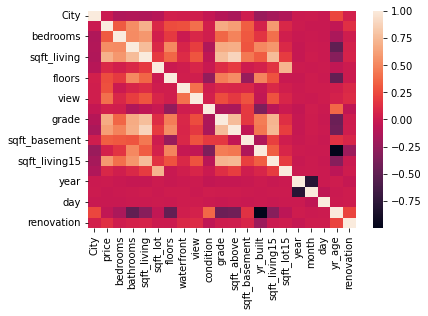

In [46]:
# Different from Neural Network
sns.heatmap(merged_zip.corr())

In [48]:
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)
a_train= a_train.reshape(-1, 1)
a_test = a_test.reshape(-1, 1)


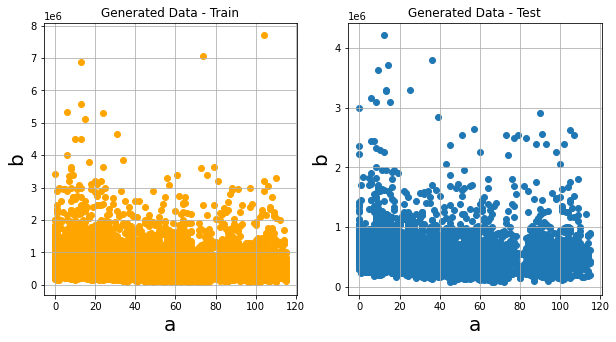

In [49]:
plt.figure(figsize=(10,5))
 
plt.subplot(1,2,1)
plt.scatter(a_train,b_train, c='orange')  
plt.xlabel('a', fontsize = 20) 
plt.ylabel('b', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

plt.subplot(1,2,2)
plt.scatter(a_test, b_test)  
plt.xlabel('a', fontsize = 20) 
plt.ylabel('b', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

### Group 2:



In [170]:
def base_model():
    Model = Sequential()
    Model.add(Dense(100, input_dim=42, kernel_initializer='normal', activation='relu'))
    Model.add(Dense(1, kernel_initializer='normal'))
    Model.compile(loss='mean_squared_error', optimizer='adam')
    return Model

In [92]:
#network = base_model()
#network.fit()
#kfold = KFold(n_splits=3)
#results = cross_val_score(estimator, X, Y, cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [164]:
Model = Sequential()
Model.add(Input(shape=(42,)))
Model.add(Dense(200, activation='relu'))
Model.add(Dense(150, activation='relu'))
Model.add(Dense(150, activation='relu'))
Model.add(Dense(1))
Model.compile(loss ="mean_squared_error", optimizer = 'adam')
history = Model.fit(x_train,y_train, epochs=100, batch_size=150, validation_split=0.2, verbose=1)

Epoch 1/100


 1/92 [..............................] - ETA: 58s - loss: 349579083776.0000

 5/92 [>.............................] - ETA: 1s - loss: 351945398681.6000 

12/92 [==>...........................] - ETA: 0s - loss: 337517750954.6667

17/92 [====>.........................] - ETA: 0s - loss: 333348648116.7059

21/92 [=====>........................] - ETA: 0s - loss: 331199264475.4286

23/92 [======>.......................] - ETA: 1s - loss: 330200259539.4783

25/92 [=======>......................] - ETA: 1s - loss: 329311708774.4000

27/92 [=======>......................] - ETA: 1s - loss: 328380123515.2593

30/92 [========>.....................] - ETA: 1s - loss: 326824312832.0000

35/92 [==========>...................] - ETA: 1s - loss: 324293103264.9143

38/92 [===========>..................] - ETA: 1s - loss: 322854643819.7895

41/92 [============>.................] - ETA: 0s - loss: 321440633131.7073

52/92 [===============>..............] - ETA: 0s - loss: 316604792201.8461

53/92 [================>.............] - ETA: 0s - loss: 316142519508.5283

59/92 [==================>...........] - ETA: 0s - loss: 313338726573.5593

72/92 [======================>.......] - ETA: 0s - loss: 306589994097.7778

83/92 [==========================>...] - ETA: 0s - loss: 300308682727.3253

92/92 [==============================] - 2s 16ms/step - loss: 294141123286.7097 - val_loss: 86574440448.0000


Epoch 2/100
 1/92 [..............................] - ETA: 1s - loss: 49381470208.0000

15/92 [===>..........................] - ETA: 0s - loss: 61774812501.3333

23/92 [======>.......................] - ETA: 0s - loss: 61592504230.9565

36/92 [==========>...................] - ETA: 0s - loss: 60565219441.7778

46/92 [==============>...............] - ETA: 0s - loss: 59464674348.5217

56/92 [=================>............] - ETA: 0s - loss: 58477481325.7143

64/92 [===================>..........] - ETA: 0s - loss: 57813951616.0000

74/92 [=======================>......] - ETA: 0s - loss: 57128649700.3243

84/92 [==========================>...] - ETA: 0s - loss: 56582086265.9048

92/92 [==============================] - 1s 6ms/step - loss: 56109204557.0753 - val_loss: 47947149312.0000


Epoch 3/100


 1/92 [..............................] - ETA: 1s - loss: 59080798208.0000

12/92 [==>...........................] - ETA: 0s - loss: 47741274112.0000

26/92 [=======>......................] - ETA: 0s - loss: 47216212755.6923

41/92 [============>.................] - ETA: 0s - loss: 47533601267.5122

51/92 [===============>..............] - ETA: 0s - loss: 47501042467.1373

61/92 [==================>...........] - ETA: 0s - loss: 47423586908.3279

73/92 [======================>.......] - ETA: 0s - loss: 47295572444.9315

84/92 [==========================>...] - ETA: 0s - loss: 47105075346.2857

92/92 [==============================] - 1s 7ms/step - loss: 46976787224.7742 - val_loss: 44004827136.0000


Epoch 4/100
 1/92 [..............................] - ETA: 1s - loss: 37261807616.0000

14/92 [===>..........................] - ETA: 0s - loss: 39070318299.4286

26/92 [=======>......................] - ETA: 0s - loss: 41930568782.7692

39/92 [===========>..................] - ETA: 0s - loss: 43517509842.0513

53/92 [================>.............] - ETA: 0s - loss: 44051031716.2264

66/92 [====================>.........] - ETA: 0s - loss: 44213525845.3333

79/92 [========================>.....] - ETA: 0s - loss: 44216540561.8228

91/92 [============================>.] - ETA: 0s - loss: 44139687530.9011

92/92 [==============================] - 1s 6ms/step - loss: 44129379713.3763 - val_loss: 43738075136.0000


Epoch 5/100
 1/92 [..............................] - ETA: 1s - loss: 32362635264.0000

17/92 [====>.........................] - ETA: 0s - loss: 39980083561.4118

38/92 [===========>..................] - ETA: 0s - loss: 40340872353.6842

54/92 [================>.............] - ETA: 0s - loss: 40772637127.1111

71/92 [======================>.......] - ETA: 0s - loss: 41130230279.2113

91/92 [============================>.] - ETA: 0s - loss: 41380636064.3516

92/92 [==============================] - 0s 5ms/step - loss: 41402073352.2581 - val_loss: 42128445440.0000


Epoch 6/100
 1/92 [..............................] - ETA: 2s - loss: 27815307264.0000

13/92 [===>..........................] - ETA: 0s - loss: 36160272226.4615

20/92 [=====>........................] - ETA: 0s - loss: 36992390758.4000

31/92 [=========>....................] - ETA: 0s - loss: 37935301136.5161

48/92 [==============>...............] - ETA: 0s - loss: 38780272640.0000

59/92 [==================>...........] - ETA: 0s - loss: 39089544174.6441

71/92 [======================>.......] - ETA: 0s - loss: 39410850686.1972

86/92 [===========================>..] - ETA: 0s - loss: 39701726946.2326

90/92 [============================>.] - ETA: 0s - loss: 39781397526.7556

92/92 [==============================] - 1s 7ms/step - loss: 39844256646.8817 - val_loss: 41836122112.0000


Epoch 7/100


 1/92 [..............................] - ETA: 0s - loss: 40422264832.0000

13/92 [===>..........................] - ETA: 0s - loss: 45196307534.7692

22/92 [======>.......................] - ETA: 0s - loss: 44340987531.6364

28/92 [========>.....................] - ETA: 0s - loss: 43978780233.1429

36/92 [==========>...................] - ETA: 0s - loss: 43838828657.7778

47/92 [==============>...............] - ETA: 0s - loss: 43619591538.3830

53/92 [================>.............] - ETA: 0s - loss: 43496737270.3396

61/92 [==================>...........] - ETA: 0s - loss: 43317737102.6885

72/92 [======================>.......] - ETA: 0s - loss: 43131130595.5556

83/92 [==========================>...] - ETA: 0s - loss: 42917936165.0120

92/92 [==============================] - 1s 7ms/step - loss: 42734608428.0430 - val_loss: 41094545408.0000


Epoch 8/100
 1/92 [..............................] - ETA: 1s - loss: 47985795072.0000

12/92 [==>...........................] - ETA: 0s - loss: 41357210282.6667

24/92 [======>.......................] - ETA: 0s - loss: 40210598741.3333

27/92 [=======>......................] - ETA: 0s - loss: 40100106240.0000

39/92 [===========>..................] - ETA: 0s - loss: 39939280790.9744

49/92 [==============>...............] - ETA: 0s - loss: 39806907538.2857

61/92 [==================>...........] - ETA: 0s - loss: 39949482487.6066

69/92 [=====================>........] - ETA: 0s - loss: 40067240232.8116

78/92 [========================>.....] - ETA: 0s - loss: 40161896763.0769

90/92 [============================>.] - ETA: 0s - loss: 40297654954.6667

92/92 [==============================] - 1s 7ms/step - loss: 40324170256.5161 - val_loss: 40441573376.0000


Epoch 9/100
 1/92 [..............................] - ETA: 1s - loss: 56735248384.0000

 6/92 [>.............................] - ETA: 0s - loss: 43861907456.0000

12/92 [==>...........................] - ETA: 0s - loss: 41897915392.0000

17/92 [====>.........................] - ETA: 0s - loss: 41858040530.8235

20/92 [=====>........................] - ETA: 0s - loss: 41990267904.0000

25/92 [=======>......................] - ETA: 0s - loss: 42172967321.6000

36/92 [==========>...................] - ETA: 0s - loss: 42122539008.0000

39/92 [===========>..................] - ETA: 0s - loss: 42112271596.3077

46/92 [==============>...............] - ETA: 0s - loss: 42060714518.2609

58/92 [=================>............] - ETA: 0s - loss: 41984045903.4483

70/92 [=====================>........] - ETA: 0s - loss: 41793776201.1429

83/92 [==========================>...] - ETA: 0s - loss: 41652579759.8072

92/92 [==============================] - ETA: 0s - loss: 41576549999.3043

92/92 [==============================] - 1s 9ms/step - loss: 41567574874.8387 - val_loss: 42209787904.0000


Epoch 10/100
 1/92 [..............................] - ETA: 1s - loss: 34309990400.0000

14/92 [===>..........................] - ETA: 0s - loss: 42090786669.7143

24/92 [======>.......................] - ETA: 0s - loss: 42290578517.3333

34/92 [==========>...................] - ETA: 0s - loss: 42146130944.0000

44/92 [=============>................] - ETA: 0s - loss: 41856150295.2727

58/92 [=================>............] - ETA: 0s - loss: 41458250752.0000

67/92 [====================>.........] - ETA: 0s - loss: 41239204115.1045

77/92 [========================>.....] - ETA: 0s - loss: 41091083091.1169

86/92 [===========================>..] - ETA: 0s - loss: 40992628902.6977

92/92 [==============================] - 1s 6ms/step - loss: 40939357415.2258 - val_loss: 39531425792.0000


Epoch 11/100
 1/92 [..............................] - ETA: 1s - loss: 46530801664.0000

14/92 [===>..........................] - ETA: 0s - loss: 41135354733.7143

32/92 [=========>....................] - ETA: 0s - loss: 39808114304.0000

44/92 [=============>................] - ETA: 0s - loss: 39505196683.6364

50/92 [===============>..............] - ETA: 0s - loss: 39355512422.4000

63/92 [===================>..........] - ETA: 0s - loss: 39137933669.5873

71/92 [======================>.......] - ETA: 0s - loss: 39082672647.2113

78/92 [========================>.....] - ETA: 0s - loss: 39084878611.6923

87/92 [===========================>..] - ETA: 0s - loss: 39104701263.4483

92/92 [==============================] - 1s 6ms/step - loss: 39138261234.2366 - val_loss: 39361961984.0000


Epoch 12/100
 1/92 [..............................] - ETA: 0s - loss: 46553841664.0000

13/92 [===>..........................] - ETA: 0s - loss: 43172200132.9231

24/92 [======>.......................] - ETA: 0s - loss: 43001214293.3333

36/92 [==========>...................] - ETA: 0s - loss: 42797221205.3333

47/92 [==============>...............] - ETA: 0s - loss: 42422010727.4894

58/92 [=================>............] - ETA: 0s - loss: 42033909053.7931

70/92 [=====================>........] - ETA: 0s - loss: 41767428505.6000

83/92 [==========================>...] - ETA: 0s - loss: 41460514618.6024

92/92 [==============================] - 1s 5ms/step - loss: 41237845113.1183 - val_loss: 38885990400.0000


Epoch 13/100


 1/92 [..............................] - ETA: 1s - loss: 30714220544.0000

12/92 [==>...........................] - ETA: 0s - loss: 38238374229.3333

21/92 [=====>........................] - ETA: 0s - loss: 38617611702.8571

26/92 [=======>......................] - ETA: 0s - loss: 38652305092.9231

37/92 [===========>..................] - ETA: 0s - loss: 38720488088.2162

48/92 [==============>...............] - ETA: 0s - loss: 38777481728.0000

58/92 [=================>............] - ETA: 0s - loss: 38799497922.2069

68/92 [=====================>........] - ETA: 0s - loss: 38807933831.5294

76/92 [=======================>......] - ETA: 0s - loss: 38845228409.2632

81/92 [=========================>....] - ETA: 0s - loss: 38864069720.4938

91/92 [============================>.] - ETA: 0s - loss: 38874617338.3736

92/92 [==============================] - 1s 8ms/step - loss: 38875976913.2043 - val_loss: 38788096000.0000


Epoch 14/100
 1/92 [..............................] - ETA: 0s - loss: 36933406720.0000

13/92 [===>..........................] - ETA: 0s - loss: 39594063399.3846

22/92 [======>.......................] - ETA: 0s - loss: 39511536360.7273

34/92 [==========>...................] - ETA: 0s - loss: 39127887028.7059

44/92 [=============>................] - ETA: 0s - loss: 39024405783.2727

53/92 [================>.............] - ETA: 0s - loss: 38979445122.4151

66/92 [====================>.........] - ETA: 0s - loss: 38986771487.0303

76/92 [=======================>......] - ETA: 0s - loss: 39090224990.3158

84/92 [==========================>...] - ETA: 0s - loss: 39176894659.0476

92/92 [==============================] - 1s 7ms/step - loss: 39227387023.1398 - val_loss: 39700094976.0000


Epoch 15/100
 1/92 [..............................] - ETA: 1s - loss: 32670011392.0000

16/92 [====>.........................] - ETA: 0s - loss: 40936957184.0000

27/92 [=======>......................] - ETA: 0s - loss: 40982185756.4444

39/92 [===========>..................] - ETA: 0s - loss: 40785027387.0769

51/92 [===============>..............] - ETA: 0s - loss: 40552166259.4510

61/92 [==================>...........] - ETA: 0s - loss: 40441580359.3443

72/92 [======================>.......] - ETA: 0s - loss: 40299208305.7778

86/92 [===========================>..] - ETA: 0s - loss: 40092667380.0930

92/92 [==============================] - 1s 7ms/step - loss: 39982082422.3656 - val_loss: 38144323584.0000


Epoch 16/100
 1/92 [..............................] - ETA: 1s - loss: 55669592064.0000

10/92 [==>...........................] - ETA: 0s - loss: 41714533580.8000

17/92 [====>.........................] - ETA: 0s - loss: 40796484788.7059

23/92 [======>.......................] - ETA: 0s - loss: 40278980875.1304

39/92 [===========>..................] - ETA: 0s - loss: 39606935446.9744

50/92 [===============>..............] - ETA: 0s - loss: 39310857011.2000

60/92 [==================>...........] - ETA: 0s - loss: 39107816243.2000

69/92 [=====================>........] - ETA: 0s - loss: 38935597115.3623

85/92 [==========================>...] - ETA: 0s - loss: 38722588575.6235

92/92 [==============================] - 1s 7ms/step - loss: 38636191215.4839 - val_loss: 37391941632.0000


Epoch 17/100
 1/92 [..............................] - ETA: 1s - loss: 40810369024.0000

14/92 [===>..........................] - ETA: 0s - loss: 40440562249.1429

16/92 [====>.........................] - ETA: 0s - loss: 40128426240.0000

26/92 [=======>......................] - ETA: 0s - loss: 39248789504.0000

36/92 [==========>...................] - ETA: 0s - loss: 38890732088.8889

41/92 [============>.................] - ETA: 0s - loss: 38708255768.9756

53/92 [================>.............] - ETA: 0s - loss: 38434945990.0377

67/92 [====================>.........] - ETA: 0s - loss: 38368838793.5522

78/92 [========================>.....] - ETA: 0s - loss: 38348426213.7436

91/92 [============================>.] - ETA: 0s - loss: 38325550788.9231

92/92 [==============================] - 1s 8ms/step - loss: 38316191039.3118 - val_loss: 37691805696.0000


Epoch 18/100
 1/92 [..............................] - ETA: 0s - loss: 34304841728.0000

17/92 [====>.........................] - ETA: 0s - loss: 37471108276.7059

31/92 [=========>....................] - ETA: 0s - loss: 38314059247.4839

41/92 [============>.................] - ETA: 0s - loss: 38310360188.8781

55/92 [================>.............] - ETA: 0s - loss: 38373344237.3818

71/92 [======================>.......] - ETA: 0s - loss: 38412029346.2535

83/92 [==========================>...] - ETA: 0s - loss: 38394531469.8795

92/92 [==============================] - ETA: 0s - loss: 38315497716.8696

92/92 [==============================] - 0s 5ms/step - loss: 38304685925.8495 - val_loss: 36581523456.0000


Epoch 19/100
 1/92 [..............................] - ETA: 1s - loss: 29548722176.0000

13/92 [===>..........................] - ETA: 0s - loss: 37910269479.3846

28/92 [========>.....................] - ETA: 0s - loss: 38243369033.1429

44/92 [=============>................] - ETA: 0s - loss: 38185462923.6364

58/92 [=================>............] - ETA: 0s - loss: 37951831887.4483

70/92 [=====================>........] - ETA: 0s - loss: 37813791509.9429

82/92 [=========================>....] - ETA: 0s - loss: 37754259630.8293

92/92 [==============================] - 0s 5ms/step - loss: 37694627025.2043 - val_loss: 36477161472.0000


Epoch 20/100


 1/92 [..............................] - ETA: 2s - loss: 31746134016.0000

15/92 [===>..........................] - ETA: 0s - loss: 40101277422.9333

28/92 [========>.....................] - ETA: 0s - loss: 39273383643.4286

44/92 [=============>................] - ETA: 0s - loss: 38358913024.0000

59/92 [==================>...........] - ETA: 0s - loss: 37827098381.0170

77/92 [========================>.....] - ETA: 0s - loss: 37469271079.8961

92/92 [==============================] - 0s 5ms/step - loss: 37296936057.1183 - val_loss: 35869327360.0000


Epoch 21/100


 1/92 [..............................] - ETA: 1s - loss: 24271441920.0000

14/92 [===>..........................] - ETA: 0s - loss: 33591474907.4286

33/92 [=========>....................] - ETA: 0s - loss: 35417386697.6970

44/92 [=============>................] - ETA: 0s - loss: 35809810106.1818

53/92 [================>.............] - ETA: 0s - loss: 35919472562.7170

71/92 [======================>.......] - ETA: 0s - loss: 36057384267.7183

85/92 [==========================>...] - ETA: 0s - loss: 36156318732.0471

92/92 [==============================] - 1s 5ms/step - loss: 36193539523.4409 - val_loss: 35605110784.0000


Epoch 22/100
 1/92 [..............................] - ETA: 0s - loss: 42589327360.0000

11/92 [==>...........................] - ETA: 0s - loss: 35805256610.9091

22/92 [======>.......................] - ETA: 0s - loss: 35359067694.5455

33/92 [=========>....................] - ETA: 0s - loss: 35356059648.0000

38/92 [===========>..................] - ETA: 0s - loss: 35417733066.1053

45/92 [=============>................] - ETA: 0s - loss: 35467434621.1556

51/92 [===============>..............] - ETA: 0s - loss: 35494772374.5882

56/92 [=================>............] - ETA: 0s - loss: 35479650560.0000

62/92 [===================>..........] - ETA: 0s - loss: 35507219125.6774

67/92 [====================>.........] - ETA: 0s - loss: 35509394263.8806

71/92 [======================>.......] - ETA: 0s - loss: 35506251776.0000

85/92 [==========================>...] - ETA: 0s - loss: 35501239428.5176

91/92 [============================>.] - ETA: 0s - loss: 35518858588.8352

92/92 [==============================] - 1s 9ms/step - loss: 35523755261.2473 - val_loss: 35207221248.0000


Epoch 23/100
 1/92 [..............................] - ETA: 1s - loss: 36417175552.0000

15/92 [===>..........................] - ETA: 0s - loss: 36698722577.0667

27/92 [=======>......................] - ETA: 0s - loss: 36855054639.4074

41/92 [============>.................] - ETA: 0s - loss: 36663920989.6585

54/92 [================>.............] - ETA: 0s - loss: 36483048334.2222

68/92 [=====================>........] - ETA: 0s - loss: 36350887032.4706

81/92 [=========================>....] - ETA: 0s - loss: 36215967086.6173

92/92 [==============================] - 1s 6ms/step - loss: 36100036938.3226 - val_loss: 37546815488.0000


Epoch 24/100


 1/92 [..............................] - ETA: 1s - loss: 32659052544.0000

11/92 [==>...........................] - ETA: 0s - loss: 38748933213.0909

24/92 [======>.......................] - ETA: 0s - loss: 38219202645.3333

29/92 [========>.....................] - ETA: 0s - loss: 38137370765.2414

44/92 [=============>................] - ETA: 0s - loss: 37574906647.2727

59/92 [==================>...........] - ETA: 0s - loss: 37163604176.2712

72/92 [======================>.......] - ETA: 0s - loss: 36991889095.1111

85/92 [==========================>...] - ETA: 0s - loss: 36808672749.9294

92/92 [==============================] - 1s 7ms/step - loss: 36728524998.1936 - val_loss: 36268785664.0000


Epoch 25/100
 1/92 [..............................] - ETA: 1s - loss: 54017036288.0000

17/92 [====>.........................] - ETA: 0s - loss: 41723464764.2353

33/92 [=========>....................] - ETA: 0s - loss: 39854744669.0909

47/92 [==============>...............] - ETA: 0s - loss: 38944319880.1702

63/92 [===================>..........] - ETA: 0s - loss: 38156575175.1111

74/92 [=======================>......] - ETA: 0s - loss: 37803236047.5676

82/92 [=========================>....] - ETA: 0s - loss: 37578731869.6585

91/92 [============================>.] - ETA: 0s - loss: 37347503812.9231

92/92 [==============================] - 1s 6ms/step - loss: 37302303182.4516 - val_loss: 36470870016.0000


Epoch 26/100


 1/92 [..............................] - ETA: 2s - loss: 39695986688.0000

11/92 [==>...........................] - ETA: 0s - loss: 38164598784.0000

19/92 [=====>........................] - ETA: 0s - loss: 36775207989.8947

32/92 [=========>....................] - ETA: 0s - loss: 36717005056.0000

44/92 [=============>................] - ETA: 0s - loss: 36818775784.7273

56/92 [=================>............] - ETA: 0s - loss: 36643502811.4286

65/92 [====================>.........] - ETA: 0s - loss: 36458934272.0000

74/92 [=======================>......] - ETA: 0s - loss: 36271120550.0541

83/92 [==========================>...] - ETA: 0s - loss: 36125105781.2048

92/92 [==============================] - 1s 7ms/step - loss: 35984913264.8602 - val_loss: 36763230208.0000


Epoch 27/100
 1/92 [..............................] - ETA: 0s - loss: 57210519552.0000

14/92 [===>..........................] - ETA: 0s - loss: 42253813760.0000

26/92 [=======>......................] - ETA: 0s - loss: 39633730953.8462

44/92 [=============>................] - ETA: 0s - loss: 38108339665.4545

60/92 [==================>...........] - ETA: 0s - loss: 37483422105.6000

68/92 [=====================>........] - ETA: 0s - loss: 37261598900.7059

78/92 [========================>.....] - ETA: 0s - loss: 37045727021.9487

90/92 [============================>.] - ETA: 0s - loss: 36818561433.6000

92/92 [==============================] - 1s 6ms/step - loss: 36770311487.3118 - val_loss: 35088490496.0000


Epoch 28/100
 1/92 [..............................] - ETA: 0s - loss: 30696933376.0000

12/92 [==>...........................] - ETA: 0s - loss: 31873676288.0000

25/92 [=======>......................] - ETA: 0s - loss: 32324768481.2800

36/92 [==========>...................] - ETA: 0s - loss: 32960870058.6667

45/92 [=============>................] - ETA: 0s - loss: 33272892029.1556

55/92 [================>.............] - ETA: 0s - loss: 33449746692.6545

63/92 [===================>..........] - ETA: 0s - loss: 33577642764.1905

73/92 [======================>.......] - ETA: 0s - loss: 33695985860.3836

81/92 [=========================>....] - ETA: 0s - loss: 33777603444.9383

87/92 [===========================>..] - ETA: 0s - loss: 33825226563.6782

92/92 [==============================] - 1s 7ms/step - loss: 33871974664.2581 - val_loss: 34564874240.0000


Epoch 29/100
 1/92 [..............................] - ETA: 1s - loss: 36222517248.0000

15/92 [===>..........................] - ETA: 0s - loss: 34138503304.5333

23/92 [======>.......................] - ETA: 0s - loss: 34335011884.5217

37/92 [===========>..................] - ETA: 0s - loss: 34369738475.2432

47/92 [==============>...............] - ETA: 0s - loss: 34511054455.8298

56/92 [=================>............] - ETA: 0s - loss: 34546819730.2857

70/92 [=====================>........] - ETA: 0s - loss: 34601307048.2286

79/92 [========================>.....] - ETA: 0s - loss: 34583145044.2532

91/92 [============================>.] - ETA: 0s - loss: 34582493971.6923

92/92 [==============================] - 1s 6ms/step - loss: 34578893042.2366 - val_loss: 34800517120.0000


Epoch 30/100


 1/92 [..............................] - ETA: 2s - loss: 38513913856.0000

18/92 [====>.........................] - ETA: 0s - loss: 36906399971.5556

29/92 [========>.....................] - ETA: 0s - loss: 36107373603.3103

41/92 [============>.................] - ETA: 0s - loss: 35625297870.0488

51/92 [===============>..............] - ETA: 0s - loss: 35502477793.8824

63/92 [===================>..........] - ETA: 0s - loss: 35419316614.0952

75/92 [=======================>......] - ETA: 0s - loss: 35338225254.4000

86/92 [===========================>..] - ETA: 0s - loss: 35238505829.2093

92/92 [==============================] - 1s 8ms/step - loss: 35156897131.3548 - val_loss: 34408493056.0000


Epoch 31/100
 1/92 [..............................] - ETA: 1s - loss: 35583242240.0000

14/92 [===>..........................] - ETA: 0s - loss: 34399651401.1429

23/92 [======>.......................] - ETA: 0s - loss: 34386587915.1304

40/92 [============>.................] - ETA: 0s - loss: 34365118617.6000

59/92 [==================>...........] - ETA: 0s - loss: 34083112855.8644

75/92 [=======================>......] - ETA: 0s - loss: 34024358242.9867

92/92 [==============================] - 1s 6ms/step - loss: 34049234525.5914 - val_loss: 34484948992.0000


Epoch 32/100
 1/92 [..............................] - ETA: 1s - loss: 30050856960.0000

17/92 [====>.........................] - ETA: 0s - loss: 34788165752.4706

27/92 [=======>......................] - ETA: 0s - loss: 33902021973.3333

41/92 [============>.................] - ETA: 0s - loss: 33525806504.5854

56/92 [=================>............] - ETA: 0s - loss: 33353130752.0000

70/92 [=====================>........] - ETA: 0s - loss: 33346255901.2571

86/92 [===========================>..] - ETA: 0s - loss: 33450459731.3488

92/92 [==============================] - 1s 6ms/step - loss: 33479841747.9570 - val_loss: 33890111488.0000


Epoch 33/100
 1/92 [..............................] - ETA: 0s - loss: 25389158400.0000

16/92 [====>.........................] - ETA: 0s - loss: 30987614848.0000

31/92 [=========>....................] - ETA: 0s - loss: 32244158001.5484

47/92 [==============>...............] - ETA: 0s - loss: 32757632239.6596

53/92 [================>.............] - ETA: 0s - loss: 32820637541.4340

57/92 [=================>............] - ETA: 0s - loss: 32867377367.5789

59/92 [==================>...........] - ETA: 0s - loss: 32894646237.2881

62/92 [===================>..........] - ETA: 0s - loss: 32942439490.0645

65/92 [====================>.........] - ETA: 0s - loss: 32991466606.2769

67/92 [====================>.........] - ETA: 0s - loss: 33015320514.8657

69/92 [=====================>........] - ETA: 0s - loss: 33037959761.6232

75/92 [=======================>......] - ETA: 0s - loss: 33109483410.7733

84/92 [==========================>...] - ETA: 0s - loss: 33183128892.9524

92/92 [==============================] - 1s 10ms/step - loss: 33229901493.6774 - val_loss: 33344081920.0000


Epoch 34/100
 1/92 [..............................] - ETA: 1s - loss: 27232632832.0000

 7/92 [=>............................] - ETA: 0s - loss: 31028712594.2857

11/92 [==>...........................] - ETA: 0s - loss: 31393367505.4545

20/92 [=====>........................] - ETA: 0s - loss: 31718791987.2000

28/92 [========>.....................] - ETA: 0s - loss: 31852909202.2857

31/92 [=========>....................] - ETA: 0s - loss: 31857601569.0323

36/92 [==========>...................] - ETA: 0s - loss: 31887361479.1111

44/92 [=============>................] - ETA: 0s - loss: 32089757928.7273

57/92 [=================>............] - ETA: 0s - loss: 32363672198.7368

68/92 [=====================>........] - ETA: 0s - loss: 32510768429.1765

75/92 [=======================>......] - ETA: 0s - loss: 32574326647.4667

84/92 [==========================>...] - ETA: 0s - loss: 32632663673.9048

89/92 [============================>.] - ETA: 0s - loss: 32676065280.0000

92/92 [==============================] - 1s 9ms/step - loss: 32714565918.2796 - val_loss: 34339244032.0000


Epoch 35/100


 1/92 [..............................] - ETA: 2s - loss: 29907574784.0000

11/92 [==>...........................] - ETA: 0s - loss: 28875666152.7273

19/92 [=====>........................] - ETA: 0s - loss: 29874603277.4737

27/92 [=======>......................] - ETA: 0s - loss: 30428165537.1852

38/92 [===========>..................] - ETA: 0s - loss: 30896655090.5263

51/92 [===============>..............] - ETA: 0s - loss: 31416115320.4706

61/92 [==================>...........] - ETA: 0s - loss: 31702163321.7049

69/92 [=====================>........] - ETA: 0s - loss: 31917060838.0290

82/92 [=========================>....] - ETA: 0s - loss: 32201296945.9512

88/92 [===========================>..] - ETA: 0s - loss: 32313021742.5455

92/92 [==============================] - 1s 8ms/step - loss: 32387645285.8495 - val_loss: 34842988544.0000


Epoch 36/100
 1/92 [..............................] - ETA: 1s - loss: 37349527552.0000

 6/92 [>.............................] - ETA: 0s - loss: 31245772117.3333

13/92 [===>..........................] - ETA: 0s - loss: 31143749947.0769

22/92 [======>.......................] - ETA: 0s - loss: 31444603252.3636

37/92 [===========>..................] - ETA: 0s - loss: 31686544024.2162

49/92 [==============>...............] - ETA: 0s - loss: 31988387254.8571

60/92 [==================>...........] - ETA: 0s - loss: 32147949568.0000

72/92 [======================>.......] - ETA: 0s - loss: 32326654037.3333

84/92 [==========================>...] - ETA: 0s - loss: 32491156382.4762

92/92 [==============================] - 1s 6ms/step - loss: 32619835392.0000 - val_loss: 33759819776.0000


Epoch 37/100


 1/92 [..............................] - ETA: 1s - loss: 26879590400.0000

14/92 [===>..........................] - ETA: 0s - loss: 31015044242.2857

25/92 [=======>......................] - ETA: 0s - loss: 31515339243.5200

42/92 [============>.................] - ETA: 0s - loss: 32360221793.5238

49/92 [==============>...............] - ETA: 0s - loss: 32649000249.4694

61/92 [==================>...........] - ETA: 0s - loss: 33004728756.4590

68/92 [=====================>........] - ETA: 0s - loss: 33113897080.4706

80/92 [=========================>....] - ETA: 0s - loss: 33189886848.0000

92/92 [==============================] - ETA: 0s - loss: 33239259603.4783

92/92 [==============================] - 1s 6ms/step - loss: 33242120412.2151 - val_loss: 34998444032.0000


Epoch 38/100
 1/92 [..............................] - ETA: 0s - loss: 36332408832.0000

13/92 [===>..........................] - ETA: 0s - loss: 37164863172.9231

26/92 [=======>......................] - ETA: 0s - loss: 36426434323.6923

31/92 [=========>....................] - ETA: 0s - loss: 36132751492.1290

38/92 [===========>..................] - ETA: 0s - loss: 35891839029.8947

45/92 [=============>................] - ETA: 0s - loss: 35759095034.3111

53/92 [================>.............] - ETA: 0s - loss: 35636404958.1887

60/92 [==================>...........] - ETA: 0s - loss: 35499405755.7333

67/92 [====================>.........] - ETA: 0s - loss: 35352644042.5075

72/92 [======================>.......] - ETA: 0s - loss: 35277424696.8889

74/92 [=======================>......] - ETA: 0s - loss: 35250583967.1351

77/92 [========================>.....] - ETA: 0s - loss: 35206548626.2857

81/92 [=========================>....] - ETA: 0s - loss: 35154664890.4691

87/92 [===========================>..] - ETA: 0s - loss: 35086327902.1609

91/92 [============================>.] - ETA: 0s - loss: 35033554156.3077

92/92 [==============================] - 1s 13ms/step - loss: 35007597424.8602 - val_loss: 33907359744.0000


Epoch 39/100
 1/92 [..............................] - ETA: 6s - loss: 22845048832.0000

 7/92 [=>............................] - ETA: 0s - loss: 29803984310.8571

10/92 [==>...........................] - ETA: 1s - loss: 30770775654.4000

19/92 [=====>........................] - ETA: 0s - loss: 32457346425.2632

29/92 [========>.....................] - ETA: 0s - loss: 33118082012.6897

39/92 [===========>..................] - ETA: 0s - loss: 33242309815.7949

47/92 [==============>...............] - ETA: 0s - loss: 33176975665.0213

57/92 [=================>............] - ETA: 0s - loss: 33122089175.5789

62/92 [===================>..........] - ETA: 0s - loss: 33119947643.8710

64/92 [===================>..........] - ETA: 0s - loss: 33124845664.0000

67/92 [====================>.........] - ETA: 0s - loss: 33123816860.6567

74/92 [=======================>......] - ETA: 0s - loss: 33113841082.8108

82/92 [=========================>....] - ETA: 0s - loss: 33144148492.4878

90/92 [============================>.] - ETA: 0s - loss: 33165814624.7111

92/92 [==============================] - 1s 12ms/step - loss: 33171083968.6882 - val_loss: 33904965632.0000


Epoch 40/100
 1/92 [..............................] - ETA: 1s - loss: 36203884544.0000

10/92 [==>...........................] - ETA: 0s - loss: 31740283494.4000

14/92 [===>..........................] - ETA: 0s - loss: 31759827529.1429

21/92 [=====>........................] - ETA: 0s - loss: 31750270000.7619

29/92 [========>.....................] - ETA: 0s - loss: 31806657924.4138

36/92 [==========>...................] - ETA: 0s - loss: 31735131818.6667

43/92 [=============>................] - ETA: 0s - loss: 31846195390.5116

49/92 [==============>...............] - ETA: 0s - loss: 32040778814.6939

57/92 [=================>............] - ETA: 0s - loss: 32260936075.2281

62/92 [===================>..........] - ETA: 0s - loss: 32332681381.1613

72/92 [======================>.......] - ETA: 0s - loss: 32424519025.7778

81/92 [=========================>....] - ETA: 0s - loss: 32467168066.3704

87/92 [===========================>..] - ETA: 0s - loss: 32490590137.3793

92/92 [==============================] - 1s 10ms/step - loss: 32537007533.4194 - val_loss: 33675163648.0000


Epoch 41/100
 1/92 [..............................] - ETA: 0s - loss: 21289809920.0000

13/92 [===>..........................] - ETA: 0s - loss: 29827135960.6154

25/92 [=======>......................] - ETA: 0s - loss: 31361632419.8400

34/92 [==========>...................] - ETA: 0s - loss: 31863727164.2353

47/92 [==============>...............] - ETA: 0s - loss: 32335239603.7447

53/92 [================>.............] - ETA: 0s - loss: 32419095725.8868

60/92 [==================>...........] - ETA: 0s - loss: 32467336055.4667

66/92 [====================>.........] - ETA: 0s - loss: 32511952616.7273

73/92 [======================>.......] - ETA: 0s - loss: 32589150853.2603

84/92 [==========================>...] - ETA: 0s - loss: 32677717772.1905

92/92 [==============================] - 1s 8ms/step - loss: 32771242798.7957 - val_loss: 35003637760.0000


Epoch 42/100


 1/92 [..............................] - ETA: 0s - loss: 33586231296.0000

14/92 [===>..........................] - ETA: 0s - loss: 33356608512.0000

21/92 [=====>........................] - ETA: 0s - loss: 33023310214.0952

34/92 [==========>...................] - ETA: 0s - loss: 32593815009.8824

46/92 [==============>...............] - ETA: 0s - loss: 32367833132.5217

57/92 [=================>............] - ETA: 0s - loss: 32327953857.1228

71/92 [======================>.......] - ETA: 0s - loss: 32415548949.6338

84/92 [==========================>...] - ETA: 0s - loss: 32467096844.1905

92/92 [==============================] - 1s 6ms/step - loss: 32504151359.3118 - val_loss: 33503074304.0000


Epoch 43/100
 1/92 [..............................] - ETA: 0s - loss: 33657593856.0000

14/92 [===>..........................] - ETA: 0s - loss: 35076810313.1429

29/92 [========>.....................] - ETA: 0s - loss: 34232194577.6552

45/92 [=============>................] - ETA: 0s - loss: 33954672685.5111

60/92 [==================>...........] - ETA: 0s - loss: 33791201006.9333

71/92 [======================>.......] - ETA: 0s - loss: 33658914325.6338

81/92 [=========================>....] - ETA: 0s - loss: 33538039656.2963

91/92 [============================>.] - ETA: 0s - loss: 33457306185.1429

92/92 [==============================] - 1s 6ms/step - loss: 33446408610.4086 - val_loss: 35339481088.0000


Epoch 44/100


 1/92 [..............................] - ETA: 0s - loss: 46112251904.0000

16/92 [====>.........................] - ETA: 0s - loss: 37119341056.0000

29/92 [========>.....................] - ETA: 0s - loss: 35624736414.8966

46/92 [==============>...............] - ETA: 0s - loss: 34696656762.4348

62/92 [===================>..........] - ETA: 0s - loss: 34202114048.0000

78/92 [========================>.....] - ETA: 0s - loss: 33978847126.9744

92/92 [==============================] - 0s 5ms/step - loss: 33821586773.3333 - val_loss: 32607770624.0000


Epoch 45/100
 1/92 [..............................] - ETA: 0s - loss: 20297484288.0000

19/92 [=====>........................] - ETA: 0s - loss: 31215686170.9474

38/92 [===========>..................] - ETA: 0s - loss: 31211031390.3158

56/92 [=================>............] - ETA: 0s - loss: 31347687533.7143

73/92 [======================>.......] - ETA: 0s - loss: 31594099613.8082

90/92 [============================>.] - ETA: 0s - loss: 31766955849.9556

92/92 [==============================] - 0s 5ms/step - loss: 31795253952.6882 - val_loss: 35198758912.0000


Epoch 46/100
 1/92 [..............................] - ETA: 0s - loss: 38675857408.0000

15/92 [===>..........................] - ETA: 0s - loss: 33217983146.6667

26/92 [=======>......................] - ETA: 0s - loss: 33161282638.7692

33/92 [=========>....................] - ETA: 0s - loss: 33057456128.0000

38/92 [===========>..................] - ETA: 0s - loss: 32978784794.9474

41/92 [============>.................] - ETA: 0s - loss: 32947066880.0000

43/92 [=============>................] - ETA: 0s - loss: 32920334288.3721

47/92 [==============>...............] - ETA: 0s - loss: 32856859103.3191

63/92 [===================>..........] - ETA: 0s - loss: 32757542391.8730

76/92 [=======================>......] - ETA: 0s - loss: 32762027331.3684

91/92 [============================>.] - ETA: 0s - loss: 32777946078.2418

92/92 [==============================] - 1s 7ms/step - loss: 32779913105.8925 - val_loss: 32744171520.0000


Epoch 47/100
 1/92 [..............................] - ETA: 0s - loss: 35668484096.0000

 6/92 [>.............................] - ETA: 0s - loss: 36378476544.0000

21/92 [=====>........................] - ETA: 0s - loss: 35124607658.6667

28/92 [========>.....................] - ETA: 0s - loss: 34551598445.7143

38/92 [===========>..................] - ETA: 0s - loss: 33973658947.3684

54/92 [================>.............] - ETA: 0s - loss: 33453915401.4815

57/92 [=================>............] - ETA: 0s - loss: 33351015298.2456

62/92 [===================>..........] - ETA: 0s - loss: 33205098496.0000

76/92 [=======================>......] - ETA: 0s - loss: 32970396052.2105

91/92 [============================>.] - ETA: 0s - loss: 32860828278.1538

92/92 [==============================] - 1s 7ms/step - loss: 32851744878.1075 - val_loss: 33929656320.0000


Epoch 48/100
 1/92 [..............................] - ETA: 0s - loss: 34211557376.0000

18/92 [====>.........................] - ETA: 0s - loss: 31784692394.6667

32/92 [=========>....................] - ETA: 0s - loss: 31485944768.0000

47/92 [==============>...............] - ETA: 0s - loss: 31632216935.4894

63/92 [===================>..........] - ETA: 0s - loss: 31731941961.1429

77/92 [========================>.....] - ETA: 0s - loss: 31905830513.0390

91/92 [============================>.] - ETA: 0s - loss: 32001324380.8352

92/92 [==============================] - 0s 4ms/step - loss: 32008172819.2688 - val_loss: 32273926144.0000


Epoch 49/100
 1/92 [..............................] - ETA: 0s - loss: 23040223232.0000

17/92 [====>.........................] - ETA: 0s - loss: 28978315625.4118

33/92 [=========>....................] - ETA: 0s - loss: 29762122162.4242

50/92 [===============>..............] - ETA: 0s - loss: 30418892021.7600

67/92 [====================>.........] - ETA: 0s - loss: 30800364987.2239

83/92 [==========================>...] - ETA: 0s - loss: 31031331358.8434

92/92 [==============================] - 1s 6ms/step - loss: 31172946910.9677 - val_loss: 32367996928.0000


Epoch 50/100
 1/92 [..............................] - ETA: 0s - loss: 25765361664.0000

 9/92 [=>............................] - ETA: 0s - loss: 29613170005.3333

20/92 [=====>........................] - ETA: 0s - loss: 30263504076.8000

37/92 [===========>..................] - ETA: 0s - loss: 30740656847.5676

50/92 [===============>..............] - ETA: 0s - loss: 31229722992.6400

67/92 [====================>.........] - ETA: 0s - loss: 31585068414.0896

84/92 [==========================>...] - ETA: 0s - loss: 31741042834.2857

92/92 [==============================] - 1s 7ms/step - loss: 31772297700.4731 - val_loss: 32339009536.0000


Epoch 51/100
 1/92 [..............................] - ETA: 1s - loss: 43001270272.0000

10/92 [==>...........................] - ETA: 0s - loss: 34410080051.2000

27/92 [=======>......................] - ETA: 0s - loss: 32591308420.7407

43/92 [=============>................] - ETA: 0s - loss: 32455873845.5814

59/92 [==================>...........] - ETA: 0s - loss: 32339957274.0339

75/92 [=======================>......] - ETA: 0s - loss: 32304991218.3467



92/92 [==============================] - 0s 5ms/step - loss: 32277917806.1075 - val_loss: 33459038208.0000


Epoch 52/100
 1/92 [..............................] - ETA: 0s - loss: 29482973184.0000

16/92 [====>.........................] - ETA: 0s - loss: 31007275776.0000

28/92 [========>.....................] - ETA: 0s - loss: 31478731044.5714

46/92 [==============>...............] - ETA: 0s - loss: 31633478923.1304

63/92 [===================>..........] - ETA: 0s - loss: 31851324562.2857

77/92 [========================>.....] - ETA: 0s - loss: 31859836741.8182

92/92 [==============================] - 0s 4ms/step - loss: 31900711638.7097 - val_loss: 32159426560.0000


Epoch 53/100
 1/92 [..............................] - ETA: 0s - loss: 31435739136.0000

18/92 [====>.........................] - ETA: 0s - loss: 33292738104.8889

35/92 [==========>...................] - ETA: 0s - loss: 33298934813.2571

51/92 [===============>..............] - ETA: 0s - loss: 32804270240.6275

64/92 [===================>..........] - ETA: 0s - loss: 32531360800.0000

77/92 [========================>.....] - ETA: 0s - loss: 32358755075.3247

90/92 [============================>.] - ETA: 0s - loss: 32259413060.2667

92/92 [==============================] - 1s 6ms/step - loss: 32245065287.5699 - val_loss: 33184327680.0000


Epoch 54/100
 1/92 [..............................] - ETA: 0s - loss: 36810850304.0000

 8/92 [=>............................] - ETA: 0s - loss: 33165136128.0000

15/92 [===>..........................] - ETA: 0s - loss: 32624459366.4000

20/92 [=====>........................] - ETA: 0s - loss: 32222319001.6000

34/92 [==========>...................] - ETA: 0s - loss: 31643099256.4706

41/92 [============>.................] - ETA: 0s - loss: 31538997297.9512

55/92 [================>.............] - ETA: 0s - loss: 31408050995.2000

72/92 [======================>.......] - ETA: 0s - loss: 31346968490.6667

89/92 [============================>.] - ETA: 0s - loss: 31399692403.0562

92/92 [==============================] - 1s 7ms/step - loss: 31418603740.2151 - val_loss: 32046948352.0000


Epoch 55/100
 1/92 [..............................] - ETA: 0s - loss: 23484954624.0000

13/92 [===>..........................] - ETA: 0s - loss: 33659400664.6154

29/92 [========>.....................] - ETA: 0s - loss: 33038939877.5172

43/92 [=============>................] - ETA: 0s - loss: 32967771588.4651

60/92 [==================>...........] - ETA: 0s - loss: 32842796100.2667

76/92 [=======================>......] - ETA: 0s - loss: 32764227503.1579

91/92 [============================>.] - ETA: 0s - loss: 32619982667.9560

92/92 [==============================] - 0s 4ms/step - loss: 32606097496.0860 - val_loss: 33979238400.0000


Epoch 56/100
 1/92 [..............................] - ETA: 0s - loss: 35289907200.0000

17/92 [====>.........................] - ETA: 0s - loss: 32072937231.0588

33/92 [=========>....................] - ETA: 0s - loss: 31714905553.4545

49/92 [==============>...............] - ETA: 0s - loss: 31565411725.0612

66/92 [====================>.........] - ETA: 0s - loss: 31550923031.2727

83/92 [==========================>...] - ETA: 0s - loss: 31548124369.7349

92/92 [==============================] - 0s 5ms/step - loss: 31535300079.4839 - val_loss: 31718361088.0000


Epoch 57/100
 1/92 [..............................] - ETA: 0s - loss: 32354371584.0000

17/92 [====>.........................] - ETA: 0s - loss: 29619801389.1765

28/92 [========>.....................] - ETA: 0s - loss: 29594235757.7143

39/92 [===========>..................] - ETA: 0s - loss: 29846296786.0513

55/92 [================>.............] - ETA: 0s - loss: 30197845680.8727

66/92 [====================>.........] - ETA: 0s - loss: 30387354996.3636

78/92 [========================>.....] - ETA: 0s - loss: 30576142703.5897

89/92 [============================>.] - ETA: 0s - loss: 30717576709.7528

92/92 [==============================] - 1s 7ms/step - loss: 30765419134.6237 - val_loss: 32120752128.0000


Epoch 58/100
 1/92 [..............................] - ETA: 0s - loss: 27711092736.0000

16/92 [====>.........................] - ETA: 0s - loss: 31225728512.0000

30/92 [========>.....................] - ETA: 0s - loss: 31297528285.8667

45/92 [=============>................] - ETA: 0s - loss: 31280374124.0889

59/92 [==================>...........] - ETA: 0s - loss: 31313786637.0169

75/92 [=======================>......] - ETA: 0s - loss: 31305793181.0133

89/92 [============================>.] - ETA: 0s - loss: 31335422113.0787

92/92 [==============================] - 1s 7ms/step - loss: 31339095689.6344 - val_loss: 31748159488.0000


Epoch 59/100
 1/92 [..............................] - ETA: 0s - loss: 26119067648.0000

11/92 [==>...........................] - ETA: 0s - loss: 30518610478.5455

19/92 [=====>........................] - ETA: 0s - loss: 30860535592.4211

23/92 [======>.......................] - ETA: 0s - loss: 30735005250.7826

31/92 [=========>....................] - ETA: 0s - loss: 30515764983.7419

43/92 [=============>................] - ETA: 0s - loss: 30526911988.0930

51/92 [===============>..............] - ETA: 0s - loss: 30615244037.0196

57/92 [=================>............] - ETA: 0s - loss: 30676877383.8596

66/92 [====================>.........] - ETA: 0s - loss: 30724913493.3333

73/92 [======================>.......] - ETA: 0s - loss: 30764433295.7808

79/92 [========================>.....] - ETA: 0s - loss: 30801874788.4557

86/92 [===========================>..] - ETA: 0s - loss: 30847475188.0930

92/92 [==============================] - 1s 9ms/step - loss: 30878801039.1398 - val_loss: 31936133120.0000


Epoch 60/100
 1/92 [..............................] - ETA: 0s - loss: 38739615744.0000

 7/92 [=>............................] - ETA: 0s - loss: 32705690477.7143

16/92 [====>.........................] - ETA: 0s - loss: 31716572416.0000

25/92 [=======>......................] - ETA: 0s - loss: 31255013867.5200

31/92 [=========>....................] - ETA: 0s - loss: 31039679124.6452

40/92 [============>.................] - ETA: 0s - loss: 30927645747.2000

51/92 [===============>..............] - ETA: 0s - loss: 30974156157.4902

61/92 [==================>...........] - ETA: 0s - loss: 30976256570.7541

73/92 [======================>.......] - ETA: 0s - loss: 30986516592.2192

87/92 [===========================>..] - ETA: 0s - loss: 30986055091.4943

92/92 [==============================] - 1s 7ms/step - loss: 30997699220.6452 - val_loss: 31474737152.0000


Epoch 61/100
 1/92 [..............................] - ETA: 1s - loss: 29160747008.0000

 3/92 [..............................] - ETA: 2s - loss: 28312177322.6667

11/92 [==>...........................] - ETA: 0s - loss: 29249215767.2727

23/92 [======>.......................] - ETA: 0s - loss: 28994960695.6522

35/92 [==========>...................] - ETA: 0s - loss: 29378268657.3714

45/92 [=============>................] - ETA: 0s - loss: 29744492043.3778

54/92 [================>.............] - ETA: 0s - loss: 29993846670.2222

61/92 [==================>...........] - ETA: 0s - loss: 30171899870.4262

67/92 [====================>.........] - ETA: 0s - loss: 30267124384.4776

74/92 [=======================>......] - ETA: 0s - loss: 30387916800.0000

78/92 [========================>.....] - ETA: 0s - loss: 30444382024.2051

81/92 [=========================>....] - ETA: 0s - loss: 30480547233.1852

89/92 [============================>.] - ETA: 0s - loss: 30549432273.9775

92/92 [==============================] - 1s 9ms/step - loss: 30573003500.7312 - val_loss: 31103430656.0000


Epoch 62/100
 1/92 [..............................] - ETA: 0s - loss: 28506888192.0000

 8/92 [=>............................] - ETA: 0s - loss: 31820072704.0000

13/92 [===>..........................] - ETA: 0s - loss: 31495229282.4615

21/92 [=====>........................] - ETA: 0s - loss: 30811936475.4286

26/92 [=======>......................] - ETA: 0s - loss: 30657398232.6154

34/92 [==========>...................] - ETA: 0s - loss: 30737113208.4706

47/92 [==============>...............] - ETA: 0s - loss: 30838561116.5957

54/92 [================>.............] - ETA: 0s - loss: 30846854106.0741

59/92 [==================>...........] - ETA: 0s - loss: 30849545163.9322

67/92 [====================>.........] - ETA: 0s - loss: 30847126787.8209

77/92 [========================>.....] - ETA: 0s - loss: 30854130408.7273

83/92 [==========================>...] - ETA: 0s - loss: 30845692323.4699

92/92 [==============================] - 1s 10ms/step - loss: 30836453948.5591 - val_loss: 31134490624.0000


Epoch 63/100
 1/92 [..............................] - ETA: 0s - loss: 34838974464.0000

12/92 [==>...........................] - ETA: 0s - loss: 29080321024.0000

24/92 [======>.......................] - ETA: 0s - loss: 29347383125.3333

32/92 [=========>....................] - ETA: 0s - loss: 29585318848.0000

38/92 [===========>..................] - ETA: 0s - loss: 29705780547.3684

44/92 [=============>................] - ETA: 0s - loss: 29784036212.3636

49/92 [==============>...............] - ETA: 0s - loss: 29881950834.9388

56/92 [=================>............] - ETA: 0s - loss: 29986817316.5714

60/92 [==================>...........] - ETA: 0s - loss: 30034981410.1333

65/92 [====================>.........] - ETA: 0s - loss: 30083733535.5077

71/92 [======================>.......] - ETA: 0s - loss: 30170634095.7746

76/92 [=======================>......] - ETA: 0s - loss: 30242824596.2105

86/92 [===========================>..] - ETA: 0s - loss: 30348692289.4884

92/92 [==============================] - 1s 10ms/step - loss: 30400628934.1936 - val_loss: 31994978304.0000


Epoch 64/100
 1/92 [..............................] - ETA: 0s - loss: 43097853952.0000

 6/92 [>.............................] - ETA: 1s - loss: 41074505045.3333

 9/92 [=>............................] - ETA: 1s - loss: 39581014698.6667

14/92 [===>..........................] - ETA: 1s - loss: 37712886052.5714

18/92 [====>.........................] - ETA: 0s - loss: 36697930069.3333

22/92 [======>.......................] - ETA: 0s - loss: 35975884241.4545

29/92 [========>.....................] - ETA: 0s - loss: 34913362626.2069

37/92 [===========>..................] - ETA: 0s - loss: 34171086460.5405

43/92 [=============>................] - ETA: 0s - loss: 33816115771.5349

50/92 [===============>..............] - ETA: 0s - loss: 33598028881.9200

55/92 [================>.............] - ETA: 0s - loss: 33467042201.6000

60/92 [==================>...........] - ETA: 0s - loss: 33328347409.0667

68/92 [=====================>........] - ETA: 0s - loss: 33118052532.7059

75/92 [=======================>......] - ETA: 0s - loss: 32956907656.5333

82/92 [=========================>....] - ETA: 0s - loss: 32804837101.2683

88/92 [===========================>..] - ETA: 0s - loss: 32681360384.0000

92/92 [==============================] - ETA: 0s - loss: 32606535657.7391

92/92 [==============================] - 1s 12ms/step - loss: 32589297730.0645 - val_loss: 31024017408.0000


Epoch 65/100
 1/92 [..............................] - ETA: 2s - loss: 24668768256.0000

 9/92 [=>............................] - ETA: 0s - loss: 30120809585.7778

19/92 [=====>........................] - ETA: 0s - loss: 30870048444.6316

29/92 [========>.....................] - ETA: 0s - loss: 30577479962.4828

41/92 [============>.................] - ETA: 0s - loss: 30391681473.5610

51/92 [===============>..............] - ETA: 0s - loss: 30454557314.5098

55/92 [================>.............] - ETA: 0s - loss: 30475802400.5818

59/92 [==================>...........] - ETA: 0s - loss: 30494481286.5085

62/92 [===================>..........] - ETA: 0s - loss: 30503543675.8710

68/92 [=====================>........] - ETA: 0s - loss: 30518118731.2941

72/92 [======================>.......] - ETA: 0s - loss: 30525046300.4444

79/92 [========================>.....] - ETA: 0s - loss: 30550681677.7722

88/92 [===========================>..] - ETA: 0s - loss: 30593592413.0909

92/92 [==============================] - 1s 10ms/step - loss: 30602917689.8064 - val_loss: 30848137216.0000


Epoch 66/100
 1/92 [..............................] - ETA: 0s - loss: 34407702528.0000

 8/92 [=>............................] - ETA: 0s - loss: 31413350656.0000

16/92 [====>.........................] - ETA: 0s - loss: 31387630848.0000

24/92 [======>.......................] - ETA: 0s - loss: 31117788928.0000

30/92 [========>.....................] - ETA: 0s - loss: 30975896166.4000

35/92 [==========>...................] - ETA: 0s - loss: 30908034896.4571

43/92 [=============>................] - ETA: 0s - loss: 30884913723.5349

53/92 [================>.............] - ETA: 0s - loss: 30893630753.8113

59/92 [==================>...........] - ETA: 0s - loss: 30869735111.5932

63/92 [===================>..........] - ETA: 0s - loss: 30851581691.9365

65/92 [====================>.........] - ETA: 0s - loss: 30836690912.4923

67/92 [====================>.........] - ETA: 0s - loss: 30821947636.5373

74/92 [=======================>......] - ETA: 0s - loss: 30773249992.6486

80/92 [=========================>....] - ETA: 0s - loss: 30744858521.6000

89/92 [============================>.] - ETA: 0s - loss: 30722666542.0225

92/92 [==============================] - 1s 11ms/step - loss: 30715446613.3333 - val_loss: 30412130304.0000


Epoch 67/100
 1/92 [..............................] - ETA: 0s - loss: 28383875072.0000

 8/92 [=>............................] - ETA: 0s - loss: 29558176000.0000

16/92 [====>.........................] - ETA: 0s - loss: 30449510656.0000

22/92 [======>.......................] - ETA: 0s - loss: 30924103680.0000

30/92 [========>.....................] - ETA: 0s - loss: 31030738056.5333

37/92 [===========>..................] - ETA: 0s - loss: 30997646861.8378

47/92 [==============>...............] - ETA: 0s - loss: 30866872581.4468

56/92 [=================>............] - ETA: 0s - loss: 30787671917.7143

63/92 [===================>..........] - ETA: 0s - loss: 30740928772.0635

73/92 [======================>.......] - ETA: 0s - loss: 30735969742.9041

80/92 [=========================>....] - ETA: 0s - loss: 30735910758.4000

89/92 [============================>.] - ETA: 0s - loss: 30729317870.7416

92/92 [==============================] - 1s 10ms/step - loss: 30730442752.0000 - val_loss: 34068127744.0000


Epoch 68/100
 1/92 [..............................] - ETA: 0s - loss: 28753635328.0000

 7/92 [=>............................] - ETA: 0s - loss: 26331344310.8571

18/92 [====>.........................] - ETA: 0s - loss: 26449006933.3333

25/92 [=======>......................] - ETA: 0s - loss: 27113797386.2400

33/92 [=========>....................] - ETA: 0s - loss: 27642855610.1818

40/92 [============>.................] - ETA: 0s - loss: 27913370009.6000

46/92 [==============>...............] - ETA: 0s - loss: 28132329961.7391

56/92 [=================>............] - ETA: 0s - loss: 28437117659.4286

64/92 [===================>..........] - ETA: 0s - loss: 28616144480.0000

71/92 [======================>.......] - ETA: 0s - loss: 28747933321.0141

87/92 [===========================>..] - ETA: 0s - loss: 29075507506.0230

92/92 [==============================] - 1s 8ms/step - loss: 29179698363.1828 - val_loss: 32703506432.0000


Epoch 69/100
 1/92 [..............................] - ETA: 0s - loss: 31242059776.0000

10/92 [==>...........................] - ETA: 0s - loss: 31254395699.2000

24/92 [======>.......................] - ETA: 0s - loss: 31155762773.3333

39/92 [===========>..................] - ETA: 0s - loss: 30962685059.2821

52/92 [===============>..............] - ETA: 0s - loss: 30832990089.8462

64/92 [===================>..........] - ETA: 0s - loss: 30777842464.0000

80/92 [=========================>....] - ETA: 0s - loss: 30709643392.0000

92/92 [==============================] - 1s 6ms/step - loss: 30729475149.0753 - val_loss: 32795994112.0000


Epoch 70/100


 1/92 [..............................] - ETA: 0s - loss: 31663695872.0000

16/92 [====>.........................] - ETA: 0s - loss: 29981992448.0000

32/92 [=========>....................] - ETA: 0s - loss: 30107286080.0000

47/92 [==============>...............] - ETA: 0s - loss: 30281655317.7872

63/92 [===================>..........] - ETA: 0s - loss: 30371045343.4921

78/92 [========================>.....] - ETA: 0s - loss: 30368014572.3077

92/92 [==============================] - 0s 5ms/step - loss: 30410244910.7957 - val_loss: 31451340800.0000


Epoch 71/100
 1/92 [..............................] - ETA: 0s - loss: 31655223296.0000

16/92 [====>.........................] - ETA: 0s - loss: 32200360064.0000

31/92 [=========>....................] - ETA: 0s - loss: 31456840935.2258

45/92 [=============>................] - ETA: 0s - loss: 31397970648.1778

59/92 [==================>...........] - ETA: 0s - loss: 31297830252.4746

77/92 [========================>.....] - ETA: 0s - loss: 31170440870.2338

92/92 [==============================] - 0s 4ms/step - loss: 31024515314.2366 - val_loss: 31057932288.0000


Epoch 72/100
 1/92 [..............................] - ETA: 0s - loss: 34786648064.0000

18/92 [====>.........................] - ETA: 0s - loss: 33124565788.4444

32/92 [=========>....................] - ETA: 0s - loss: 32643595968.0000

49/92 [==============>...............] - ETA: 0s - loss: 32177922382.3673

65/92 [====================>.........] - ETA: 0s - loss: 31852319350.1538

83/92 [==========================>...] - ETA: 0s - loss: 31612301928.8675

92/92 [==============================] - 0s 5ms/step - loss: 31509598538.3226 - val_loss: 30758955008.0000


Epoch 73/100
 1/92 [..............................] - ETA: 0s - loss: 35448385536.0000

16/92 [====>.........................] - ETA: 0s - loss: 33558659840.0000

28/92 [========>.....................] - ETA: 0s - loss: 33096208091.4286

37/92 [===========>..................] - ETA: 0s - loss: 32990252170.3784

48/92 [==============>...............] - ETA: 0s - loss: 32761117184.0000

61/92 [==================>...........] - ETA: 0s - loss: 32489150665.4426

75/92 [=======================>......] - ETA: 0s - loss: 32259077488.6400

88/92 [===========================>..] - ETA: 0s - loss: 32039601757.0909

92/92 [==============================] - 1s 6ms/step - loss: 31946254930.5806 - val_loss: 31258681344.0000


Epoch 74/100
 1/92 [..............................] - ETA: 0s - loss: 25591011328.0000

10/92 [==>...........................] - ETA: 0s - loss: 28860241100.8000

23/92 [======>.......................] - ETA: 0s - loss: 29503831084.5217

39/92 [===========>..................] - ETA: 0s - loss: 29686355075.2821

51/92 [===============>..............] - ETA: 0s - loss: 29776717984.6275

69/92 [=====================>........] - ETA: 0s - loss: 29958928057.5072

86/92 [===========================>..] - ETA: 0s - loss: 29971926087.4419

92/92 [==============================] - 0s 5ms/step - loss: 29982067216.5161 - val_loss: 30089115648.0000


Epoch 75/100
 1/92 [..............................] - ETA: 0s - loss: 33905913856.0000

17/92 [====>.........................] - ETA: 0s - loss: 29624316626.8235

30/92 [========>.....................] - ETA: 0s - loss: 30324013192.5333

45/92 [=============>................] - ETA: 0s - loss: 30709388356.2667

60/92 [==================>...........] - ETA: 0s - loss: 30843176857.6000

72/92 [======================>.......] - ETA: 0s - loss: 30776110990.2222

83/92 [==========================>...] - ETA: 0s - loss: 30742531651.8554

92/92 [==============================] - 0s 5ms/step - loss: 30729616372.9892 - val_loss: 29844905984.0000


Epoch 76/100
 1/92 [..............................] - ETA: 0s - loss: 20595855360.0000

16/92 [====>.........................] - ETA: 0s - loss: 30313634944.0000

31/92 [=========>....................] - ETA: 0s - loss: 30495868729.8064

46/92 [==============>...............] - ETA: 0s - loss: 30388340958.6087

60/92 [==================>...........] - ETA: 0s - loss: 30181435084.8000

76/92 [=======================>......] - ETA: 0s - loss: 30073185468.6316

90/92 [============================>.] - ETA: 0s - loss: 30075085095.8222

92/92 [==============================] - 0s 5ms/step - loss: 30073685025.0323 - val_loss: 30971133952.0000


Epoch 77/100
 1/92 [..............................] - ETA: 0s - loss: 26346917888.0000

16/92 [====>.........................] - ETA: 0s - loss: 27517714816.0000

31/92 [=========>....................] - ETA: 0s - loss: 28379126354.5806

40/92 [============>.................] - ETA: 0s - loss: 28568344320.0000

48/92 [==============>...............] - ETA: 0s - loss: 28717194197.3333

58/92 [=================>............] - ETA: 0s - loss: 28885896898.2069

68/92 [=====================>........] - ETA: 0s - loss: 29046240677.6471

77/92 [========================>.....] - ETA: 0s - loss: 29162714870.0260

88/92 [===========================>..] - ETA: 0s - loss: 29293513588.3636

92/92 [==============================] - 1s 7ms/step - loss: 29337386875.8710 - val_loss: 29795356672.0000


Epoch 78/100


 1/92 [..............................] - ETA: 2s - loss: 34714140672.0000

 5/92 [>.............................] - ETA: 1s - loss: 32924402073.6000

10/92 [==>...........................] - ETA: 1s - loss: 31606987571.2000

15/92 [===>..........................] - ETA: 0s - loss: 30712040379.7333

20/92 [=====>........................] - ETA: 0s - loss: 30330834227.2000

26/92 [=======>......................] - ETA: 0s - loss: 29977001590.1538

31/92 [=========>....................] - ETA: 0s - loss: 29806550841.8064

39/92 [===========>..................] - ETA: 0s - loss: 29584150055.3846

47/92 [==============>...............] - ETA: 0s - loss: 29422297131.5745

52/92 [===============>..............] - ETA: 0s - loss: 29412902281.8462

62/92 [===================>..........] - ETA: 0s - loss: 29414516240.5161

74/92 [=======================>......] - ETA: 0s - loss: 29495045728.8649

87/92 [===========================>..] - ETA: 0s - loss: 29593124934.6207

92/92 [==============================] - 1s 9ms/step - loss: 29614302571.3548 - val_loss: 29944500224.0000


Epoch 79/100


 1/92 [..............................] - ETA: 0s - loss: 28407080960.0000

17/92 [====>.........................] - ETA: 0s - loss: 30099622008.4706

33/92 [=========>....................] - ETA: 0s - loss: 30162426973.0909

49/92 [==============>...............] - ETA: 0s - loss: 30266833104.9796

62/92 [===================>..........] - ETA: 0s - loss: 30232618875.8710

78/92 [========================>.....] - ETA: 0s - loss: 30120200375.7949

92/92 [==============================] - 0s 4ms/step - loss: 30061732764.9032 - val_loss: 30533439488.0000


Epoch 80/100
 1/92 [..............................] - ETA: 0s - loss: 30792067072.0000

17/92 [====>.........................] - ETA: 0s - loss: 27410506330.3529

33/92 [=========>....................] - ETA: 0s - loss: 27456988004.8485

49/92 [==============>...............] - ETA: 0s - loss: 28055210569.1429

65/92 [====================>.........] - ETA: 0s - loss: 28489800814.2769

82/92 [=========================>....] - ETA: 0s - loss: 28848823320.9756

92/92 [==============================] - 0s 4ms/step - loss: 29007050399.6559 - val_loss: 29768636416.0000


Epoch 81/100
 1/92 [..............................] - ETA: 0s - loss: 31793760256.0000

16/92 [====>.........................] - ETA: 0s - loss: 30676001152.0000

33/92 [=========>....................] - ETA: 0s - loss: 30125080824.2424

50/92 [===============>..............] - ETA: 0s - loss: 29781614755.8400

67/92 [====================>.........] - ETA: 0s - loss: 29694729750.9254

83/92 [==========================>...] - ETA: 0s - loss: 29637568388.6265

92/92 [==============================] - 1s 6ms/step - loss: 29610983247.8280 - val_loss: 29636775936.0000


Epoch 82/100
 1/92 [..............................] - ETA: 0s - loss: 25979781120.0000

10/92 [==>...........................] - ETA: 0s - loss: 27030631219.2000

21/92 [=====>........................] - ETA: 0s - loss: 27445145697.5238

29/92 [========>.....................] - ETA: 0s - loss: 27722583145.9310

38/92 [===========>..................] - ETA: 0s - loss: 28121114300.6316

53/92 [================>.............] - ETA: 0s - loss: 28452836409.9623

66/92 [====================>.........] - ETA: 0s - loss: 28629875898.1818

75/92 [=======================>......] - ETA: 0s - loss: 28719513081.1733

92/92 [==============================] - ETA: 0s - loss: 28863916610.7826

92/92 [==============================] - 1s 6ms/step - loss: 28871991736.4301 - val_loss: 30020614144.0000


Epoch 83/100
 1/92 [..............................] - ETA: 0s - loss: 27877677056.0000

12/92 [==>...........................] - ETA: 0s - loss: 27363927040.0000

26/92 [=======>......................] - ETA: 0s - loss: 27575258978.4615

40/92 [============>.................] - ETA: 0s - loss: 27815655321.6000

54/92 [================>.............] - ETA: 0s - loss: 28122689232.5926

64/92 [===================>..........] - ETA: 0s - loss: 28327015488.0000

78/92 [========================>.....] - ETA: 0s - loss: 28540503617.6410

92/92 [==============================] - 0s 5ms/step - loss: 28687681690.1505 - val_loss: 29225369600.0000


Epoch 84/100
 1/92 [..............................] - ETA: 0s - loss: 28758460416.0000

16/92 [====>.........................] - ETA: 0s - loss: 27962421760.0000

30/92 [========>.....................] - ETA: 0s - loss: 28269532501.3333

44/92 [=============>................] - ETA: 0s - loss: 28605993099.6364

58/92 [=================>............] - ETA: 0s - loss: 28782480489.9310

70/92 [=====================>........] - ETA: 0s - loss: 28952823808.0000

85/92 [==========================>...] - ETA: 0s - loss: 29081994203.8588

92/92 [==============================] - 1s 6ms/step - loss: 29110007411.6129 - val_loss: 30101194752.0000


Epoch 85/100
 1/92 [..............................] - ETA: 0s - loss: 18749403136.0000

 9/92 [=>............................] - ETA: 0s - loss: 26392671345.7778

20/92 [=====>........................] - ETA: 0s - loss: 27680929177.6000

28/92 [========>.....................] - ETA: 0s - loss: 27926521051.4286

37/92 [===========>..................] - ETA: 0s - loss: 28127598370.5946

42/92 [============>.................] - ETA: 0s - loss: 28230818620.9524

50/92 [===============>..............] - ETA: 0s - loss: 28369838120.9600

55/92 [================>.............] - ETA: 0s - loss: 28445918636.2182

59/92 [==================>...........] - ETA: 0s - loss: 28512518838.2373

66/92 [====================>.........] - ETA: 0s - loss: 28600557847.2727

72/92 [======================>.......] - ETA: 0s - loss: 28655623111.1111

79/92 [========================>.....] - ETA: 0s - loss: 28732723485.1646

84/92 [==========================>...] - ETA: 0s - loss: 28774392710.0952

88/92 [===========================>..] - ETA: 0s - loss: 28805233152.0000

92/92 [==============================] - 1s 11ms/step - loss: 28834296556.7312 - val_loss: 29727852544.0000


Epoch 86/100
 1/92 [..............................] - ETA: 0s - loss: 40543117312.0000

14/92 [===>..........................] - ETA: 0s - loss: 32038257664.0000

20/92 [=====>........................] - ETA: 0s - loss: 31273865318.4000

31/92 [=========>....................] - ETA: 0s - loss: 30616708327.2258

38/92 [===========>..................] - ETA: 0s - loss: 30423205564.6316

47/92 [==============>...............] - ETA: 0s - loss: 30202634196.4255

54/92 [================>.............] - ETA: 0s - loss: 30021751959.7037

63/92 [===================>..........] - ETA: 0s - loss: 29775750810.4127

71/92 [======================>.......] - ETA: 0s - loss: 29620128349.7465

75/92 [=======================>......] - ETA: 0s - loss: 29574111696.2133

84/92 [==========================>...] - ETA: 0s - loss: 29505981756.9524

91/92 [============================>.] - ETA: 0s - loss: 29474550637.7143

92/92 [==============================] - 1s 9ms/step - loss: 29468503513.4624 - val_loss: 29342537728.0000


Epoch 87/100
 1/92 [..............................] - ETA: 1s - loss: 28154527744.0000

 9/92 [=>............................] - ETA: 0s - loss: 28423290652.4444

19/92 [=====>........................] - ETA: 0s - loss: 27946274384.8421

33/92 [=========>....................] - ETA: 0s - loss: 28572089499.1515

50/92 [===============>..............] - ETA: 0s - loss: 29108763566.0800

67/92 [====================>.........] - ETA: 0s - loss: 29389262878.5672

84/92 [==========================>...] - ETA: 0s - loss: 29430335853.7143

92/92 [==============================] - 1s 5ms/step - loss: 29418526367.6559 - val_loss: 29666562048.0000


Epoch 88/100
 1/92 [..............................] - ETA: 0s - loss: 20292044800.0000

18/92 [====>.........................] - ETA: 0s - loss: 27067592135.1111

33/92 [=========>....................] - ETA: 0s - loss: 28018386199.2727

47/92 [==============>...............] - ETA: 0s - loss: 28612849228.2553

62/92 [===================>..........] - ETA: 0s - loss: 28853830523.8710

77/92 [========================>.....] - ETA: 0s - loss: 28880514087.8961

92/92 [==============================] - 0s 5ms/step - loss: 28899657485.7634 - val_loss: 31271000064.0000


Epoch 89/100
 1/92 [..............................] - ETA: 0s - loss: 33301987328.0000

14/92 [===>..........................] - ETA: 0s - loss: 29569826816.0000

28/92 [========>.....................] - ETA: 0s - loss: 29505254034.2857

42/92 [============>.................] - ETA: 0s - loss: 29299879155.8095

60/92 [==================>...........] - ETA: 0s - loss: 29138913996.8000

77/92 [========================>.....] - ETA: 0s - loss: 29007945701.4026

92/92 [==============================] - 0s 4ms/step - loss: 28938740262.5376 - val_loss: 30639300608.0000


Epoch 90/100
 1/92 [..............................] - ETA: 0s - loss: 24786067456.0000

16/92 [====>.........................] - ETA: 0s - loss: 29085385856.0000

31/92 [=========>....................] - ETA: 0s - loss: 28977775054.4516

42/92 [============>.................] - ETA: 0s - loss: 28823793664.0000

59/92 [==================>...........] - ETA: 0s - loss: 28728407855.7288

67/92 [====================>.........] - ETA: 0s - loss: 28725464965.7313

82/92 [=========================>....] - ETA: 0s - loss: 28790930207.2195

89/92 [============================>.] - ETA: 0s - loss: 28847434487.3708

92/92 [==============================] - 1s 6ms/step - loss: 28873174004.9892 - val_loss: 28797566976.0000


Epoch 91/100
 1/92 [..............................] - ETA: 0s - loss: 27160320000.0000

12/92 [==>...........................] - ETA: 0s - loss: 25739672064.0000

26/92 [=======>......................] - ETA: 0s - loss: 26812633718.1538

41/92 [============>.................] - ETA: 0s - loss: 27445966048.7805

57/92 [=================>............] - ETA: 0s - loss: 27771661868.9123

72/92 [======================>.......] - ETA: 0s - loss: 27952502016.0000

87/92 [===========================>..] - ETA: 0s - loss: 28084253472.3678

92/92 [==============================] - 1s 6ms/step - loss: 28119238854.1936 - val_loss: 28660318208.0000


Epoch 92/100


 1/92 [..............................] - ETA: 0s - loss: 17275820032.0000

18/92 [====>.........................] - ETA: 0s - loss: 29597478798.2222

35/92 [==========>...................] - ETA: 0s - loss: 29975428827.4286

51/92 [===============>..............] - ETA: 0s - loss: 29795516215.2157

68/92 [=====================>........] - ETA: 0s - loss: 29652612306.8235

85/92 [==========================>...] - ETA: 0s - loss: 29559495499.2941

92/92 [==============================] - 0s 5ms/step - loss: 29494456936.6021 - val_loss: 29027811328.0000


Epoch 93/100
 1/92 [..............................] - ETA: 0s - loss: 27269937152.0000

13/92 [===>..........................] - ETA: 0s - loss: 30723545718.1538

22/92 [======>.......................] - ETA: 0s - loss: 30270485317.8182

28/92 [========>.....................] - ETA: 0s - loss: 30151025737.1429

34/92 [==========>...................] - ETA: 0s - loss: 29953174528.0000

43/92 [=============>................] - ETA: 0s - loss: 29667684066.2326

52/92 [===============>..............] - ETA: 0s - loss: 29557362688.0000

59/92 [==================>...........] - ETA: 0s - loss: 29458452237.0169

70/92 [=====================>........] - ETA: 0s - loss: 29277479146.0571

78/92 [========================>.....] - ETA: 0s - loss: 29206168418.4615

88/92 [===========================>..] - ETA: 0s - loss: 29118522274.9091

92/92 [==============================] - 1s 9ms/step - loss: 29077504990.9677 - val_loss: 29146611712.0000


Epoch 94/100
 1/92 [..............................] - ETA: 0s - loss: 22415284224.0000

15/92 [===>..........................] - ETA: 0s - loss: 27965702417.0667

30/92 [========>.....................] - ETA: 0s - loss: 28722966118.4000

35/92 [==========>...................] - ETA: 0s - loss: 28855122680.6857

49/92 [==============>...............] - ETA: 0s - loss: 29099574961.6327

58/92 [=================>............] - ETA: 0s - loss: 29124813153.1034

68/92 [=====================>........] - ETA: 0s - loss: 29069799122.8235

80/92 [=========================>....] - ETA: 0s - loss: 28963314508.8000

92/92 [==============================] - 1s 6ms/step - loss: 28874853034.6667 - val_loss: 28659281920.0000


Epoch 95/100
 1/92 [..............................] - ETA: 0s - loss: 24284170240.0000

13/92 [===>..........................] - ETA: 0s - loss: 27364889363.6923

26/92 [=======>......................] - ETA: 0s - loss: 28453105585.2308

42/92 [============>.................] - ETA: 0s - loss: 28694651026.2857

55/92 [================>.............] - ETA: 0s - loss: 28829432627.2000

67/92 [====================>.........] - ETA: 0s - loss: 28882219497.0746

78/92 [========================>.....] - ETA: 0s - loss: 28842609742.7692

89/92 [============================>.] - ETA: 0s - loss: 28829387971.5955

92/92 [==============================] - 1s 6ms/step - loss: 28824790841.8064 - val_loss: 28305213440.0000


Epoch 96/100
 1/92 [..............................] - ETA: 0s - loss: 32684470272.0000

13/92 [===>..........................] - ETA: 0s - loss: 30134416462.7692

26/92 [=======>......................] - ETA: 0s - loss: 29357459219.6923

37/92 [===========>..................] - ETA: 0s - loss: 29155275305.5135

49/92 [==============>...............] - ETA: 0s - loss: 29017289957.8776

55/92 [================>.............] - ETA: 0s - loss: 28976140399.7091

64/92 [===================>..........] - ETA: 0s - loss: 28938270176.0000

78/92 [========================>.....] - ETA: 0s - loss: 28801907948.3077

92/92 [==============================] - 1s 6ms/step - loss: 28725667135.3118 - val_loss: 28372398080.0000


Epoch 97/100
 1/92 [..............................] - ETA: 0s - loss: 25822357504.0000

12/92 [==>...........................] - ETA: 0s - loss: 29725880490.6667

28/92 [========>.....................] - ETA: 0s - loss: 28499695396.5714

42/92 [============>.................] - ETA: 0s - loss: 28456637342.4762

54/92 [================>.............] - ETA: 0s - loss: 28445980747.8519

66/92 [====================>.........] - ETA: 0s - loss: 28454540101.8182

83/92 [==========================>...] - ETA: 0s - loss: 28437073870.6506

92/92 [==============================] - 0s 5ms/step - loss: 28433345569.0323 - val_loss: 27849340928.0000


Epoch 98/100
 1/92 [..............................] - ETA: 0s - loss: 26642348032.0000

18/92 [====>.........................] - ETA: 0s - loss: 29672754631.1111

35/92 [==========>...................] - ETA: 0s - loss: 29003790745.6000

51/92 [===============>..............] - ETA: 0s - loss: 28910365997.1765

63/92 [===================>..........] - ETA: 0s - loss: 28832130031.7460

79/92 [========================>.....] - ETA: 0s - loss: 28689403359.5949

92/92 [==============================] - 0s 4ms/step - loss: 28566375633.2043 - val_loss: 29455536128.0000


Epoch 99/100
 1/92 [..............................] - ETA: 0s - loss: 27298099200.0000

15/92 [===>..........................] - ETA: 0s - loss: 27032957474.1333

30/92 [========>.....................] - ETA: 0s - loss: 27027571302.4000

45/92 [=============>................] - ETA: 0s - loss: 27122383940.2667

61/92 [==================>...........] - ETA: 0s - loss: 27241571680.5246

76/92 [=======================>......] - ETA: 0s - loss: 27381229702.7368

89/92 [============================>.] - ETA: 0s - loss: 27520552890.9663

92/92 [==============================] - 1s 5ms/step - loss: 27556463076.4731 - val_loss: 28594132992.0000


Epoch 100/100
 1/92 [..............................] - ETA: 0s - loss: 22263396352.0000

16/92 [====>.........................] - ETA: 0s - loss: 27107368704.0000

29/92 [========>.....................] - ETA: 0s - loss: 27433273202.7586

44/92 [=============>................] - ETA: 0s - loss: 27611454696.7273

54/92 [================>.............] - ETA: 0s - loss: 27609744194.3704

68/92 [=====================>........] - ETA: 0s - loss: 27596319713.8824

78/92 [========================>.....] - ETA: 0s - loss: 27594571145.8462

86/92 [===========================>..] - ETA: 0s - loss: 27571102005.5814

92/92 [==============================] - 1s 6ms/step - loss: 27569343829.3333 - val_loss: 29152813056.0000


In [177]:
Losses = pd.DataFrame(model.history.history)
Losses.plot()

TypeError: no numeric data to plot

In [173]:
Predict = Model.predict(x_test)
print(mean_absolute_error(y_test,Predict))


118303.98200680173


In [174]:
r2_score(y_test,Predict)

0.649984075356339

In [55]:
MAE = np.mean(abs(b_test - b_hat))
MAE

230994.89775927507

condition compared to price 


In [56]:
c = merged_zip["condition"].to_numpy()
d = merged_zip["price"].to_numpy()

In [57]:
from sklearn.model_selection import train_test_split

c_train, c_test, d_train, d_test = train_test_split(c, d, test_size=0.2, random_state=42)
c_train= c_train.reshape(-1, 1)
c_test = c_test.reshape(-1, 1)

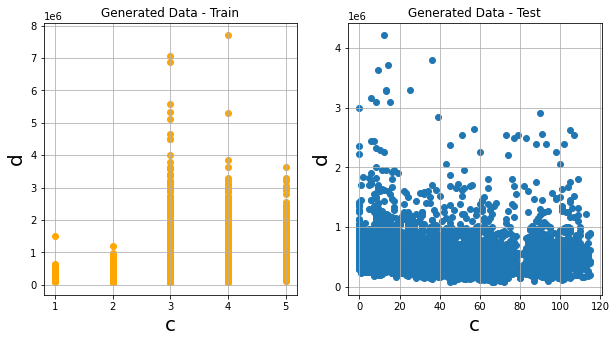

In [58]:
plt.figure(figsize=(10,5))
 
plt.subplot(1,2,1)
plt.scatter(c_train,d_train, c='orange')  
plt.xlabel('c', fontsize = 20) 
plt.ylabel('d', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

plt.subplot(1,2,2)
plt.scatter(a_test, b_test)  
plt.xlabel('c', fontsize = 20) 
plt.ylabel('d', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

In [59]:
fig1 = px.scatter(merged_zip, x="condition", y="price")
fig1.show()